In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## 飞行模拟器数据处理-老数据

#### 读取inf文件，里面包含了各种数据说明

In [2]:
def b2i(bstr, s = 'h'):
    """convert byte string to numerical array"""    
    import struct
    return 'not even' if len(bstr)%2!=0 else [struct.unpack(s, 
           bstr[2*i:2*i+2])[0] for i in range(len(bstr)//2)]


def read_inf(inf): 
    """convert .INF to a dict, simple and enough to represent inf data 296
    inf =    record
    HeatedPattern  : char; # 0 1
    fly            : string[20]; 
    date,DayTime   : string[40]; # 23-39, 64-77
    remarks        : string[80]; 
    ExpType        : array[1..15] of str4; # 186-189 test, 191 4+1
    duration      : array[1..15] of integer;
    NofRecs,NofData,NofFiles: integer;
    ['Â', 8, 'f', 'l', 'y', ' ', 'h', 'e', 'r', 'e', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 'M', 'o', 'n', 'd', 'a', 'y', ' ', '2', '1', ' ', 'A', 'p', 'r', 'i', 'l', ' ', '2', '0', '1', '4', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, '2', '1', ' ', 'h', ' ', '4', '5', ' ', 'm', ' ', '4', '6', ' ', 's', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 'r', 'e', 'm', 'a', 'r', 'k', 's', ' ', 'h', 'e', 'r', 'e', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 't', 'e', 's', 't', 4, 't', 'e', 's', 't', 4, ' ', 't', 'r', ' ', 4, ' ', 't', 'r', ' ', 4, 't', 'e', 's', 't', 4, ' ', 't', 'r', ' ', 4, ' ', ' ', ' ', ' ', 4, 't', 'e', 's', 't', 4, 't', 'e', 's', 't', 4, ' ', ' ', ' ', ' ', 4, ' ', ' ', ' ', ' ', 4, ' ', ' ', ' ', ' ', 4, ' ', ' ', ' ', ' ', 4, ' ', ' ', ' ', ' ', 4, ' ', ' ', ' ', ' ', 15, 0, 30, 0, 60, 0, 'Z', 0, 'x', 0, 0, 0, 'x', 0, 'x', 0, 'x', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, '4', 8, 2, 0]
    ['Â', 8, 'f', 'l', 'y', ' ', 'h', 'e', 'r', 'e', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20, 'M', 'o', 'n', 'd', 'a', 'y', ' ', '2', '1', ' ', 'A', 'p', 'r', 'i', 'l', ' ', '2', '0', '1', '4', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, '2', '1', ' ', 'h', ' ', '4', '9', ' ', 'm', ' ', '2', '5', ' ', 's', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 12, 'r', 'e', 'm', 'a', 'r', 'k', 's', ' ', 'h', 'e', 'r', 'e', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 't', 'e', 's', 't', 4, 't', 'e', 's', 't', 4, ' ', 't', 'r', ' ', 4, ' ', 't', 'r', ' ', 4, 't', 'e', 's', 't', 4, ' ', 't', 'r', ' ', 4, ' ', ' ', ' ', ' ', 4, 't', 'e', 's', 't', 4, 't', 'e', 's', 't', 4, ' ', ' ', ' ', ' ', 4, ' ', ' ', ' ', ' ', 4, ' ', ' ', ' ', ' ', 4, ' ', ' ', ' ', ' ', 4, ' ', ' ', ' ', ' ', 4, ' ', ' ', ' ', ' ', 15, 0, 30, 0, 60, 0, 'Z', 0, 'x', 0, 0, 0, 'x', 0, 'x', 0, 'x', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 'h', 16, 2, 0]
    2014年4月22日18:03:25 8 backspace  maybe avoid odd bytes                       14 20 DC4 (device control 1)                                                                                                                                              14 shift out                                                                                                                                           12 new page form feed                                                                                                                                                                                                                                                         end of transmission                                                                                                                                                                                                                                                                                                                                so integer = byte2*2**8+byte1    'Z' = 90 'x' =120     NofRec(s/m+15+30+60,90+120) NofData '4' =52, 'h'=104  NofFile:a,b                                         
    """
    def detr(d, tr = 0):
        """ remove all the trailing tr from list d:"""
        while d[-1]== tr:
            d.pop()
        return d

    with open(inf, 'rb') as f:
        inf = f.read()
    return{'HeatedPattern': inf[0], #'upright'if inf[0]==194 ┬,else 'UpsideDown',# char
           'fly':inf[2:22].decode('ascii'), # string[20]; @1: 8 BS backspace
           'date':inf[23:63].decode('ascii'), # string[40] @22: 20 DC4 (device control 1) 
           'DayTime': inf[64:104].decode('ascii'), # string[40] @63: 14 SO shift out 
           'remarks':inf[105:185].decode('ascii'), # string[80]  ##  @104: 12  FF (NP form feed, new page)
           'ExpType':[i.decode('ascii') for i in inf[185:260].split(b'\x04') if not i.decode('ascii') in ('',' '*4)], # array[1..15] of str4; +75 @185,190,..: each start with 4 EOT (end of transmission)
           'duration': detr(b2i(inf[260:290])),#array[1..15] of integer;
           'NofRecs':b2i(inf[290:292])[0],#integer
           'NofData': b2i(inf[292:294])[0], #integer
           'NofFiles': b2i(inf[294:296])[0]} #integer

In [3]:
l = read_inf("0914Y01A.INF")

#### inf文件配置说明

- HeatedPattern=194表示正T惩罚，否则表示倒T惩罚
- ExpType表示实验序列
- duration表示实验序列对应时间
- date表示实验日期

In [4]:
l

{'DayTime': '9 h 45 m 34 s\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 'ExpType': ['test',
  'test',
  ' tr ',
  ' tr ',
  'test',
  ' tr ',
  ' tr ',
  'test',
  'test'],
 'HeatedPattern': 194,
 'NofData': 7200,
 'NofFiles': 3,
 'NofRecs': 6,
 'date': 'Thursday 14 September 2017\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 'duration': [120, 120, 120, 120, 120, 120, 120, 120, 120],
 'fly': '\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00',
 'remarks': '\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'}

#### <br>
<br>
#### 读取DTA文件

说明:

- 文件分为ABC三个部分，每个部分数据14412
- 位置信号分为四个部分(-512,512),(512,1536),(1536,2048),(-2048,512),其中2048和-2048重合

<br>
数据排列方式如下:

|T|P|T|P|T|P|
|-|-|-|-|-|-|
|0-1201|1202-2401|2402-3603|3604-4803|4804-6005|6006-7205|
|T|P|T|P|T|P|
|7206-8407|8408-9607|9608-10809|10810-12009|12010-13211|13212-14411|



In [5]:
def read_dta(dta):
    """read the dta file and return numerical array"""
    with open(dta, 'rb') as f:
        data  = f.read()
    return b2i(data)

In [6]:
data = read_dta("0914Y01A.DTA")

In [7]:
print(data[-100:])

[-1201, -1201, -1187, -1150, -1093, -1046, -1031, -1030, -1030, -1030, -1026, -1002, -998, -998, -1004, -1070, -1122, -1176, -1228, -1244, -1221, -1096, -920, -725, -583, -416, -278, -163, -57, 4, 9, 9, 17, 129, 243, 375, 420, 439, 449, 470, 480, 496, 518, 556, 582, 644, 659, 624, 540, 523, 492, 458, 440, 397, 356, 299, 261, 245, 241, 209, 107, 37, 14, 13, -13, -114, -131, -154, -160, -162, -231, -359, -367, -367, -385, -439, -493, -523, -550, -562, -612, -648, -659, -690, -709, -708, -692, -669, -667, -667, -726, -784, -786, -768, -704, -691, -692, -642, -500, -470]


In [8]:
def PI(a, pt = 194): 
    """calculate PI from data list,194 punishment with T"""
    PI_index_Up_1 = 0
    PI_index_Down_1 = 0
    PI_index_Up_2 = 0
    PI_index_Down_2 = 0
    PI_index_Up_3 = 0
    PI_index_Down_3 = 0
    
    for i in range(1202,2402):
        if (abs(a[i])>=512)&(abs(a[i])<=1536):
            PI_index_Up_1+=1
        else:
            PI_index_Down_1+=1
    for i in range(3604,4804):
        if (abs(a[i])>=512)&(abs(a[i])<=1536):
            PI_index_Up_1+=1
        else:
            PI_index_Down_1+=1
    
    for i in range(6006,7206):
        if (abs(a[i])>=512)&(abs(a[i])<=1536):
            PI_index_Up_2+=1
        else:
            PI_index_Down_2+=1
    for i in range(8408,9608):
        if (abs(a[i])>=512)&(abs(a[i])<=1536):
            PI_index_Up_2+=1
        else:
            PI_index_Down_2+=1
    
    for i in range(10810,12010):
        if (abs(a[i])>=512)&(abs(a[i])<=1536):
            PI_index_Up_3+=1
        else:
            PI_index_Down_3+=1
    for i in range(13212,14412):
        if (abs(a[i])>=512)&(abs(a[i])<=1536):
            PI_index_Up_3+=1
        else:
            PI_index_Down_3+=1
    
    if pt==194:
        PI_1 = (PI_index_Up_1-PI_index_Down_1)/(PI_index_Up_1+PI_index_Down_1)
        PI_2 = (PI_index_Up_2-PI_index_Down_2)/(PI_index_Up_2+PI_index_Down_2)
        PI_3 = (PI_index_Up_3-PI_index_Down_3)/(PI_index_Up_3+PI_index_Down_3)
    else:
        PI_1 = -(PI_index_Up_1-PI_index_Down_1)/(PI_index_Up_1+PI_index_Down_1)
        PI_2 = -(PI_index_Up_2-PI_index_Down_2)/(PI_index_Up_2+PI_index_Down_2)
        PI_3 = -(PI_index_Up_3-PI_index_Down_3)/(PI_index_Up_3+PI_index_Down_3)
    return [PI_1,PI_2,PI_3]
        

In [9]:
def getALLPI(fileA,fileB,fileC):
    dataA = read_dta(fileA)
    dataB = read_dta(fileB)
    dataC = read_dta(fileC)
    all_PI = []
    for i in PI(dataA):
        all_PI.append(i)
    for i in PI(dataB):
        all_PI.append(i)
    for i in PI(dataC):
        all_PI.append(i)
    return all_PI

In [10]:
fileA = '0914Y01A.DTA'
fileB = '0914Y01B.DTA'
fileC = '0914Y01C.DTA'
print(getALLPI(fileA,fileB,fileC))

[0.5916666666666667, -0.14916666666666667, 0.6816666666666666, 0.35833333333333334, 0.07333333333333333, 0.17166666666666666, 0.15583333333333332, 0.018333333333333333, 0.0575]


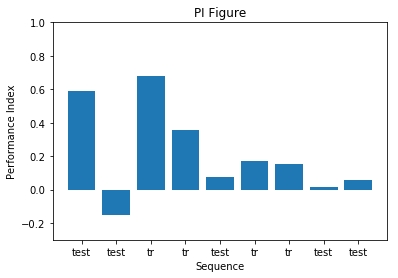

In [11]:
import matplotlib.pyplot as plt
name_list = ['test','test','tr','tr','test','tr','tr','test','test']
num_list = [0.5916666666666667, -0.14916666666666667, 0.6816666666666666, 0.35833333333333334, 0.07333333333333333, 0.17166666666666666, 0.15583333333333332, 0.018333333333333333, 0.0575]

plt.bar(range(len(num_list)), num_list,tick_label=name_list)
plt.xlabel("Sequence")
plt.ylabel("Performance Index")
plt.title("PI Figure")
plt.ylim(-0.3,1)
#plt.errorbar([i for i in range(9)],num_list,yerr=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],fmt="*",color="yellow")
plt.show()




#### 计算PI

软件结果:
![PIimg](images/PI.jpG)

脚本计算结果:
```
[0.5916666666666667, -0.14916666666666667, 0.6816666666666666, 0.35833333333333334, 0.07333333333333333, 0.17166666666666666, 0.15583333333333332, 0.018333333333333333, 0.0575]
```

## 多数据统计

In [12]:
class DataAnalysis:
    def __init__(self,dataDir):
        self.dataDir = dataDir
    

In [13]:
import os
from os.path import join
AllFile = []
dest = "data\\"
for root, dirs, files in os.walk( dest ):
    for OneFileName in files :
        OneFullFileName = join( root, OneFileName )
        AllFile.append(OneFullFileName)
    print(AllFile)

['data\\0914Y01A.DTA', 'data\\0914Y01A.INF', 'data\\0914Y01B.DTA', 'data\\0914Y01B.INF', 'data\\0914Y01C.DTA', 'data\\0914Y01C.INF', 'data\\0914Y02A.DTA', 'data\\0914Y02A.INF', 'data\\0914Y02B.DTA', 'data\\0914Y02B.INF', 'data\\0914Y02C.DTA', 'data\\0914Y02C.INF']


In [14]:
for i in AllFile:
    print(i)

data\0914Y01A.DTA
data\0914Y01A.INF
data\0914Y01B.DTA
data\0914Y01B.INF
data\0914Y01C.DTA
data\0914Y01C.INF
data\0914Y02A.DTA
data\0914Y02A.INF
data\0914Y02B.DTA
data\0914Y02B.INF
data\0914Y02C.DTA
data\0914Y02C.INF


In [15]:
def getFirtFile(fileName):
    firstDataFile = []
    for i in fileName:
        if(i[-5:]=="A.DTA"):
            firstDataFile.append(i)
    return firstDataFile

In [16]:
firstDataFile = getFirtFile(AllFile)

In [17]:
def strReplace(s,replacedStr):
    tmp=list(s)
    tmp[-5]=replacedStr
    s=''.join(tmp)
    return s

In [18]:
PIs = []
for detialItem in firstDataFile:
    PIs.append(getALLPI(detialItem,strReplace(detialItem,"B"),strReplace(detialItem,"C")))

In [19]:
PIs[1]

[-0.305,
 -0.09166666666666666,
 -0.3466666666666667,
 -0.4575,
 0.1825,
 -0.2841666666666667,
 -0.7533333333333333,
 -0.5108333333333334,
 -0.23416666666666666]

In [20]:
PIs[0]

[0.5916666666666667,
 -0.14916666666666667,
 0.6816666666666666,
 0.35833333333333334,
 0.07333333333333333,
 0.17166666666666666,
 0.15583333333333332,
 0.018333333333333333,
 0.0575]

In [21]:
import numpy as np
import pandas as pd
def getMeanAndSEM(dataList):
    data = {i:dataList[i] for i in range(len(dataList))}
    pdData = pd.DataFrame(data)
    return pdData

In [22]:
data = {i:PIs[i] for i in range(len(PIs))}
pdData = pd.DataFrame(data)
pdData

,0,1
0,0.591667,-0.305000
1,-0.149167,-0.091667
2,0.681667,-0.346667
3,0.358333,-0.457500
4,0.073333,0.182500
5,0.171667,-0.284167
6,0.155833,-0.753333
7,0.018333,-0.510833
8,0.057500,-0.234167


In [23]:
s = pdData.T.describe()

In [24]:
s

,0,1,2,3,4,5,6,7,8
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.143333,-0.120417,0.167500,-0.049583,0.127917,-0.056250,-0.298750,-0.246250,-0.088333
std,0.634039,0.040659,0.727141,0.576881,0.077192,0.322323,0.642878,0.374177,0.206239
min,-0.305000,-0.149167,-0.346667,-0.457500,0.073333,-0.284167,-0.753333,-0.510833,-0.234167
25%,-0.080833,-0.134792,-0.089583,-0.253542,0.100625,-0.170208,-0.526042,-0.378542,-0.161250
50%,0.143333,-0.120417,0.167500,-0.049583,0.127917,-0.056250,-0.298750,-0.246250,-0.088333
75%,0.367500,-0.106042,0.424583,0.154375,0.155208,0.057708,-0.071458,-0.113958,-0.015417
max,0.591667,-0.091667,0.681667,0.358333,0.182500,0.171667,0.155833,0.018333,0.057500


In [25]:
s.iloc[0,0]

2.0

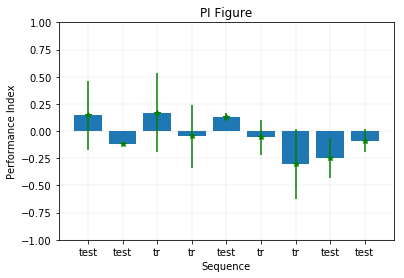

In [26]:
import matplotlib.pyplot as plt
name_list = ['test','test','tr','tr','test','tr','tr','test','test']
num_list = s.loc["mean"]
yerr = s.loc["std"]/s.iloc[0,0]

plt.bar(range(len(num_list)), num_list,tick_label=name_list)
plt.xlabel("Sequence")
plt.ylabel("Performance Index")
plt.title("PI Figure")
plt.ylim(-1,1)
plt.errorbar([i for i in range(9)],num_list,yerr=yerr,fmt="*",color="green")
plt.grid(color="grey",linewidth='0.1')
plt.show()


In [27]:
print(s.loc["mean"])
print(s.loc["std"]/s.iloc[0,0])

0    0.143333
1   -0.120417
2    0.167500
3   -0.049583
4    0.127917
5   -0.056250
6   -0.298750
7   -0.246250
8   -0.088333
Name: mean, dtype: float64
0    0.317020
1    0.020329
2    0.363571
3    0.288441
4    0.038596
5    0.161161
6    0.321439
7    0.187089
8    0.103120
Name: std, dtype: float64


#### 数据格式转换

In [28]:
def getAllFile():
    import os
    from os.path import join
    AllFile = []
    dest = "TransformData\\"
    for root, dirs, files in os.walk( dest ):
        for OneFileName in files :
            OneFullFileName = join( root, OneFileName )
            AllFile.append(OneFullFileName)
        print(AllFile)
    return AllFile

In [29]:
allFile = getAllFile()

['TransformData\\0914Y01A.DTA', 'TransformData\\0914Y01A.INF', 'TransformData\\0914Y01B.DTA', 'TransformData\\0914Y01B.INF', 'TransformData\\0914Y01C.DTA', 'TransformData\\0914Y01C.INF']


In [30]:
def getDataInformation(allFile):
    INF_file = ""
    for i in allFile:
        if(i[-5:]=="A.INF"):
            INF_file = i
    l = read_inf(i)
    DayTime=l['DayTime'][0:20]
    ExpType=l['ExpType']
    HeatedPattern = l['HeatedPattern']
    date = l['date']
    duration = l['duration']
    
    return DayTime,ExpType,HeatedPattern,date,duration
print(getDataInformation(allFile))

('9 h 58 m 7 ss\x00\x00\x00\x00\x00\x00\x00', ['test', 'test', ' tr ', ' tr ', 'test', ' tr ', ' tr ', 'test', 'test'], 194, 'Thursday 14 September 2017\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00', [120, 120, 120, 120, 120, 120, 120, 120, 120])


In [31]:
def getFirtFile(fileName):
    firstDataFile = ""
    for i in fileName:
        if(i[-5:]=="A.DTA"):
            firstDataFile=i
    return firstDataFile
def strReplace(s,replacedStr):
    tmp=list(s)
    tmp[-5]=replacedStr
    s=''.join(tmp)
    return s

def getRawData(allFile):
    firstDataFile = getFirtFile(allFile)
    fileB = strReplace(firstDataFile,'B')
    fileC = strReplace(firstDataFile,'C')
    return firstDataFile,fileB,fileC

In [32]:
getRawData(allFile)

('TransformData\\0914Y01A.DTA',
 'TransformData\\0914Y01B.DTA',
 'TransformData\\0914Y01C.DTA')

数据排列方式如下:

|T|P|T|P|T|P|
|-|-|-|-|-|-|
|0-1201|1202-2401|2402-3603|3604-4803|4804-6005|6006-7205|
|T|P|T|P|T|P|
|7206-8407|8408-9607|9608-10809|10810-12009|12010-13211|13212-14411|


每一个torque都比position多两个点
1202 对应 1200

In [33]:
def getTorqueAndPosition(data):
    torque = []
    position = []
    for i in range(0,1202):
        torque.append(data[i])
    for i in range(1202,2402):
        position.append(data[i])
    for i in range(2402,3604):
        torque.append(data[i])
    for i in range(3604,4804):
        position.append(data[i])
    for i in range(4804,6006):
        torque.append(data[i])
    for i in range(6006,7206):
        position.append(data[i])
    for i in range(7206,8408):
        torque.append(data[i])
    for i in range(8408,9608):
        position.append(data[i])
    for i in range(9608,10810):
        torque.append(data[i])
    for i in range(10810,12010):
        position.append(data[i])
    for i in range(12010,13212):
        torque.append(data[i])
    for i in range(13212,14412):
        position.append(data[i])
    return torque,position
    
    
    
    
    
def reFormatRawData(fileA,fileB,fileC):
    dataA = read_dta(fileA)
    dataB = read_dta(fileB)
    dataC = read_dta(fileC)
    position = []
    torque = []
    temTorque,temPosition=getTorqueAndPosition(dataA)
    for i in temTorque:
        torque.append(i)
    for j in temPosition:
        position.append(j)
    
    temTorque,temPosition=getTorqueAndPosition(dataB)
    for i in temTorque:
        torque.append(i)
    for j in temPosition:
        position.append(j)
        
    temTorque,temPosition=getTorqueAndPosition(dataC)
    for i in temTorque:
        torque.append(i)
    for j in temPosition:
        position.append(j)
        
       
    return torque,position
    

In [34]:
fileA,fileB,fileC = getRawData(allFile)
torque,position = reFormatRawData(fileA,fileB,fileC)

In [35]:
def FormatTransform():
    allFile = getAllFile()
    DayTime,ExpType,HeatedPattern,date,duration = getDataInformation(allFile)
    dataFileA,dataFileB,dataFileC = getRawData(allFile)
    torque,position = reFormatRawData(dataFileA,dataFileB,dataFileC)
    op= open('dataPosition.txt','w')
    for i in position:
        op.write(str(i)+",")
    op.close()
    
    op= open('dataTorque.txt','w')
    for i in torque:
        op.write(str(i)+",")
    op.close()
    print(position[0:100])

In [36]:
FormatTransform()
    

['TransformData\\0914Y01A.DTA', 'TransformData\\0914Y01A.INF', 'TransformData\\0914Y01B.DTA', 'TransformData\\0914Y01B.INF', 'TransformData\\0914Y01C.DTA', 'TransformData\\0914Y01C.INF']
[-1100, -1096, -1153, -1291, -1401, -1537, -1626, -1744, -1829, -1842, -1691, -1443, -1289, -1175, -1100, -1044, -1025, -1025, -1181, -1302, -1364, -1375, -1375, -1399, -1412, -1412, -1420, -1536, -1580, -1551, -1450, -1292, -1155, -1094, -1051, -966, -920, -911, -911, -931, -1030, -1080, -1136, -1190, -1210, -1210, -1207, -1200, -1201, -1202, -1224, -1236, -1238, -1245, -1267, -1276, -1156, -935, -877, -753, -720, -720, -748, -840, -905, -950, -1008, -1074, -1109, -1110, -1110, -1105, -1121, -1193, -1230, -1275, -1294, -1294, -1294, -1294, -1284, -1253, -1252, -1284, -1347, -1428, -1480, -1487, -1447, -1341, -1317, -1259, -997, -761, -625, -563, -561, -697, -805, -859]


In [37]:
l = [0,-94,161,419,463,446,401,398,401,137,-398,-822,-744,-471,-345,-255,-120,10,416,565,355,101,17,51,17,-86,45,342,251,-119,-260,-478,-558,-355,-182,-246,-260,-70,8,153,277,247,212,211,126,-21,-94,-28,62,46,85,67,20,26,73,24,-330,-721,-460,-386,-280,10,160,257,306,190,169,246,187,42,-54,-107,128,248,192,186,131,-16,-51,-4,-86,-139,60,151,185,270,213,44,-163,-321,-168,-97,-709,-956,-714,-337,-7,379,477,287,184,130,49,-88,-342,-477,-369,215,485,255,56,-27,119,177,65,56,84,315,413,240,116,165,243,228,114,29,223,290,-22,-237,-280,-386,-530,-350,-169,-18,133,255,229,187,126,-305,-729,-751,-788,-463,-77,207,369,330,196,76,-20,-144,-354,-413,-133,88,166,154,84,77,-48,-116,219,336,217,163,170,34,10,-190,-467,-369,-130,14,251,359,184,81,-81,-267,-189,-195,-252,-333,-118,22,47,78,33,33,111,29,-154,-239,-219,-143,50,267,257,151,-19,-82,-44,-101,-319,-474,-440,-115,237,238,-23,-278,-569,-788,-622,-480,-572,-372,-225,-215,-55,176,198,-42,-219,-346,-398,-451,-242,143,197,23,21,-106,-144,-35,99,155,146,82,-31,-72,-27,110,98,102,205,106,-143,-74,40,170,290,212,167,137,14,-155,-393,-265,213,283,86,73,-19,-98,25,77,-131,-165,-89,5,325,362,211,75,-194,-96,242,275,179,-16,-273,-682,-835,-614,-558,-439,-165,51,231,405,533,335,106,-127,-480,-535,-391,-71,197,118,29,64,154,136,111,65,-92,35,337,309,72,-257,-490,-452,-201,121,386,304,-6,57,298,223,54,-37,-274,-430,-198,156,397,337,173,28,7,21,-150,-256,-177,-132,-7,200,308,231,168,204,253,241,129,24,-159,-187,96,188,164,188,159,-11,-314,-658,-709,-432,-242,87,398,369,233,166,77,-4,-44,-10,100,49,97,306,399,286,160,5,-416,-709,-708,-661,-492,-113,166,244,159,-76,-329,-352,-286,-168,-121,24,26,18,49,127,145,308,325,134,17,-3,-25,130,174,22,-276,-490,-186,175,219,48,-74,-203,-67,-16,-209,-185,-25,64,3,222,294,112,82,78,51,32,22,-156,-83,61,-17,36,142,213,183,117,2,-110,-54,-109,-319,-465,-410,-162,115,29,-69,194,217,114,17,-160,-221,-49,-96,-184,-141,-86,134,336,233,125,34,-26,-42,-15,-54,23,41,-40,9,5,34,110,27,-102,-118,-270,-606,-595,-510,-362,65,484,-22,-619,-654,-595,-540,-495,-479,-291,2,203,335,280,-42,-291,-299,-223,-289,-434,-524,-348,-346,-366,-224,47,258,442,357,110,-180,-192,46,108,177,167,110,158,254,168,-9,-221,-342,-351,-121,104,297,275,235,213,126,1,-142,-132,-213,-136,2,68,102,208,184,67,-14,-266,-603,-668,-420,-331,-83,202,243,178,214,263,198,220,257,151,-95,-164,7,150,231,225,138,82,-16,67,-74,-110,-109,-41,-45,17,66,88,157,190,159,79,-43,-386,-727,-813,-774,-567,-267,-101,-67,-27,-47,-63,17,-215,-382,-219,-134,-113,-39,0,61,92,42,-149,-522,-570,-417,-302,-321,-181,106,17,-394,-449,-468,-477,-226,58,309,351,195,-31,-173,3,233,229,375,349,267,158,-4,-97,-159,-152,-273,-321,-240,-66,258,404,309,219,180,197,286,281,167,50,-26,48,-17,-56,-153,-172,119,374,378,282,124,-100,-59,-130,-422,-572,-598,-617,-588,-395,-126,-55,-18,249,433,278,120,51,62,-96,-103,214,341,253,69,-243,-452,-421,-147,439,554,202,-120,-197,-329,-523,-381,-135,10,225,374,143,-151,-249,-36,253,296,167,-146,-379,-449,-361,94,498,306,139,105,51,66,-201,-178,256,323,42,-131,-340,-497,-461,-271,110,364,318,169,154,156,99,-21,-242,73,334,220,12,-152,-282,-341,-353,-283,26,301,342,206,191,210,33,-87,-99,-116,-146,122,173,23,112,2,-462,-684,-618,-566,-335,158,338,100,221,274,176,194,-56,-407,-470,-464,-363,203,502,313,318,357,311,165,50,-68,-115,111,270,110,-78,-58,-118,-243,-252,-172,153,298,203,181,170,-73,-378,-552,-784,-421,202,214,89,138,-81,-518,-560,-479,-241,393,496,285,323,222,207,220,-162,-194,156,186,166,182,45,-86,-42,46,-116,-27,359,333,5,-142,-127,-255,-462,-6,444,345,153,277,201,-107,-74,-41,-107,-22,283,309,271,354,45,-412,-670,-695,-691,-378,-113,11,179,355,354,248,107,30,80,-44,-201,-266,-521,-363,154,310,205,225,-2,-275,-303,-456,-240,240,307,121,38,16,-87,-34,-105,-237,-112,11,81,242,413,266,197,243,1,-214,-178,-272,-316,-30,323,446,409,217,127,153,-103,-181,100,319,329,332,228,-87,-288,-571,-479,172,509,394,133,-134,-386,-244,218,315,166,-239,-336,22,277,310,382,141,-214,-256,-404,-619,-120,473,495,268,252,19,-375,-725,-745,-329,-122,218,515,330,-102,-392,-369,-432,-199,234,124,87,94,-309,-537,-533,-550,-312,151,444,438,329,137,116,273,216,-125,-36,-112,-477,-311,-120,263,527,395,169,188,143,-139,-305,-382,-243,284,504,270,121,-21,-229,-330,-379,-112,342,458,244,69,21,-197,-375,-353,-207,13,311,341,100,81,184,-2,-123,-113,-403,-280,323,335,80,59,-58,-133,51,-101,-251,69,334,193,177,236,182,171,85,1,32,93,-25,-58,-58,-114,-44,27,138,271,299,148,90,-113,-266,-243,-164,-267,-158,28,70,92,74,-54,-153,-230,-452,-326,-10,212,138,-16,-106,-301,-180,-91,-66,92,222,157,122,175,109,173,317,150,2,-73,-253,-280,-193,-61,173,372,458,370,314,273,117,-38,-138,-130,-46,-152,-40,166,119,104,237,179,22,130,-94,-512,-601,-559,-505,-262,195,523,501,271,139,-17,-241,-208,-91,76,189,178,97,-107,-352,-515,-270,114,180,254,384,299,152,144,13,-164,-206,-110,-34,49,174,344,347,179,111,-284,-642,-560,-533,-567,-315,-48,147,158,98,149,254,50,-248,-162,-311,28,396,207,22,17,35,128,236,153,63,20,74,84,64,-98,-201,0,0,-34,234,301,187,98,7,-137,-284,-124,-30,16,200,247,211,131,48,-64,-190,-104,138,309,334,81,-161,-389,-567,-559,-362,-219,-101,209,226,-16,-77,-27,-43,-115,52,81,88,96,68,48,93,193,226,190,173,-66,-478,-397,-75,89,195,250,81,-56,-57,-196,195,510,263,-159,-385,-462,-87,459,437,180,-105,-304,-491,-516,-7,409,270,16,-212,-359,-132,256,180,-121,-280,-88,34,118,75,37,75,33,181,352,273,88,-155,-304,-329,46,391,326,273,17,-185,-230,-394,-498,-269,90,191,247,214,-9,-61,46,-85,-140,-216,-224,155,332,176,96,61,36,46,6,-23,236,209,-55,-94,-71,-236,-152,165,181,152,194,169,214,255,122,24,-99,-198,-338,-578,-586,-463,-290,12,385,413,207,-1,-60,-3,-19,-9,-39,-117,-146,-20,198,363,340,238,81,-62,1,310,314,238,126,-165,-416,-611,-574,-331,-26,267,171,-113,-181,-220,-202,-148,-61,73,130,126,175,98,-230,-756,-304,94,-452,-1150,-1218,-1071,-1018,-925,-954,-960,-892,-999,-1009,-968,-966,-1001,-918,-998,-1058,-956,-990,-1007,-961,-973,-1070,-1014,-982,-968,-989,-1015,-981,-1022,-1027,-973,-946,-1024,-1041,-929,-1011,-1053,-926,-1024,-1084,-1002,-927,-1006,-1002,-930,-1069,-1044,-989,-991,-961,-992,-998,-1009,-1020,-1023,-1011,-991,-1014,-974,-946,-983,-1031,-1032,-1025,-1008,-973,-951,-998,-1003,-1035,-1001,-997,-1041,-973,-1000,-995,-966,-1005,-1040,-995,-1019,-1019,-961,-1018,-1029,-977,-951,-883,-369,1276,1468,1313,863,1298,1502,585,325,606,809,638,539,545,508,523,467,464,441,339,237,-63,-365,-321,-104,45,428,679,564,340,293,184,22,130,241,193,174,157,116,-18,-40,138,174,114,39,-33,-66,-149,-182,-135,-1,80,81,17,-21,6,-7,-98,-42,-52,-87,-65,-86,8,144,318,318,208,122,91,124,127,184,321,296,106,-6,78,5,-45,-7,-19,-25,15,-29,-76,-30,-74,-66,102,94,74,73,62,103,143,48,4,-19,-77,-80,13,83,89,21,-45,5,97,46,84,92,-30,-32,61,38,65,17,-46,1,8,-29,-50,-68,-77,-69,-28,55,115,60,72,123,123,78,59,-9,-70,-130,-248,-155,-49,-75,-138,7,141,147,230,300,220,82,40,102,81,30,97,100,58,156,234,209,95,-2,44,65,12,-67,-152,-233,-295,-142,-58,-25,59,54,145,226,159,100,74,37,75,226,361,336,306,250,169,40,22,62,14,-22,89,106,45,57,26,-50,-7,22,20,84,139,162,159,75,-39,-61,-52,-142,-202,-158,-57,-8,-45,-55,13,37,49,109,73,101,114,11,26,3,-14,53,124,109,199,237,51,96,34,-40,-69,14,102,49,80,16,-70,-95,-27,-26,-43,-77,-93,-75,-140,-73,-11,64,113,53,-1,-8,-2,-26,-10,-4,51,29,23,71,91,57,103,113,93,66,115,86,8,98,200,188,106,65,-14,41,150,134,86,10,-42,-30,-49,29,-30,-48,-19,-73,-112,-163,-177,-70,90,66,47,72,62,6,4,60,80,62,29,-25,-48,1,54,38,11,30,-10,-42,29,47,9,47,121,46,-6,112,51,0,103,80,-1,-9,-38,-35,20,64,30,34,-12,16,92,60,88,84,39,50,27,41,0,-2,41,33,5,14,-53,-133,-157,-92,-26,26,33,-25,-70,-73,103,202,137,158,51,-135,-40,108,-57,-143,-8,-23,-11,158,189,147,229,148,64,78,-19,-60,37,-17,-49,71,94,165,370,332,160,6,-30,-81,-42,-79,-64,6,21,32,32,-6,-9,120,35,45,169,118,71,254,399,198,64,18,21,70,110,25,26,76,-9,59,12,80,65,31,136,185,216,149,159,156,101,10,38,60,82,124,56,102,139,95,2,-32,-22,-38,8,46,5,-43,21,-13,0,91,16,-35,9,-28,-103,-40,-7,-38,-58,6,65,32,-17,11,31,29,82,107,98,40,26,127,268,312,232,155,47,68,89,49,26,-18,-10,-12,44,27,8,41,104,128,93,43,-10,43,-12,16,7,-12,30,-7,64,103,172,96,-52,-30,-31,27,-51,-151,-26,49,113,93,130,100,34,21,35,20,-25,-10,3,-23,-8,37,33,43,20,-169,-305,-198,-133,-109,-77,8,114,27,45,107,20,12,16,-23,-169,-269,-179,-71,29,16,-20,60,93,83,128,22,-13,32,34,-99,-184,-171,-298,-669,-716,-501,-256,-132,-27,87,103,-177,-349,-256,-135,-27,201,316,96,-249,-245,-102,30,134,198,230,219,177,62,-128,-251,-131,101,187,209,177,82,-16,-79,-268,-265,-63,21,-4,12,102,67,118,196,156,154,8,-44,74,100,74,163,150,15,-45,-69,-84,28,88,29,-78,-16,47,-25,33,74,-14,-37,44,-34,-13,56,1,84,152,184,372,296,2,20,86,82,200,151,10,27,50,15,159,476,376,106,4,-40,-18,77,60,0,25,-119,-127,-20,-29,-45,16,99,78,-30,-243,-297,-253,-124,44,67,99,57,17,30,56,21,-46,-29,-67,-145,-104,-228,-351,-222,-34,-32,-10,129,-29,-358,-280,-67,13,105,163,168,157,-167,-517,-424,-216,-162,-119,20,199,127,-217,-283,-200,-32,134,235,234,214,45,-373,-454,-208,-93,-7,75,65,144,80,-253,-265,-120,-33,36,178,213,210,201,169,92,-13,-61,-175,-255,-148,20,144,197,258,205,90,26,108,174,56,23,106,41,29,88,44,-10,37,11,-36,41,-9,-100,-71,-2,44,47,32,69,187,243,237,258,129,-4,56,76,115,286,309,149,60,65,54,-26,-44,-32,-62,-13,212,316,64,-88,-85,-57,-5,-39,-85,-202,-330,-170,-50,104,202,154,126,163,95,-74,-129,-258,-365,-202,34,60,136,280,293,246,231,169,11,-98,-74,-77,-164,-168,95,423,426,272,175,-41,-322,-394,-383,-278,-146,-82,53,179,128,132,105,-75,-161,-237,-174,-26,76,177,258,207,105,186,116,-87,-200,-364,-344,-36,272,449,344,151,26,96,297,488,395,72,-118,-47,-88,-223,-122,-15,-42,-5,-38,-373,-368,-133,-12,103,259,292,177,26,-101,-147,-56,6,4,-114,-296,-191,0,0,-181,-174,-41,109,183,314,305,206,144,125,-109,-197,-67,10,-37,-167,-298,-243,-117,29,158,231,252,205,13,-73,-83,-260,-339,-191,-7,14,101,298,283,312,287,-71,-406,-351,-184,-182,-26,115,120,211,212,171,172,83,40,-68,-318,-391,-194,-94,22,186,265,270,237,204,84,27,114,191,74,2,-81,4,47,26,36,34,59,146,213,23,-91,-59,-106,-161,-66,61,83,163,216,112,120,203,141,50,80,57,17,46,38,-47,-55,-112,-109,-136,-251,-303,-228,-186,-177,-14,181,292,309,305,197,151,64,-52,-39,13,50,62,-49,-156,-122,-161,-147,-62,36,76,109,189,253,262,94,-98,-166,-225,-293,-243,-176,-111,0,190,332,317,245,206,99,7,68,4,-130,-175,-142,-184,-209,-198,-72,-40,-26,81,176,299,269,97,-22,54,228,310,211,50,56,204,355,384,288,249,111,-132,-147,258,397,306,228,91,43,4,-164,-247,-192,-73,20,188,244,180,106,59,33,-15,-28,-54,-73,-109,-110,-133,-99,-88,-158,-140,-85,-74,-12,107,257,361,304,166,160,100,-137,-147,3,-23,-55,-14,7,-114,-271,-289,-150,20,110,257,333,276,169,100,30,-18,-11,-78,-150,-50,-9,-4,47,81,97,117,73,-199,-589,-453,-186,-120,-107,-4,169,173,50,16,-15,-126,-102,-117,-91,52,130,174,173,101,-39,-5,139,182,264,233,61,-70,-49,187,472,422,123,-124,-359,-314,-177,-22,213,514,511,213,62,-139,-319,-140,37,49,48,26,-14,-77,-77,-31,-71,-71,48,25,61,56,123,194,63,-29,36,-37,74,408,376,161,28,-127,-133,412,535,276,5,-267,-361,-189,19,280,306,176,125,-14,-186,-237,-335,-496,-439,-276,-194,-88,49,29,107,213,122,37,-94,-251,-293,-503,-843,-738,-389,22,469,447,200,239,213,-17,-69,-65,-28,-95,-105,48,263,379,241,47,64,-38,-23,95,226,264,131,2,-91,-68,197,402,339,191,92,5,-88,-117,120,441,330,178,77,-62,-181,-195,-136,14,136,176,265,404,360,287,284,143,94,44,-70,-23,-16,-35,-68,-78,-228,-559,-406,109,380,228,92,61,98,209,70,-139,-204,-178,-160,-43,178,232,256,248,149,189,368,345,226,116,-46,-267,-198,-39,102,360,485,339,268,196,79,-147,-394,-383,-244,-34,111,261,208,5,-57,25,-43,-104,-162,-191,-82,116,102,12,25,-16,-35,20,-11,-51,-109,-185,-115,-33,-40,-86,-80,-337,-357,-135,6,74,144,291,209,-113,-672,-829,-755,-606,-538,-555,-405,-280,-143,212,420,300,243,244,117,-55,-120,-239,-256,-179,-71,55,280,451,454,248,86,101,152,255,417,305,60,-147,-191,-17,191,452,480,300,101,38,-110,-144,34,54,-70,52,134,54,20,59,-49,-95,-66,-166,-261,-232,-191,-92,-117,-357,-579,-639,-483,-314,-125,110,184,-114,-310,-228,-146,-45,143,211,218,236,258,187,153,80,64,148,110,116,313,407,245,76,-103,-285,-188,-29,86,185,214,75,30,12,-58,-32,-9,-142,-252,-228,-259,-151,-29,-76,-131,-127,-52,96,-100,-343,-256,-160,-133,1,200,234,224,264,160,55,126,185,121,134,149,139,31,41,111,-17,-262,-481,-672,-767,-631,-528,-585,-339,204,510,454,303,264,286,165,-9,-26,70,343,487,247,54,77,135,188,284,281,-21,-63,280,332,211,116,-100,-236,-239,-150,-36,62,131,12,-126,-168,-155,26,236,254,210,208,160,135,79,-25,-58,-97,-43,158,194,83,28,66,81,105,10,-123,-191,-96,-35,19,42,-244,-461,-247,-65,61,205,191,148,97,-8,-80,-31,-91,-125,-10,63,86,140,136,96,227,240,97,141,139,9,-100,-90,-25,17,-47,-114,-13,97,173,153,78,-48,-21,-7,-77,-73,-100,-120,-55,66,-17,-161,-222,-168,-114,100,300,300,315,261,86,72,114,119,81,144,168,170,178,105,9,-41,-71,-54,88,44,-98,-70,-3,67,139,211,223,249,188,-12,-90,-95,-31,29,-56,-45,94,175,172,203,109,-12,76,70,-3,16,-16,-111,-138,-83,-113,-133,-32,95,138,162,114,93,24,118,206,136,28,-73,-95,-241,-270,-96,35,89,88,75,85,149,67,-80,-42,234,314,118,-79,-213,-349,-345,-250,-355,-715,-642,-190,283,378,363,316,216,43,-179,-289,-314,-314,11,216,95,-224,-556,-714,-710,-588,-335,55,351,388,-14,-444,-504,-253,-135,-36,116,114,-229,-355,-172,25,63,96,101,-160,-695,-789,-630,-526,-311,248,501,294,215,111,61,132,12,-181,-125,250,370,245,169,102,323,499,354,137,126,66,-122,-130,197,340,134,-85,-207,-350,-296,-69,120,180,224,218,89,-50,-126,-103,2,-14,-85,-77,-197,-226,-144,-166,-166,-96,24,131,250,247,-114,-703,-837,-695,-584,-266,67,333,424,344,198,106,240,396,371,244,262,229,57,-54,1,339,467,330,178,27,-64,13,87,38,45,24,-6,13,-76,-222,-218,-49,41,-19,-139,-186,-87,84,173,161,167,101,47,104,26,-198,-291,-231,-333,-293,-428,-669,-649,-520,-437,-91,298,387,416,354,55,-182,-509,-879,-718,-462,-370,102,522,442,265,158,93,226,323,267,137,66,24,51,134,313,413,225,41,-32,-124,-56,87,45,20,194,124,68,194,153,102,91,-31,-219,-263,-61,332,400,313,191,33,-327,-452,-276,19,418,640,384,152,181,174,34,12,-15,-98,-32,78,-39,-129,34,23,12,138,149,38,19,-65,-206,-141,-112,-162,-117,-167,-210,1,99,-123,-178,-84,-83,-59,102,209,318,317,166,117,128,29,-109,-181,-267,-252,-214,-251,-139,-299,-455,-246,-99,12,134,147,138,177,104,-63,-145,-187,-132,-69,-91,-141,-1,-77,-269,-140,6,31,71,176,266,253,190,257,329,241,63,-49,-97,-164,-36,63,48,141,216,174,201,228,114,50,-6,-119,-138,-153,-92,95,103,71,123,-51,-44,47,-24,-97,-14,-59,-148,-17,131,241,261,180,106,2,-117,-242,-657,-889,-588,-447,-424,-318,33,320,-1,-403,-430,-245,-55,189,347,285,121,87,105,106,136,132,0,0,332,307,136,26,71,-74,-174,-201,-38,289,433,331,155,-6,-114,-95,-170,-79,95,192,227,255,82,-83,-17,189,363,305,67,-88,-205,-276,-200,89,172,154,160,47,-82,-122,-115,-79,-58,-40,-19,4,-26,30,128,115,121,111,6,-97,-99,-78,-50,-53,-58,-58,-39,-55,-103,-10,138,135,201,190,123,123,13,-35,-48,-70,-162,-323,-173,-34,-194,-624,-670,-637,-573,-376,68,363,272,81,12,-21,-20,56,28,-4,33,27,31,78,17,57,239,240,99,1,38,100,162,213,130,45,-55,-187,-190,-160,-191,-28,11,36,183,98,-23,-4,-114,-319,-296,-234,-120,254,302,54,-115,-170,-207,-118,-37,-19,96,225,339,307,164,126,203,156,95,135,76,218,339,205,152,103,-70,-98,-73,-54,46,98,25,19,91,56,71,97,38,-25,-82,-233,-306,-235,-301,-401,-448,-421,-140,9,-21,8,-32,-195,-452,-341,-236,46,226,255,376,197,37,22,102,127,324,332,207,101,-12,29,1,-48,106,166,87,-32,54,220,384,332,154,114,-76,-148,-200,-203,-61,71,148,235,182,-23,-1,-157,-225,-115,42,71,62,27,-14,97,107,31,0,-92,-76,-75,-110,-203,-151,-61,77,220,109,-221,-160,-51,-110,-42,109,203,153,161,163,112,-29,-93,-139,-155,-72,-61,-25,-22,115,76,-218,-287,-198,-140,-37,125,263,265,182,62,75,126,126,110,24,-141,-49,10,-82,100,199,177,185,122,-118,-215,-200,-368,-619,-676,-548,-167,161,316,292,90,-95,-80,-185,-446,-466,-626,-688,-426,-97,208,340,283,189,191,28,-196,-208,-402,-424,-90,169,284,288,149,-83,-238,-265,-344,-344,97,441,394,184,136,141,85,191,335,213,12,-181,-175,47,185,210,318,322,173,147,90,-107,-160,-112,-141,-183,-81,-15,28,142,264,296,190,153,153,143,198,228,70,-133,-344,-271,166,469,356,124,-10,-100,-137,-195,-313,-224,-88,99,69,-126,-186,-92,-23,52,216,201,151,100,-200,-283,-280,-280,-173,-194,-389,-769,-780,-606,-524,-258,293,436,289,212,95,-12,-62,-167,-99,-41,-30,107,135,82,122,199,62,-36,-112,-327,-414,-456,-579,-700,-527,-154,262,513,442,242,175,60,-56,-274,-439,-314,-110,26,111,170,-253,-527,-94,62,-175,-17,170,192,119,-351,-810,-801,-603,-443,-288,-396,-577,-462,-195,131,342,279,28,37,74,-69,-250,-288,-271,-305,-107,75,137,177,149,31,-11,161,363,238,110,101,-28,-92,-70,227,397,341,160,103,98,-108,-53,366,377,226,135,99,-14,-173,-184,-47,69,102,113,83,1,-12,-72,-111,63,103,74,111,112,80,5,-56,-125,-222,-218,-223,-55,-110,-238,-226,-85,-14,-52,-58,-66,-31,68,-120,-393,-452,-279,-20,128,147,192,174,113,-64,-306,-401,-559,0,442,308,146,217,277,127,126,121,-61,-73,198,322,338,149,-42,-153,-231,95,425,337,91,88,75,-108,-87,-133,-77,72,186,262,252,175,98,127,141,109,-10,-253,-323,-360,-330,-9,311,281,170,93,-53,-134,-99,-13,-143,-165,-121,-143,-231,-175,-153,-122,-78,68,189,195,163,124,-70,-261,-536,-783,-774,-608,-468,-424,-331,123,466,365,207,89,128,36,-55,-127,-131,-94,-66,-92,-495,-743,-466,62,435,445,251,124,-21,-224,-149,-59,-5,146,238,176,319,298,39,-303,-386,-295,-207,-53,-111,-346,-281,-180,-43,31,13,-64,-3,107,234,235,132,165,135,113,144,116,12,-150,-221,-184,-56,31,72,154,148,141,111,71,-112,-168,-77,90,117,-7,-112,-152,-131,-130,-27,-31,57,174,67,123,211,65,-26,24,-47,-9,109,-62,-146,-89,-119,-222,-175,-21,187,138,40,51,59,-84,-269,-471,-602,-266,109,248,345,326,89,-18,-47,-145,-193,-260,-302,-114,50,61,-67,-483,-731,-526,-405,-366,-177,90,208,-22,-211,-111,-10,-102,-64,-183,-670,-707,-426,-287,92,424,322,178,192,42,-136,-206,-224,-119,-93,-345,-524,-274,34,260,259,278,316,197,146,149,15,-223,-312,-361,-213,77,161,169,204,164,143,97,-53,-76,-11,-95,-214,-185,-96,109,136,34,89,113,-45,-113,-130,-258,-115,42,28,64,120,99,115,162,76,-9,-2,-95,4,414,290,34,-115,-239,-210,-144,-56,249,398,252,165,212,100,-118,-296,-69,416,526,304,2,-134,-203,-107,303,451,301,141,62,-11,-123,-115,119,346,177,40,-39,-157,-132,-62,-83,-8,94,80,107,91,32,52,18,-16,-56,-118,-74,55,220,218,156,133,0,-121,-194,-159,-166,-111,-67,-116,25,28,6,-76,-92,-89,-107,-21,-16,105,167,140,47,-283,-389,-222,-3,79,171,184,87,49,57,28,55,55,-21,267,272,99,-119,-199,-154,-197,-104,56,185,236,123,3,26,109,128,101,145,152,36,-39,-98,-351,-515,-57,323,248,116,-126,-217,-178,-155,61,191,141,132,100,4,-39,-68,-150,-97,10,60,159,139,31,-21,-115,-102,76,51,49,126,84,-12,-83,-159,-278,-230,-139,8,-1,-349,-808,-800,-526,-332,-166,114,271,305,7,-540,-553,-566,-632,-524,-102,308,392,341,178,-9,18,124,70,78,195,106,138,250,120,-54,-78,-142,-71,134,229,153,133,12,-103,-86,6,49,34,77,43,58,67,34,-46,-114,56,206,147,-23,-197,-332,-293,-173,-150,-93,35,147,232,248,111,-115,-333,-670,-847,-664,-473,-178,264,274,126,54,52,21,23,149,238,198,47,-186,-302,-299,-255,25,216,270,190,164,84,88,13,-254,-407,-420,-265,68,197,92,117,149,90,67,52,20,57,-6,-42,9,132,130,15,-93,-197,-333,-429,-489,-562,-396,63,373,376,333,165,-243,-921,-1207,-935,-636,-591,-601,-575,-447,12,369,320,160,83,1,-48,-78,-132,-222,-139,43,-46,-107,61,203,201,216,218,138,157,44,-55,59,9,-107,-196,-106,-12,121,95,97,97,49,-4,83,211,196,110,-154,-385,-386,-308,-112,67,172,266,204,31,-25,-53,-195,-136,-78,-73,90,294,270,192,163,98,38,-192,-410,-391,-490,-560,-261,223,280,160,164,33,-204,-324,-300,166,0,0,298,303,62,-230,-424,-262,-57,64,123,38,6,59,22,14,40,-42,-58,31,81,229,268,118,-3,70,63,15,6,-97,-58,42,59,36,27,61,92,136,126,94,82,31,-84,-160,-134,-24,96,214,323,194,49,-2,25,299,369,196,-54,-225,-340,-330,-112,9,66,99,148,86,-25,-55,167,406,316,161,-64,-271,-236,0,336,500,344,222,188,277,370,352,280,130,95,364,401,231,330,322,150,221,451,360,221,181,12,3,79,-65,-19,-6,-52,30,-18,-166,-167,-118,5,137,103,127,161,106,96,139,85,-69,-79,-6,12,-35,-90,-116,-65,24,165,186,77,84,-21,-54,44,25,-45,-21,-21,24,36,22,-11,-25,-56,-55,57,17,-20,15,-52,-9,143,87,-47,-28,1,21,42,7,-31,-81,-134,-60,7,-42,-53,54,8,-64,17,49,53,88,59,11,28,25,12,-69,-126,-128,-84,-165,-227,-135,-96,-30,125,222,278,208,42,-13,-58,-81,-114,-148,-199,-170,-33,72,131,87,86,195,245,205,166,97,-14,-60,-58,-97,-65,-56,-116,-5,146,118,115,149,41,3,47,-107,-281,-310,-335,-152,-5,49,103,129,124,273,284,159,18,-116,-233,-264,-197,-73,13,51,121,292,374,229,47,-106,-183,-222,-269,-243,-79,141,245,294,319,280,201,86,-87,-387,-721,-703,-555,-501,-266,149,352,245,173,130,108,124,12,96,204,38,-224,-80,17,-82,27,121,123,188,220,68,74,55,41,134,139,76,75,-69,-278,-336,-269,-220,-80,157,255,281,296,189,98,53,-78,-186,-311,-438,-362,-252,-175,150,343,285,163,-7,-67,-8,-15,-157,-191,-152,-133,11,217,206,277,298,65,-25,30,-116,-242,-266,-332,-276,-51,58,146,87,-62,38,155,179,144,107,85,-22,-105,-109,-144,-153,-100,-98,36,210,264,278,200,96,127,78,-53,-125,-233,-467,-683,-602,-555,-508,-626,-660,-430,5,327,377,259,216,284,349,314,289,187,246,364,274,104,-37,-71,23,118,11,-123,-141,-81,80,225,207,94,32,-24,6,10,9,-41,-105,-81,-116,-157,-37,33,-76,-190,-80,-26,-15,166,245,202,266,164,-71,-37,-36,-199,-155,-32,-119,63,221,189,206,207,91,49,33,-147,-180,-84,-117,-80,108,133,107,221,177,88,38,-67,-167,-117,-163,-245,-180,-192,-50,279,350,283,216,23,-87,152,218,74,46,-45,-184,-98,-84,-119,-102,-118,-12,242,366,298,255,128,-4,-69,-132,-261,-493,-705,-693,-248,276,418,264,112,103,285,346,158,5,-190,-287,-79,172,220,244,272,186,250,322,176,-134,-515,-462,314,631,330,47,-91,-9,370,458,130,121,376,413,408,357,187,105,307,218,17,107,354,300,68,-119,-39,22,-88,-124,-58,-38,36,42,-5,37,-108,-206,-93,-21,-11,-4,-44,-265,-407,-136,50,10,135,314,132,-299,-423,-341,-175,-45,20,220,441,366,265,289,248,347,413,240,62,74,92,55,206,111,27,88,12,-30,135,309,244,146,-8,-107,-194,-268,-226,-258,-409,-311,-133,-2,165,253,265,234,112,-63,-136,-85,-118,-57,84,155,236,264,203,180,121,20,60,135,-7,-186,-171,-152,-230,-149,-6,104,210,276,215,141,56,-63,-37,-36,-96,-111,-108,-136,12,158,170,111,126,127,-12,-167,-181,-167,-180,-155,-98,-15,105,180,274,257,176,118,182,226,166,59,-156,-411,-633,-804,-772,-559,-561,-562,-404,-30,370,349,67,-143,-499,-813,-630,-274,-94,155,300,296,304,313,344,366,305,228,321,457,314,114,233,338,276,201,136,193,279,219,75,-58,-111,-46,-182,-280,-252,-231,-149,-15,113,124,151,183,98,-82,-1,32,16,213,230,4,-149,-22,-97,-78,19,-134,-94,-68,-8,211,275,118,182,153,20,-18,-104,-197,-199,-159,-86,56,90,21,109,100,44,132,96,-46,-69,-119,-125,-117,-134,-60,32,55,151,256,150,120,81,27,-10,-29,-109,-157,-188,-528,-502,-173,-144,75,237,290,222,233,285,231,242,62,-13,-49,3,-140,-177,-135,-158,-1,141,247,109,18,-76,6,-16,-196,-143,-71,-36,84,111,82,19,48,31,57,166,82,-27,-31,-6,-101,-165,-197,-244,-88,-41,7,116,188,2,-221,-191,-9,97,65,224,217,148,254,166,117,318,261,-102,-417,-667,-863,-754,-565,-547,-442,-352,109,431,180,-387,-362,-166,38,247,60,-313,-362,-315,-313,-77,28,-21,-269,-348,-243,65,237,235,203,204,202,325,236,172,76,108,0,76,204,126,190,109,-140,-187,-34,276,317,194,90,28,100,47,8,184,267,74,-199,-236,-264,-377,-391,-341,-166,-22,81,80,51,-35,-257,-337,-263,-112,26,57,-99,-220,-113,42,144,201,261,273,211,142,280,373,328,300,256,180,262,271,181,28,-42,-80,-107,-134,-120,-41,98,166,102,75,36,43,98,151,78,-37,-10,8,56,3,-78,3,33,-18,-33,-30,-1,48,49,133,185,41,-160,-115,-80,-32,76,194,140,110,137,41,147,141,-46,-201,-222,-171,-195,-174,-62,-104,-116,-192,-219,-107,58,198,302,297,185,109,93,15,-51,-4,176,382,411,153,-80,-421,-829,-729,-539,-437,-179,131,313,293,270,276,64,-175,-156,50,198,336,308,223,333,301,6,-217,-281,-333,-147,86,89,44,-70,-327,-303,-106,-75,78,212,214,268,237,52,18,38,-124,-132,-46,-218,-453,-352,-251,-104,39,129,247,300,233,204,213,93,45,42,76,145,82,-131,-161,-82,-149,24,223,158,143,97,-71,-59,-29,-160,-171,-137,-184,-115,-60,-41,-21,-15,-100,-175,-271,-187,-38,99,229,336,359,213,239,166,21,100,265,397,372,114,-241,-441,-666,-692,-512,-251,-178,2,185,230,222,111,-22,-110,-97,-75,-58,-22,-10,43,28,35,52,65,-40,-107,-204,-350,-243,-117,-55,114,316,419,360,182,-5,-160,-249,-235,-88,2,-73,-6,164,290,341,161,-72,-24,107,59,-1,-100,-113,-2,-114,-165,35,185,124,221,268,65,-14,-73,-208,-142,-95,-140,-16,-245,-622,-539,-436,-378,37,402,303,243,231,123,132,113,0,0,100,16,-10,92,120,7,-141,-147,-118,-62,28,50,89,195,191,226,184,11,-77,10,88,33,-91,-194,-91,-27,-39,136,290,230,161,132,33,-88,-264,-344,-241,-280,-728,-779,-643,-647,-513,-157,105,52,-330,-341,-284,-183,33,239,298,234,215,371,380,236,147,160,250,389,356,211,51,-83,-37,202,383,248,51,-70,-57,-98,-117,17,103,184,181,133,127,23,-202,-258,-255,-260,-127,-69,-256,-259,-1,200,283,375,307,73,-97,-175,-175,-58,-1,-12,56,-40,8,125,-130,-317,-77,30,19,101,130,51,132,121,33,60,-96,-287,-163,-3,103,93,14,-1,61,55,-30,44,49,-101,-78,49,57,-5,-25,24,59,0,-4,55,56,-25,-26,-38,-86,-84,-89,-112,-119,64,170,217,206,6,-161,-107,-5,53,141,161,170,194,133,-28,-147,-38,28,52,136,164,118,10,-74,-14,-92,-198,-259,-477,-450,-231,-103,-71,12,75,-34,-80,-8,28,117,142,137,255,224,37,59,130,56,36,-15,-147,-160,-62,-61,22,193,172,130,77,-41,-23,-106,-200,-178,-117,-195,-113,69,176,300,322,71,-120,15,-75,-124,20,79,150,246,211,81,64,104,90,209,213,49,-43,-113,-152,16,31,-103,-27,-188,-533,-404,-139,-91,4,249,283,222,242,143,124,187,137,-12,-134,-180,-99,54,168,220,277,144,-72,-31,-46,-90,-88,-116,-145,-21,123,200,169,107,145,174,-39,-347,-737,-1052,-808,-441,-387,-478,-441,-224,180,55,-438,-475,-277,-72,-44,-380,-349,-153,-3,117,147,138,136,206,177,214,339,232,67,114,177,206,330,253,-2,64,352,227,98,2,45,400,499,194,-89,-296,-72,145,52,-7,-45,-70,17,65,92,106,53,-67,-242,-396,-457,-281,-125,-81,189,298,240,231,138,48,-79,-23,16,-134,-107,-56,-100,-61,42,39,-33,-143,-195,-82,79,87,147,261,289,92,-186,-358,-256,-91,-134,-47,69,130,139,-34,-156,-85,8,3,70,188,228,242,177,-254,-534,-373,-169,-33,199,394,336,273,180,100,117,110,-6,-142,-78,31,-5,-29,2,27,-28,-245,-357,-117,67,87,178,300,321,174,78,78,86,65,44,73,83,84,60,142,203,296,296,179,107,21,-107,-291,-578,-685,-420,-152,47,242,248,181,166,72,9,-15,60,222,392,354,166,68,14,-51,63,292,448,353,179,-43,-162,-163,-305,-499,-473,-356,-131,174,239,201,174,112,75,59,22,-160,-338,-602,-689,-573,-267,152,341,309,226,148,29,-5,97,144,140,140,203,200,169,79,-82,-153,-61,-13,60,158,209,136,10,-11,41,117,159,124,-80,-332,-484,-751,-768,-561,-479,-349,22,372,393,254,61,83,193,51,0,237,157,8,109,118,104,137,12,-30,101,126,168,93,-144,-239,-130,18,186,244,147,25,-31,-59,-89,-170,-214,-151,80,203,217,252,242,139,43,-71,-172,-116,-95,-43,121,142,66,86,78,69,88,-108,-166,-135,-234,-280,-239,-83,69,122,-151,-339,-188,-85,30,228,294,253,217,170,150,82,-56,-34,309,424,179,1,-140,-359,-267,-135,-61,6,40,-178,-351,-234,-135,-49,29,152,239,188,209,218,143,45,-126,-143,-30,35,11,50,144,194,214,150,-14,-84,-125,-245,-197,-73,-9,-4,-86,-248,-300,-215,-204,1,168,309,313,157,70,4,-157,-188,-174,-207,-161,-29,89,204,315,302,191,80,13,62,74,-1,-175,-273,-208,120,391,376,131,-181,-295,-367,-295,-244,-202,-35,111,-52,-218,-135,-34,15,124,240,258,142,132,89,71,150,102,179,355,272,77,13,-132,-220,113,341,190,121,95,-144,-342,-363,-332,80,477,355,135,38,106,-11,-162,-123,-56,5,254,292,160,201,301,205,114,244,390,328,154,3,153,383,335,172,210,278,137,-35,45,148,91,-1,-104,-62,-43,-29,3,-96,-134,97,249,187,153,160,91,92,129,159,222,94,-307,-815,-976,-883,-746,-685,-627,-432,-289,-558,-666,-442,-210,154,469,304,94,28,-6,63,133,46,-76,-177,-263,-307,-335,-207,-140,-336,-284,61,290,285,219,50,-21,67,196,203,159,170,155,155,51,-125,-225,-284,-352,-284,-206,-57,220,67,-181,-147,-99,-38,144,230,163,200,185,82,0,-125,-263,-255,-279,-225,8,113,119,184,221,138,83,50,-58,13,243,282,231,174,-71,-262,-292,-224,-199,-104,73,221,210,169,143,1,-152,-195,-217,-189,-99,21,116,185,163,64,9,-13,-18,-16,20,28,3,-110,-249,-31,243,230,180,102,-62,-138,-274,-449,-564,-719,-771,-407,256,499,380,248,201,153,150,208,163,87,-9,-197,-324,-317,-246,-86,89,211,224,180,132,-21,-112,-72,-39,67,236,325,278,183,135,5,-230,-388,-422,-402,-310,-165,-47,118,236,162,125,46,-88,-276,-577,-709,-585,-500,-455,-40,398,218,-277,-485,-339,-42,164,74,-272,-280,-175,-163,-308,-586,-787,-701,-608,-424,-234,136,345,314,292,259,154,127,31,-31,263,379,163,-95,-319,-577,-494,-12,197,206,219,121,14,11,83,68,16,-307,-517,-536,-712,-596,-168,200,326,348,227,88,126,98,-110,-143,39,150,171,76,71,137,130,145,23,-273,-357,-329,-617,-891,-745,-567,-504,-339,-120,-477,-708,-622,-510,-322,128,436,349,238,135,94,4,201,421,224,-4,215,251,137,54,-78,-68,290,308,89,89,234,274,260,180,83,321,441,190,-69,153,390,241,77,-5,-12,-18,10,63,24,67,123,209,255,94,-81,-135,-144,-113,-17,39,39,1,-2,15,93,8,33,72,100,159,122,48,-74,-87,-106,-195,-201,-102,42,68,-19,-96,-81,-25,2,75,215,213,191,217,113,-128,-342,-570,-715,-630,-556,-552,-487,-392,-294,-94,105,-39,-333,-408,-461,-311,-107,-46,-67,-61,-65,-51,-120,-106,-195,-106,146,274,168,101,120,83,117,160,195,179,87,31,54,291,340,159,-1,46,284,170,90,10,-37,238,355,176,-17,91,185,203,143,105,25,164,149,110,83,6,-56,-70,-90,-68,83,241,255,43,-138,-219,-133,21,-90,-430,-236,-87,0,0,288,307,335,379,256,161,230,219,215,139,61,23,-66,-102,-61,-70,-18,-19,14,14,-185,-67,53,35,-121,-54,-59,-203,-179,15,139,221,317,207,79,45,194,224,195,130,209,277,147,120,173,251,306,225,-95,24,245,29,68,66,-22,-18,103,268,491,389,180,-53,37,-86,-86,-51,-30,37,159,116,60,92,40,-74,-70,-113,-255,-27,-58,6,28,118,58,24,-53,-36,-58,-48,54,48,152,155,210,72,79,125,150,100,-25,-64,-222,-259,-136,-179,-275,-36,86,-186,-160,11,23,139,267,91,-28,21,-44,7,27,-103,-91,53,67,130,240,154,-44,21,5,-110,-113,-157,-116,80,176,186,137,133,104,132,182,-40,-111,-215,-253,-154,-36,96,165,148,141,154,82,31,-2,-50,-72,20,137,-36,3,-28,-149,-11,86,16,100,239,91,164,59,-86,-32,21,-78,-29,110,35,26,30,17,247,130,9,-25,-62,-176,-29,61,-92,-382,-449,-189,-38,172,224,148,104,152,140,137,287,193,-52,-52,17,-99,-155,-109,-147,-17,275,282,204,107,-157,-300,-193,-247,-251,-179,-199,-222,-194,-151,-172,-130,-24,183,289,181,190,57,-147,-241,-172,43,266,235,128,102,43,-21,13,174,73,43,-25,-149,-108,-87,-108,56,222,154,252,139,-113,-126,-146,-131,152,289,16,41,15,-62,-23,-40,-146,-110,-9,-54,125,73,-318,-282,-126,-165,-87,139,192,202,239,199,145,-64,-244,-157,-38,102,166,137,50,79,96,-34,58,79,-51,-43,73,94,79,93,-65,-219,-221,-192,-274,-121,56,123,126,207,147,-21,-92,-220,-324,-269,-257,-219,-58,29,-104,-59,111,112,112,179,98,-25,46,189,31,10,124,141,197,179,-124,-401,-453,-411,-214,129,335,210,23,-59,-155,-281,-253,-154,-56,154,387,378,101,-21,50,28,46,22,-140,-265,-178,-7,108,176,149,41,75,111,44,-15,-74,-85,-179,-211,5,313,257,103,-3,-28,-102,-243,-288,-163,-69,119,272,233,106,-70,-249,-637,-835,-763,-733,-634,-571,-486,-449,-559,-577,-202,259,308,195,118,-15,-71,-125,-352,-384,-335,-171,205,371,246,179,135,110,62,135,307,256,40,-43,-281,-517,-618,-795,-789,-646,-603,-464,-251,-25,225,396,259,120,128,88,-155,-140,38,6,44,79,-37,-115,-153,-220,-451,-746,-738,-619,-510,-263,33,304,139,-92,-60,-54,-65,-10,187,192,163,52,-25,80,270,197,66,-141,49,370,207,80,69,-79,-175,85,417,282,121,22,11,15,-73,-68,-42,-131,-37,175,214,246,199,71,161,282,161,-35,24,298,341,280,122,-67,-324,-375,-468,-651,-716,-741,-710,-503,-478,-498,-363,-119,36,240,342,203,12,-33,-128,-229,-314,-532,-475,-248,-27,217,355,256,113,32,-23,-168,-39,-85,-226,-88,-1,-54,-123,-246,-390,-88,277,260,271,326,168,4,-35,117,412,422,137,-78,-143,-156,-120,56,73,56,170,182,150,113,-36,-227,-370,-322,-230,-39,126,235,250,110,164,-7,-136,-242,-142,18,247,292,218,81,4,-65,-189,-186,-99,-23,292,459,299,153,0,-325,-370,-58,222,460,451,152,132,238,252,113,209,320,233,198,105,177,336,286,166,64,19,106,340,295,163,2,-49,-21,-156,-266,-8,160,244,327,187,-2,-49,-49,97,299,260,30,-65,17,14,28,-76,-167,-154,-212,-119,141,191,163,186,77,16,15,-76,-80,-169,-255,-106,-39,-121,-121,4,38,91,17,-105,-90,-86,-71,69,255,270,220,115,-11,4,-79,-69,16,-130,-220,-83,-62,-110,46,137,181,302,229,-25,-36,-39,-100,43,69,-91,-176,-176,-236,-121,84,177,186,9,-171,-242,-300,-464,-691,-713,-570,-391,36,326,106,-271,-578,-704,-610,-534,-520,-313,-70,249,299,66,0,68,110,98,126,6,-156,74,173,119,156,29,-69,182,267,212,232,61,-138,-108,-24,218,377,175,68,57,-37,-69,44,248,271,144,-22,-49,18,-71,75,323,194,55,16,-50,-92,215,287,196,93,-183,-253,145,309,241,121,-95,-338,-411,-388,-210,63,159,155,66,-176,-290,-251,-278,-189,-24,-14,-529,-675,-724,-714,-488,-309,0,320,388,185,134,72,15,-354,-732,-718,-542,-185,327,569,417,166,1,-77,-180,-95,1,65,68,70,42,-453,-786,-558,-337,0,320,465,234,-226,-352,-243,-127,-49,53,-39,-54,115,188,159,258,311,75,70,114,-130,-71,13,-4,9,144,227,146,40,28,-168,-220,-146,-56,79,106,123,104,66,16,-106,-214,-216,-201,-140,36,122,136,91,-28,-28,-67,-60,-64,-48,62,150,201,167,155,141,45,-65,-184,-243,-167,-72,158,238,138,107,48,5,-23,-66,-21,53,96,126,29,-93,-148,-190,-118,92,232,218,204,68,-51,-68,-103,-160,-142,-60,-34,-177,-368,-602,-500,-180,92,198,-23,-194,-215,-182,-22,205,235,223,161,-110,-268,-178,-52,239,312,40,-72,-22,-55,-62,5,71,161,142,196,216,59,-54,-36,-124,-147,-95,-55,-20,115,143,94,177,53,-148,-237,24,251,249,121,-121,-259,-200,-23,90,55,-14,-69,-88,18,138,53,-71,-87,-122,-158,-141,-102,-45,15,-47,-216,-241,-74,17,61,147,287,238,97,-70,-177,-181,-162,-66,-23,179,283,167,148,218,127,33,-25,-11,239,327,114,20,1,-75,-40,58,-70,-119,-35,18,159,236,132,32,2,-114,-150,-86,-133,-151,-38,113,-25,-106,-19,-59,-84,11,144,171,143,141,42,-100,-106,3,-89,-139,35,211,292,314,136,-12,-64,-110,-94,22,124,22,-12,50,129,112,-76,-222,-244,-212,-151,145,256,143,119,-9,-172,-150,-115,-112,46,199,221,243,129,-45,-95,-84,-201,-278,49,168,131,123,15,-13,-91,-302,-428,-140,91,183,307,137,48,-104,-210,-81,-35,-89,-45,63,72,55,20,-97,-55,-23,-137,-125,-44,33,71,91,93,98,88,-18,-45,-195,-308,-566,-833,-695,-249,94,216,112,-663,-1126,-944,-525,-535,-618,-584,-394,-254,-24,275,354,158,68,54,-117,-160,-52,-96,-61,82,128,120,81,51,-29,-186,-309,-246,-84,75,151,0,0,-30,-235,-459,-701,-646,-469,-428,-373,-104,221,342,52,-534,-827,-673,-571,-551,-653,-688,-489,-11,281,270,200,158,158,196,97,-145,-355,-229,164,287,213,199,90,14,54,94,164,14,-333,-725,-871,-556,-230,-278,-287,-118,143,316,294,149,72,-42,-228,-280,-194,-11,61,116,210,189,172,221,25,-247,-235,-121,-9,93,27,-65,-105,-65,32,-134,-540,-596,-343,-82,243,487,375,43,-1,87,115,193,240,137,33,23,51,44,18,-60,-113,-232,-169,69,129,112,202,156,74,157,153,-117,-431,-368,-206,-57,173,205,-8,-92,-45,-152,-230,-153,-63,119,321,297,203,83,-21,-81,-78,17,3,48,85,43,40,-87,-294,-207,36,138,217,184,88,49,-30,-86,-66,38,5,65,184,137,118,109,-89,-198,57,112,-23,-43,-69,-193,-205,-146,-26,196,169,89,104,49,-80,-192,-141,-165,-225,-19,188,161,109,191,166,-48,-120,-62,-96,18,197,121,-25,-98,-308,-467,-461,-158,115,79,-101,-191,-160,-167,-106,-43,-70,-294,-651,-708,-541,-391,-363,-441,-560,-486,-387,-117,266,285,166,213,252,-54,-314,-48,197,193,255,194,-64,-227,-219,98,382,238,19,-69,-49,65,211,228,55,-87,-111,100,210,244,172,-19,-89,126,238,236,243,49,-279,-127,288,160,65,235,55,-253,47,473,158,49,192,-16,-334,-19,458,268,-1,-133,-175,-14,93,40,-1,127,108,46,31,-114,-144,244,364,170,70,-289,-487,-493,-447,-392,-123,221,124,18,120,78,211,274,250,113,-16,0,-127,-360,-254,338,388,49,41,92,22,124,233,132,41,147,128,26,23,-98,-382,-440,-459,-429,-348,-347,-291,-242,-271,-116,-60,33,94,144,194,150,134,217,326,310,152,40,98,98,24,123,93,92,232,144,-95,-36,175,172,202,146,9,45,46,92,147,83,66,143,34,27,208,84,-124,-203,-509,-762,-623,-441,-322,-81,-90,-398,-207,-178,-208,-421,-438,-231,-153,-123,40,7,-123,-42,43,73,166,63,99,197,148,264,165,168,113,118,245,217,142,55,-45,70,289,224,122,43,-107,21,96,-21,-11,66,-64,-81,247,317,119,18,-187,-93,210,99,-72,62,22,-128,-136,-363,-162,294,193,-138,-251,-272,-300,-207,-509,-907,-902,-714,-404,-43,-90,-18,239,227,164,-209,-531,-633,-429,-184,-98,-331,-349,-471,-390,-323,-208,-210,-528,-598,-571,-514,-521,-543,-582,-515,-314,-211,12,173,25,-26,36,53,-66,-135,-176,-167,-180,-254,-542,-818,-619,-330,-248,-216,109,287,73,-164,-122,-208,-404,-81,66,-375,-600,-466,-503,-358,28,158,234,273,280,124,-81,-64,-125,-261,-280,-141,-208,-166,-103,-92,-104,-70,22,36,96,191,145,97,145,182,18,-79,-217,-842,-1276,-857,-331,46,93,3,-13,31,24,-43,5,91,108,29,-74,-63,-130,-188,26,97,-9,37,144,77,62,10,-58,-61,38,56,-28,46,78,61,38,30,76,96,118,31,-135,-307,-426,-239,-52,28,142,68,-4,0,-172,-351,-410,-146,130,106,-104,-210,-161,-197,-46,82,42,-5,43,68,-10,-137,-190,115,197,39,-36,-62,-28,137,260,54,-88,-29,-42,102,293,265,150,113,54,26,-8,254,342,124,-89,-78,29,53,17,-135,-230,-126,-13,72,29,-99,-13,53,-90,-210,-83,165,329,264,196,77,-7,-7,15,93,33,-2,22,-185,-350,-235,-142,-141,28,171,131,165,97,-8,-67,-21,-75,-139,-221,-278,-214,-91,-148,-152,-83,-53,-26,-143,-501,-577,-444,-302,-372,-568,-574,-351,-4,245,161,61,166,103,146,213,129,84,34,-131,-128,-38,-61,107,215,119,131,86,25,12,131,244,210,202,161,-83,-233,-216,-355,-330,-187,-84,3,225,231,-15,-205,-274,-345,-289,-213,-103,135,227,100,-125,-417,-555,-549,-441,-275,-46,105,-66,-198,-146,-100,-203,-189,-121,-103,4,108,147,118,89,63,39,-49,-131,-24,91,-15,-11,133,211,146,12,-114,-146,-124,-264,-292,-76,-18,-16,-14,86,145,119,112,-19,-65,-162,-301,-125,116,47,7,16,-38,-87,-38,44,188,120,11,-10,-179,-298,-208,-26,201,97,7,-111,-258,-172,36,57,182,184,142,154,5,-125,191,285,68,-1,51,168,217,125,47,78,70,52,63,126,211,223,129,87,-74,-119,-56,-120,-17,-183,-580,-253,-262,-323,-297,-415,-493,-265,-194,-193,-186,-198,-186,-138,-75,-401,-727,-838,-714,-511,-163,-15,95,123,-30,-149,-188,-140,-46,13,130,152,126,56,-211,-277,-257,-176,-32,106,114,19,85,109,18,-63,-82,-101,-131,-91,63,217,201,31,-114,-194,-193,-217,-63,59,-1,31,257,258,114,88,110,56,48,43,-28,-332,-695,-785,-666,-345,-180,-99,-148,-424,-711,-647,-501,-360,-308,-218,-37,127,196,172,90,-220,-407,-496,-509,-467,-206,48,233,218,122,-4,-63,-125,-177,-112,-104,-148,-127,19,100,-48,-81,-20,-110,-226,-134,1,-2,90,164,44,31,136,131,-49,-191,-303,-288,78,207,-10,-219,-356,-361,-247,-120,-57,32,25,111,123,151,172,162,-40,-172,92,311,224,-7,-108,72,317,273,48,-144,-191,-46,156,184,151,107,22,-74,-63,-7,-52,-7,87,58,41,13,-133,-219,-182,-67,3,29,58,-120,-356,-416,-305,-94,9,188,221,149,107,-13,-237,-308,-97,105,51,-57,-66,-133,-399,-492,-141,82,53,-29,-82,40,141,58,44,103,22,-49,13,43,269,197,-62,-146,-210,-258,-266,80,183,31,45,72,60,8,89,178,84,-17,-26,14,143,221,11,4,290,128,1,30,-44,-59,157,358,276,31,-30,144,138,109,64,83,200,336,227,-23,-113,21,191,172,93,10,-128,-247,-741,-550,10,12,-159,-149,-241,-444,-419,-614,-892,-894,-894,-1045,-1075,-1080,-1116,-1100,-1007,-1010,-1006,-1009,-1120,-1125,-634,5,60,-14,-29,61,100,28,154,232,231,147,71,59,129,107,74,91,46,-12,-3,-8,-33,-127,-254,-251,-134,-152,-152,23,242,292,399,384,136,36,41,-58,60,371,375,227,77,-17,-39,-6,210,210,-85,-104,-113,-572,-456,-140,-144,-42,-47,-198,-180,-66,-68,318,0,0,327,357,207,121,184,110,82,255,270,140,-12,-233,-304,-187,-71,-79,-104,-11,130,189,155,89,-29,-123,6,50,-110,-69,113,-32,-10,262,318,189,117,33,-163,-341,-339,-317,-179,-205,-300,-240,-115,29,108,137,190,206,100,54,151,249,206,39,-141,-239,-367,-345,-197,-112,38,281,332,249,228,118,-34,-82,-110,-260,-315,-223,-161,-129,-174,-77,82,114,18,2,102,154,94,58,-57,-118,-154,-273,-347,-397,-300,-209,-281,-173,0,137,206,-23,-287,-317,-198,-228,-57,187,148,32,37,34,30,28,-38,-191,-99,40,98,-18,-93,60,58,-48,59,59,-49,-47,-25,-107,-76,-7,-39,106,184,104,120,104,-38,-37,-153,-590,-765,-451,-176,-76,104,91,84,215,107,-26,-98,-336,-519,-363,-143,-37,-68,-65,145,214,159,122,104,78,103,-63,-285,-167,-42,-64,105,196,149,93,46,-37,-21,-46,-98,-137,-395,-496,-467,-523,-360,-183,-121,-114,-77,-133,-350,-472,-554,-409,-238,-104,47,170,207,162,177,88,75,58,-238,-615,-709,-680,-675,-338,1,113,257,127,20,22,-9,-63,-116,-202,-146,2,110,112,159,95,38,125,22,-156,-211,-118,18,137,136,85,11,-39,-5,9,-33,-13,32,-36,-40,-22,-30,57,151,72,26,102,11,-139,-122,-287,-641,-578,-376,-242,-111,-6,71,36,-218,-257,-151,-15,184,257,177,182,213,72,-90,-124,-31,107,227,241,237,140,-137,-62,95,109,121,154,81,-205,-278,16,156,151,-48,-156,-157,-170,-117,-13,-9,67,114,29,-44,-22,-55,-23,30,26,100,132,49,-44,-37,44,124,70,8,6,-107,-89,226,325,94,-172,-336,-594,-722,-486,-285,-123,210,297,93,-85,-137,-284,-543,-578,-372,-421,-496,-385,-360,-288,-104,140,173,114,46,77,192,160,56,-34,77,124,157,61,-179,-226,-311,-362,-227,-4,169,205,229,234,162,125,14,-67,-106,-208,-373,-512,-367,-92,142,44,-123,-136,-67,-10,-4,14,157,207,152,154,170,85,51,30,-92,-181,-95,102,81,88,74,3,-25,-150,-267,-453,-625,-589,-409,-109,274,311,153,124,133,-74,-203,-308,-653,-748,-586,-365,-166,-141,-149,21,181,-21,-117,-153,-231,-197,-9,58,49,148,182,156,73,-165,-401,-600,-729,-696,-517,-296,-150,-94,129,295,255,213,132,-39,-282,-362,-466,-589,-477,-383,-260,-36,216,342,284,205,118,14,-205,-185,-82,-89,-19,14,52,130,193,167,117,61,-154,-280,-147,77,135,102,-6,-84,28,-14,-64,57,168,129,71,-7,-70,-207,-565,-731,-574,-319,-75,151,189,139,172,61,-89,-132,-234,-95,179,120,-26,-19,-13,-46,-104,-160,-162,101,153,34,18,26,22,8,-25,-98,-150,-255,-38,176,4,-95,-8,46,-38,-58,-50,-70,-41,21,39,81,100,55,83,68,8,4,45,-17,-142,-292,-222,101,152,35,-65,-149,-221,-177,-105,18,134,67,28,72,44,-71,-154,-300,-467,-471,-340,-180,-80,-328,-409,-83,142,-35,-356,-508,-472,-282,-48,137,149,100,98,134,62,-189,-400,-262,-40,148,287,268,67,-1,141,153,45,-40,-15,87,91,27,8,-116,-291,-560,-698,-489,-130,50,180,243,228,111,-73,-128,-149,-55,195,162,143,84,-10,-37,-23,87,109,-11,-87,-114,-219,-566,-649,-538,-381,-262,-160,-131,93,272,197,141,4,-191,-244,-333,-468,-410,-3,306,237,92,-37,-137,-120,-33,53,125,166,143,44,24,90,11,-168,-255,13,331,228,6,-125,-235,-471,-583,-437,-200,-24,-61,-174,-178,-193,-484,-569,-413,-240,-43,157,320,252,198,137,78,1,-114,-346,-710,-791,-496,-207,-185,-73,90,123,216,226,69,0,-69,-350,-384,-118,-14,107,120,136,94,23,60,-2,-58,-33,33,43,55,74,-6,9,112,196,157,-23,-188,-269,-556,-787,-553,-210,-19,183,199,2,-92,-104,-164,-142,23,62,93,141,150,163,76,-71,-133,-241,-377,-404,-354,-223,158,269,113,-105,-242,-124,43,52,74,171,229,145,51,49,154,146,183,148,-24,-133,-219,-463,-564,-270,101,232,255,136,-26,-67,-131,-127,285,279,-55,-34,-27,-74,-3,-40,-129,-3,202,117,51,111,2,-48,21,7,-44,-55,-47,-151,-42,170,149,41,95,69,-51,33,-60,-229,-273,-188,-317,-566,-652,-534,-327,-197,-77,247,174,-231,-328,-219,-196,-55,45,-78,-272,-364,-312,-5,229,237,305,317,91,-45,-63,-71,2,79,-2,-72,-14,-16,-31,17,36,-3,40,136,168,80,62,49,-139,-302,-278,-415,-537,-331,-3,161,164,271,196,-44,-193,-269,-215,-75,127,204,176,151,59,-147,-243,-111,-63,-75,-34,109,96,61,158,82,-26,32,107,-108,-254,-128,36,3,-18,50,-26,-77,-103,-153,-84,50,213,124,-1,116,131,-6,42,-54,-297,-255,107,154,63,157,94,-2,-20,2,-73,-124,-163,-424,-612,-304,119,223,110,101,91,-168,-240,-175,-96,263,373,103,-97,-120,-190,-245,-175,15,124,98,21,68,152,65,71,140,62,13,25,-28,-14,59,-7,-120,-194,-144,39,184,197,130,78,23,-72,-183,-345,-299,-104,-169,-22,277,152,-6,32,-41,-97,220,353,68,13,13,-97,-115,-87,10,26,53,51,61,23,-84,29,41,-203,-395,-453,-581,-510,-220,30,66,-344,-557,-439,-342,-153,86,201,141,152,90,-196,-301,-294,-324,-146,94,192,201,230,195,122,-45,-282,-266,48,159,202,204,56,76,56,-289,-169,284,277,52,-48,-70,-164,-146,132,217,75,-57,9,-39,-245,-357,-100,134,191,176,67,-50,-61,-86,-162,-75,92,103,84,118,91,62,31,-44,-161,-248,-173,-57,42,97,72,48,96,133,84,44,21,6,165,133,-52,-104,-88,-177,-457,-546,-124,329,363,111,17,42,-91,-296,-100,303,275,43,-81,-71,34,62,109,168,80,18,122,103,27,-8,-173,-535,-193,402,301,58,-67,-140,-105,-222,40,314,178,-24,85,87,-154,-146,3,167,153,51,-104,-203,-287,-180,-125,-83,127,204,190,218,211,121,170,118,33,70,62,23,-40,-130,114,331,140,8,37,-11,88,189,71,-83,-180,-268,-345,0,0,-198,226,355,209,74,-47,-117,28,123,-43,-33,311,422,256,142,59,-104,-355,-489,-502,-664,-397,-118,-185,-142,61,-84,-543,-548,-355,-183,20,201,20,-84,-38,-21,-40,-54,-110,-23,79,26,31,166,170,137,106,10,57,96,-11,-9,92,-22,-64,81,150,64,60,8,1,40,-54,-89,-9,-91,-96,-201,-652,-675,-346,-135,89,338,301,62,-18,-51,-108,-43,149,166,23,8,31,50,8,23,112,25,-58,-174,-390,-545,-401,-257,-295,-192,43,91,-13,43,96,-4,13,70,44,27,59,176,215,146,-1,-156,-331,-324,-144,18,192,220,84,73,168,94,10,16,-99,-175,-115,39,120,168,135,84,43,-70,-230,-196,-40,94,142,130,16,22,55,-145,-414,-746,-811,-586,-317,-269,-219,-143,-115,-370,-459,-459,-338,-194,58,396,354,158,94,59,18,123,244,271,251,125,-21,-76,-194,-449,-569,-202,220,285,206,205,116,-111,-3,177,105,37,-10,-97,-121,-123,-182,-108,210,265,106,22,19,32,23,-11,-120,-262,-200,206,303,161,49,-76,-79,-119,-174,-194,18,198,181,60,-38,-2,3,-105,-79,53,3,81,185,111,-5,-41,-106,-148,-148,-161,-147,-1,152,269,259,126,71,54,68,174,163,10,-66,-66,-35,10,77,109,177,153,76,-87,-164,-210,-94,163,206,74,-65,-82,-74,-27,-110,-233,-124,49,255,264,128,102,80,16,5,-128,-137,-24,-116,-134,7,47,53,104,110,62,32,83,-58,-234,-237,-100,-14,69,135,-5,-214,-232,-269,-283,-79,174,147,-47,-35,-66,-177,-418,-319,-7,200,212,147,164,79,100,53,-52,-109,-7,142,167,153,61,105,38,37,157,101,-22,-100,-182,-290,-218,-1,253,353,165,-49,-20,86,-64,-121,43,160,124,97,-40,-91,-71,-215,-54,236,196,97,-13,-212,-437,-659,-671,-413,-262,-322,-379,-181,-27,-3,110,83,-56,-11,-3,-18,37,58,92,173,136,-41,-232,-412,-520,-518,-481,-432,-307,20,334,296,246,199,138,-41,-179,-218,-118,98,193,222,83,71,56,-213,-142,-16,-96,-105,-98,-112,-22,130,110,182,216,94,50,5,-139,-100,-210,-508,-626,-549,-544,-249,4,235,339,126,-14,55,22,-73,-42,-113,-181,77,216,46,-64,-24,26,38,143,146,0,-127,-246,-245,-446,-499,-110,-120,-171,131,200,25,-129,-323,-350,-238,-88,-78,-274,-491,-436,-369,-221,38,283,294,226,68,-160,-177,-125,-180,-98,114,57,-204,-275,-116,-36,90,206,195,170,148,54,62,47,-1,75,115,61,18,23,-41,123,239,58,-44,-61,-111,-106,-86,-102,33,117,93,167,178,-30,-82,-54,-188,-401,-628,-652,-496,-317,-155,75,176,75,-46,-168,-137,-18,-40,-121,76,204,226,266,177,-62,-190,-169,-134,-20,119,126,108,139,16,-115,-236,-338,-105,236,255,129,59,-76,-74,-81,-170,-218,-127,56,249,240,122,103,43,42,91,112,11,-153,-250,-256,-58,104,78,6,12,45,36,-42,-229,-377,-347,-183,74,254,241,164,28,-147,-162,-140,-49,87,48,41,56,125,210,169,35,-68,-96,-264,-389,-112,68,-32,-102,-15,37,144,133,68,128,146,37,-45,-293,-487,-336,-230,-150,212,356,144,77,116,42,35,153,46,43,194,136,-23,-67,-275,-456,-393,-340,-399,-213,83,227,271,190,134,138,63,-107,-299,-172,98,125,66,-39,-136,-186,-330,-395,-175,117,242,236,179,112,34,-74,-52,-85,-241,5,223,139,6,-52,-128,-199,-261,-40,254,222,96,-45,-104,-85,-71,-50,-85,-108,17,130,66,63,75,-26,-11,56,-76,-75,111,57,-41,-5,-47,-61,-106,-169,-73,17,103,158,137,44,14,100,180,240,234,79,-103,-243,-180,-96,-43,235,364,164,16,140,138,21,9,14,-39,-49,-16,-89,-151,-80,35,154,215,169,102,27,-1,-9,-1,-204,-458,-306,30,89,89,72,-11,-44,-121,-245,-253,-264,-147,26,-229,-656,-616,-454,-533,-569,-558,-433,-203,8,273,379,331,211,-106,-724,-903,-665,-363,-95,197,378,324,202,139,73,7,-246,-522,-601,-407,-128,86,262,257,194,123,79,18,-49,-92,-97,-155,-71,131,175,92,151,207,163,122,-121,-247,-237,-255,-160,0,13,-75,-12,93,235,262,213,75,-121,-207,-200,-144,-102,-51,3,106,127,54,33,56,33,41,69,22,-76,-19,4,-55,-86,-93,-55,55,185,132,84,15,-80,-158,-104,-70,-109,11,106,81,91,177,157,139,118,-7,-93,0,6,-36,-90,-167,-143,-112,-69,145,217,88,51,167,82,5,28,-4,-19,-70,-123,-186,-199,-266,-280,-110,150,253,212,100,-37,-82,-87,-108,-126,-163,-66,121,198,285,242,94,107,157,-11,-81,-31,-166,-215,-66,-23,-77,-79,-123,-17,176,113,149,181,52,-3,-8,-68,-26,-108,-202,-295,-347,-242,-34,216,305,184,122,66,33,41,-129,-60,-115,-198,5,92,61,-1,106,95,117,140,61,-44,-118,-238,-162,-8,67,110,-138,-240,-96,-92,-157,3,105,106,127,226,159,132,-70,-175,-169,-217,-387,-595,-427,-161,3,-188,-383,-360,-284,-190,59,-2,-331,-206,-124,-70,106,193,-27,-318,-448,-488,-212,55,263,233,117,110,76,-94,95,243,-32,-23,83,-26,56,222,42,-93,12,-107,-184,83,206,131,45,-7,26,-33,-44,191,250,56,8,29,-43,-5,150,170,119,46,-13,4,-29,-236,-3,261,157,187,105,-44,-24,-29,-182,-119,228,339,176,-17,-48,-57,-48,-178,-312,24,284,222,119,0,-64,-97,-204,-302,-241,155,138,55,13,-66,-174,-252,-312,-335,-302,-400,-755,-864,-635,-605,-368,50,365,304,182,-1,-203,-179,-180,-569,-668,-373,-297,-324,104,393,346,268,142,26,-33,-133,-136,-27,-21,57,124,109,137,175,76,34,51,-74,-165,-50,-49,-33,141,128,-29,-108,-73,10,-61,-65,89,-72,-273,-94,11,-134,-5,212,177,134,148,35,-61,-122,-163,-94,-14,-12,-23,34,58,60,66,84,-5,-111,-151,-81,-25,-12,3,90,29,-142,-177,-192,-70,113,154,143,319,209,-6,44,84,-18,-81,-66,-110,-153,39,219,93,221,0,0,272,294,218,293,284,181,214,284,146,79,57,60,178,176,126,104,-2,-91,89,153,63,-8,10,-59,-150,45,8,-118,-24,47,-199,-591,-428,-10,150,-117,14,152,-17,-196,-465,-726,-637,-10,219,173,292,205,-87,12,227,3,-121,32,50,169,192,122,-24,-154,-33,65,-70,-42,62,-4,2,54,25,5,-66,-66,15,30,-92,-60,3,-168,-534,-641,-408,-95,114,270,356,212,51,22,76,28,67,69,-114,-68,55,-20,-5,140,78,61,102,33,28,-29,-91,227,275,-11,-68,-164,-275,-132,-61,12,176,335,243,217,144,21,105,161,286,383,258,-80,-226,-280,-362,-208,63,122,161,277,166,32,-14,-145,-157,-42,-91,-75,-469,-816,-608,-267,-217,-134,176,263,232,335,221,145,29,-31,1,-91,-84,-65,-41,-184,-173,-1,133,209,153,164,212,49,-60,119,30,-94,134,6,-246,-123,-96,-121,42,55,48,194,181,-1,21,49,3,-33,13,156,246,95,-34,-34,-123,-204,-97,-146,-102,71,98,77,-25,-430,-730,-584,-209,-116,-136,254,375,219,235,130,4,19,107,10,-25,-62,15,9,-95,-148,-130,-107,-133,99,164,74,44,-93,-201,-107,-39,-52,94,182,145,217,218,13,-23,-33,-179,-184,-94,-165,-164,8,48,65,99,32,64,90,-26,-45,14,16,-27,-20,-76,-95,1,79,86,86,70,41,-33,-67,-99,-61,-69,-106,-41,-70,-2,131,13,-266,-274,-192,-103,67,227,353,357,249,153,212,176,36,-27,-143,-341,-443,-239,-308,-420,-384,-249,121,371,258,102,10,-84,8,125,121,73,27,-72,-52,187,281,245,71,-116,17,-16,-191,-206,-212,-274,-89,185,205,157,135,6,-58,-47,-95,-88,-35,-173,-77,172,44,-182,-252,-289,-162,34,100,113,241,291,168,75,29,-3,-63,-162,-196,-190,-192,-101,49,16,-333,-617,-587,-525,-391,-218,5,168,134,-216,-519,-708,-746,-616,-604,-411,-205,67,207,210,132,56,66,37,-64,-58,59,0,-76,-158,-112,-4,112,122,97,151,102,109,108,78,48,84,136,98,20,-34,-107,-192,-204,-174,-161,-64,151,227,165,59,10,84,5,-240,-356,-308,-246,-128,-215,-652,-818,-636,-340,-83,275,335,122,125,130,109,90,15,-86,71,134,81,136,-4,-9,137,48,7,146,48,-63,-49,-170,-194,-278,-478,-529,-335,-146,198,352,208,51,46,-88,-139,30,-80,-46,153,169,153,175,42,-79,-94,-129,-26,66,6,1,37,89,105,60,-83,-106,-95,-53,49,43,-22,-11,61,33,34,73,-28,-165,-252,-231,-150,-132,-221,-85,218,270,319,316,134,-71,-15,62,-52,21,-51,-260,-206,-6,107,215,235,161,178,198,167,102,-120,-377,-221,37,-40,-144,-184,-233,-145,109,184,55,-79,-183,-211,-132,-63,30,161,230,255,234,123,-55,-191,-222,-124,-44,-8,-21,-53,-87,-47,-200,-333,-235,-71,31,115,223,220,217,73,-130,-346,-759,-942,-757,-686,-642,-576,-620,-663,-611,-310,-20,202,284,302,105,51,-7,-75,130,230,103,99,96,101,171,167,17,43,59,-45,45,35,-211,-278,-3,242,257,193,78,-97,-200,-342,-323,-104,-34,93,262,193,169,226,68,-109,-105,-208,-169,-37,-146,-114,12,36,208,283,147,56,-24,-99,-95,-79,-90,-112,-61,83,171,265,128,59,-31,-225,-187,-104,-34,-20,101,-1,3,-230,-412,-314,-217,38,213,422,290,192,71,45,-58,-106,-68,-145,-280,-418,-299,-238,-137,-494,-596,-485,-294,49,283,281,127,68,-44,-154,-233,-231,-148,34,149,206,143,69,-154,-566,-489,168,281,106,-99,-444,-759,-771,-506,-527,-757,-698,-424,-224,24,201,164,137,218,111,-85,88,246,190,196,136,-21,-113,-160,-76,115,76,7,89,65,138,252,96,30,137,157,155,121,-103,-412,-706,-931,-946,-714,-693,-567,-434,-478,-356,-61,253,228,39,-220,-185,236,303,135,34,-184,-326,-241,-222,-541,-723,-611,-466,-197,180,299,163,91,46,38,9,34,5,-87,-529,-992,-985,-709,-521,-348,-122,206,387,201,16,15,88,128,77,-10,-24,19,-23,-48,-82,-11,106,121,138,186,77,-103,-184,-215,-257,-255,-374,-456,-278,15,203,152,42,10,-70,-167,-164,-120,-71,-55,-29,-68,-559,-921,-884,-682,-528,-419,-266,-3,265,160,64,118,85,111,185,202,113,48,-14,76,202,167,50,-238,-221,-146,-222,-90,167,238,136,71,89,110,72,-29,-106,-180,-126,-134,-120,109,351,220,65,98,131,83,-90,-245,-31,-28,9,271,218,141,38,-93,-35,172,188,111,64,-39,80,152,-68,-72,75,118,90,198,189,1,-59,11,45,-89,11,97,-46,-29,-22,-45,-8,89,33,53,147,194,97,36,-27,-193,-155,-170,21,187,84,92,72,-115,-225,-202,-176,-113,-59,-60,-70,-52,-174,-337,-327,-181,54,5,-120,-17,52,-49,0,131,92,110,116,-49,-129,-27,-5,-174,-223,-226,-107,-92,-564,-811,-733,-563,-425,-74,41,-27,-43,42,298,417,281,178,105,-65,-102,63,115,57,75,-38,-135,-118,-91,-98,-79,31,87,197,265,263,180,57,16,35,-18,-178,-227,-71,203,222,165,40,-31,8,-50,-75,-27,-50,-50,10,115,205,254,255,133,-27,-112,-108,-221,-546,-847,-666,-207,-28,-48,-68,67,241,209,88,62,-7,-138,-191,-241,-134,57,66,99,198,138,127,200,189,71,-11,-103,-123,-20,125,89,183,216,168,217,202,-109,-180,-135,-256,-171,114,249,135,-45,-189,-136,-46,-40,25,147,119,143,141,-28,-72,-84,-174,-207,-214,-507,-826,-759,-487,-224,-233,-484,-497,-186,-92,-239,-430,-424,-396,-172,231,261,74,25,93,21,44,-31,8,107,160,128,80,-21,8,136,53,18,12,-49,-63,-9,91,105,199,202,29,-38,124,179,94,99,8,-133,33,66,-105,-62,-61,-200,-96,132,90,78,20,6,159,199,146,171,57,-232,-104,93,58,132,198,-3,-102,-115,-21,91,69,123,-16,-24,49,57,-22,-85,-73,-191,-177,-99,28,-49,-84,-54,6,-128,-571,-816,-662,-592,-493,-265,-25,209,145,19,5,-23,-4,23,-106,0,0,-207,-46,-5,94,104,-72,-279,-319,-261,-222,-160,-137,-252,-159,-76,103,92,115,181,78,128,96,9,-71,-69,-33,34,74,59,-8,-16,-13,116,109,-16,14,-111,-146,2,-97,-24,94,-4,18,189,138,151,126,-48,-147,-121,-452,-606,-67,123,150,109,-181,-188,-230,-498,-584,-424,-391,-340,-137,-199,-547,-569,-361,-324,-158,46,95,90,17,-72,-100,-152,-111,64,44,-119,6,164,164,280,279,174,192,150,55,151,224,27,-4,62,93,51,77,-95,-304,-498,-850,-796,-321,-106,92,-37,-43,79,82,-14,-65,-111,-51,123,190,-15,-55,-149,-250,-199,-270,-438,-346,26,243,154,-14,38,25,-55,-58,-30,-321,-365,-268,-252,-228,-5,112,95,110,179,134,101,50,-108,-248,-214,-86,-57,9,150,109,67,179,200,138,170,71,-17,-35,-105,-154,-72,-55,-40,98,124,131,182,148,82,104,179,-61,-157,-26,-97,-192,32,123,70,99,-21,1,-167,-627,-727,-716,-856,-562,-491,-683,-592,-456,-357,-209,50,227,171,120,48,-44,-47,-21,20,57,24,17,78,115,175,145,144,5,-33,-165,-377,-575,-767,-634,-265,-28,140,345,248,84,31,-46,-110,47,59,1,-18,-74,-118,-45,14,64,104,61,38,63,46,104,-5,-163,-174,-298,-549,-541,-237,-144,-165,-211,-206,0,110,45,72,145,67,93,59,141,242,94,-121,-146,-201,-463,-421,-290,-275,-167,126,198,87,4,-53,-52,-97,-150,-155,1,-72,-46,95,75,109,102,35,-25,-6,-5,47,96,100,129,48,-111,-157,-112,-161,-25,147,91,71,124,41,-47,-48,31,17,-4,62,50,100,103,-57,-181,-306,-96,174,86,-52,-77,-158,-214,-6,-21,-143,-54,53,101,244,144,38,83,-57,-253,-241,-35,28,-101,-79,38,11,33,36,256,361,126,76,314,187,-9,100,109,61,155,203,162,139,-21,-43,-184,-255,-339,-211,254,207,124,146,-37,59,20,-20,0,-166,-231,-159,-114,-264,-181,-27,-60,1,102,85,210,166,144,112,-94,-155,-107,-160,-107,59,-207,-588,-601,-465,-349,-290,-302,-263,-319,-424,-379,-131,-149,-255,-75,35,224,309,313,215,62,-73,-27,65,131,101,66,201,139,130,39,-101,-71,88,244,70,-4,-28,-72,-185,-237,-132,-220,-277,-290,-258,-182,127,115,-315,-310,-270,-405,-160,-340,-629,-666,-989,-1261,-1228,-1075,-996,-1037,-1065,-1077,-1100,-1119,-1069,-826,-249,-21,29,13,9,167,253,255,305,207,88,167,150,78,128,230,209,103,-55,97,272,177,80,73,-8,-52,-157,-430,-568,-472,-181,-117,-88,46,-20,-24,93,233,263,134,4,-17,-44,-255,-373,-370,-295,-48,164,101,6,-20,-77,-121,-131,-137,-98,31,109,126,180,201,219,124,78,96,-31,-338,-530,-601,-570,-296,-6,62,97,112,143,137,35,-53,-107,-142,-153,-76,40,124,93,117,176,216,115,22,-1,-195,-455,-473,-366,-186,-78,-88,-63,23,116,66,116,141,173,134,102,-177,-485,-624,-765,-840,-616,-320,-333,-525,-655,-695,-390,70,283,201,91,81,-8,-165,-184,-471,-598,-333,-22,78,142,157,-8,10,0,-102,-178,-359,-498,-344,-28,107,147,107,-28,-45,-41,-236,-189,-97,-134,-114,-32,-5,1,98,36,-375,-760,-637,-391,-182,182,157,-38,24,-23,-230,-260,-109,-92,-51,14,53,49,118,305,249,21,-44,-82,-134,-9,35,101,91,81,137,178,133,165,139,5,86,17,-49,210,211,16,-38,-35,48,144,36,-132,-284,-357,-357,-190,-167,-62,24,-220,-550,-558,-455,-445,-254,-23,25,52,62,74,178,93,-75,-50,-70,-163,-127,-200,-330,-215,-5,0,104,128,-218,-586,-583,-410,-172,102,168,206,224,90,35,-34,-186,-353,-275,4,182,125,-17,-134,-71,-60,-120,1,77,-9,40,178,166,190,174,125,-21,-84,-105,-193,-372,-318,-68,82,125,159,75,-145,-306,-355,-314,-166,-100,-47,-62,54,83,133,217,165,74,-180,-62,-208,-410,-393,-176,-12,27,73,-29,0,-66,-29,-68,-77,16,-3,-100,-121,-199,-630,-893,-889,-533,-311,-107,106,225,298,173,51,9,-128,-59,144,80,75,204,93,-48,-69,-41,2,35,56,22,64,96,43,-26,-88,-172,-397,-703,-409,-112,3,218,216,13,-113,-157,-152,-50,39,80,135,145,64,6,26,-124,-102,-92,-268,-434,-292,-100,-50,-63,45,176,137,99,109,-43,-169,-267,-514,-573,-355,-156,-135,-92,-55,-83,40,120,76,151,129,19,-144,-231,7,172,66,-65,-129,-330,-170,102,77,-156,-199,-78,-116,-152,-146,-202,-483,-721,-684,-650,-672,-376,4,222,208,124,-106,-334,-436,-276,-69,45,89,112,108,74,110,131,-5,-182,-361,-467,-401,-256,-99,18,165,68,-130,-239,-308,-275,-191,-63,52,126,-13,-46,-17,58,43,-48,6,-88,-165,-119,-19,-21,-29,-30,-14,31,20,41,66,74,145,102,77,88,-46,68,174,117,85,6,-57,-28,-25,-63,-51,27,106,30,40,138,55,35,71,51,-99,-237,-252,-373,-93,148,111,-75,-38,107,-51,-321,-484,-419,-85,41,-168,-533,-784,-501,-178,-67,65,123,-48,-79,62,-44,-153,-183,-134,-27,123,113,203,196,-46,-132,-51,21,65,122,-104,-168,-445,-709,-1034,-1053,-1043,-943,-860,-953,-832,-917,-980,-962,-925,-948,-896,-839,-1047,-960,-894,-1027,-894,-899,-983,-964,-948,-927,-956,-971,-1012,-930,-945,-972,-904,-968,-1051,-1002,-912,-985,-942,-915,-1071,-999,-905,-990,-963,-933,-1058,-1001,-912,-988,-987,-913,-989,-1016,-881,-1007,-1046,-928,-950,-1021,-902,-926,-1022,-968,-1010,-1018,-951,-917,-945,-930,-1003,-1041,-975,-975,-949,86,1475,2047,2038,1005,-106,-388,-52,502,829,911,873,656,522,421,623,837,663,332,116,20,216,746,654,391,232,171,67,10,6,100,200,265,364,188,-239,-283,-198,-49,258,412,477,547,466,381,363,254,139,276,187,354,541,390,425,522,369,157,75,57,19,-22,-127,31,172,161,61,70,-34,-52,137,206,187,163,201,21,16,38,-68,-153,-229,-23,-27,-9,90,151,237,218,101,59,12,-115,14,136,35,66,263,10,25,166,63,96,259,174,-29,-152,-523,-618,0,0,419,496,497,361,367,458,463,333,334,309,170,353,443,225,-51,-91,-214,-638,-760,-749,-646,-238,-93,37,17,-267,-218,-122,-26,110,69,-213,-282,-150,-65,79,161,211,273,274,227,248,284,214,174,207,202,0,16,-47,-179,-303,-328,-202,64,283,215,83,165,238,153,105,116,-108,-415,-604,-470,-264,-5,271,214,107,192,111,31,-40,-32,132,268,255,143,56,72,107,181,231,209,82,-71,-178,-476,-315,-90,-59,92,248,287,183,115,132,184,111,77,89,124,252,249,137,-145,37,250,103,96,198,53,18,314,184,-70,-18,-166,-424,-367,-223,-20,222,275,211,226,135,78,100,123,178,197,138,64,11,-360,-699,-573,-228,-47,128,141,75,107,-6,-130,-38,193,291,200,165,100,-57,-121,-5,-83,-148,-32,-12,-61,114,90,-25,65,75,-13,114,100,-17,-4,-13,-91,-70,-126,-216,-121,-71,-5,112,162,109,157,167,212,317,259,150,-62,-147,-214,-199,-154,35,200,295,270,144,37,-92,-211,-275,-259,-324,-345,-186,-77,-153,-81,47,99,189,261,193,36,-44,-127,-269,-214,-126,-74,61,169,223,206,103,94,-4,-122,-395,-648,-849,-839,-502,-564,-479,-298,-415,-392,-207,-93,-73,74,152,5,56,74,50,199,117,-12,64,155,-22,-43,56,-112,-73,80,58,-6,2,-9,77,64,67,151,50,-63,-25,-37,79,224,115,-32,-23,178,198,143,121,-19,-130,-136,-227,-396,-320,-79,108,140,-158,-410,-501,-382,-293,-226,-1,121,0,-18,165,260,238,175,28,146,254,167,44,-183,-219,-182,-117,-26,-98,-244,-233,-226,-91,85,151,192,262,218,165,107,-175,-383,-471,-606,-468,-118,59,94,-7,180,322,289,201,43,-239,-561,-598,-482,-352,-29,221,133,127,179,138,-8,-216,-340,-96,-115,-82,7,-35,86,140,282,163,170,-82,-55,53,134,-145,-408,-457,-570,-182,15,151,127,294,186,-17,-140,-404,-261,-226,-42,65,155,62,34,75,-50,-262,-528,-618,-544,-304,-428,-468,-469,-416,-140,170,-27,-240,-60,-125,-251,-109,-52,-48,160,155,3,58,107,0,-10,117,-105,-127,-1,-152,-143,-235,-197,126,134,109,251,276,117,116,283,259,402,276,57,76,14,142,292,215,19,-156,-408,-554,-616,-787,-832,-523,-300,17,308,261,253,228,27,-66,38,76,-250,-491,-542,-620,-261,65,127,199,173,74,51,137,78,-5,49,80,140,252,7,-354,-490,-751,-719,-287,-118,-15,134,78,-329,-533,-509,-277,5,62,196,194,139,92,35,-84,-188,-245,-286,-161,27,118,55,215,35,28,47,82,203,277,45,-172,-83,-72,-22,211,290,29,-15,-50,-319,-591,-319,231,176,12,41,-17,-125,-135,22,232,172,60,113,200,124,119,162,42,-36,109,296,199,104,69,21,11,151,330,247,19,-38,180,326,149,-65,-152,-163,-87,27,107,184,134,56,42,-78,-188,-270,-353,-272,-79,119,219,270,213,19,-23,83,122,1,-413,-833,-758,-578,-162,193,144,-158,-441,-478,-131,394,363,53,-38,-80,-83,-59,-88,-81,-105,-85,71,252,167,49,-20,-592,-1071,-642,-241,29,120,32,69,67,9,-83,6,6,82,276,244,76,36,12,-108,82,64,-21,-90,-225,-198,-105,124,192,258,164,13,-17,-9,-354,-559,-347,-84,117,308,282,37,7,-30,-171,-102,-127,-134,-10,75,197,233,152,103,61,34,-55,-190,-314,-416,-231,64,245,243,170,76,44,206,267,115,-25,-46,-188,-186,-85,-180,-162,-30,32,151,252,182,126,16,-92,-112,-61,-120,-320,-369,-267,-29,90,174,-27,-343,-400,-317,-348,-240,94,274,241,199,278,271,29,-161,-148,-83,-33,79,180,84,110,149,203,138,-136,-235,-374,-580,-344,-59,-17,29,-5,67,216,364,220,35,-5,-126,-248,-174,-33,22,64,78,139,125,200,113,-43,-76,-159,-311,-528,-653,-584,-468,-71,169,260,139,119,95,60,18,-232,-440,-232,33,44,112,98,-28,-135,-194,-273,-411,-226,53,45,-43,-58,47,-11,-249,-549,-570,-375,-262,-64,-30,-121,-219,-318,-275,-223,-217,-91,59,28,79,210,109,94,121,65,83,-105,-300,17,262,-16,-103,-92,-205,-51,211,145,134,147,-13,-52,-89,-395,-625,-691,-423,-70,117,216,254,206,-99,-327,-191,-263,-144,235,243,128,146,167,164,12,54,36,82,175,65,-121,-385,-527,-461,-138,196,330,232,54,31,16,-120,-358,-421,-344,-256,58,310,188,90,81,-87,-124,-97,-229,-312,-129,60,117,240,138,2,68,14,-102,-236,-368,-417,-311,-95,138,267,57,-319,-505,-678,-811,-608,-513,-606,-503,-181,159,234,13,55,185,156,100,22,-31,-178,-309,-331,-245,-15,126,144,-35,-62,-16,-32,-93,-150,-110,33,165,138,185,132,90,291,319,168,142,-50,-170,-10,-96,-303,-94,147,145,207,308,165,-8,-31,-182,-309,-333,-280,-136,32,238,234,146,134,-52,-273,-353,-318,43,173,191,37,-13,-92,-66,39,64,-29,-133,-24,-34,-63,-38,-61,9,117,92,62,92,-41,-34,38,63,4,-304,-652,-604,-537,-278,176,340,303,137,54,-5,-143,-447,-668,-565,-375,-17,205,144,18,-68,-109,-112,29,191,93,-118,-155,-180,-392,-533,-307,-143,17,122,-53,-421,-648,-760,-770,-604,-129,147,110,28,34,83,163,148,-28,-15,6,34,25,-9,27,49,22,65,86,-8,-207,-425,-536,-517,-189,25,179,188,74,82,52,-254,-440,-306,-201,5,226,307,38,59,244,175,93,147,-121,-408,-174,4,-23,84,58,-14,80,106,-10,-183,-326,-471,-485,-263,108,335,316,137,38,79,6,-158,-382,-528,-536,-594,-555,-396,-44,-121,-84,63,27,-117,-323,-452,-305,162,267,160,235,79,-173,-121,237,327,138,25,-204,-54,179,165,92,-16,-32,89,263,160,15,-12,54,78,256,217,-47,6,144,112,73,137,-12,-98,71,47,-99,-146,-346,-570,-444,-70,141,237,158,66,21,-64,28,192,108,6,14,63,136,302,101,-195,117,394,210,192,208,9,54,3,-216,-229,-41,-86,-43,93,91,105,141,94,52,227,179,38,-133,0,0,-275,-403,-535,-425,4,168,-190,-367,-353,-287,-331,-270,-142,-118,-227,-314,34,-133,-312,-180,-252,-295,-178,-248,-473,-522,-574,-708,-828,-1112,-1226,-1058,-967,-906,-974,-1037,-1015,-1097,-999,-1000,-985,-1066,-1082,-1007,-1045,-946,-1038,-1116,-1068,-1037,-987,-972,-1040,-1136,-1078,-1025,-983,-981,-1057,-1128,-1108,-1038,-946,-1005,-1029,-1069,-1103,-1116,-999,-948,-1077,-1011,-1062,-1152,-973,-990,-1123,-971,-1038,-1168,-967,-931,-1107,-1074,-1033,-1128,-1054,-912,-1042,-1054,-1075,-1134,-1057,-992,-1004,-1002,-975,-413,1777,2047,1990,995,-308,-456,-45,338,322,167,405,710,706,264,202,64,-59,110,109,78,196,-46,-247,-322,-116,139,228,266,136,278,403,223,262,308,178,-262,-401,-233,-260,-192,45,195,290,420,248,3,104,210,50,-78,75,1,-148,19,20,-143,-85,163,182,134,62,94,88,-73,124,321,310,306,273,-108,-233,-59,-448,-692,-140,108,-200,15,12,-209,-80,42,-21,54,82,32,105,75,7,195,99,-43,46,-46,47,223,372,314,167,-61,-188,-85,-133,59,42,-58,87,243,204,191,97,-99,-185,-257,-298,-149,40,13,129,178,197,278,126,21,128,38,-256,-571,-682,-567,-74,280,-28,-194,-28,147,161,200,155,-41,-305,-690,-660,-363,-73,327,292,-28,-81,-11,-66,-87,21,54,38,-8,-98,-256,-247,-390,-694,-732,-1047,-1204,-1053,-959,-1015,-996,-1054,-1023,-922,-1005,-1052,-1004,-1074,-1038,-996,-1007,-1059,-1067,-1050,-1028,-989,-1034,-1035,-1058,-1069,-1029,-1020,-1062,-1036,-1051,-1062,-994,-996,-1098,-1102,-1029,-1046,-1010,-991,-1055,-1095,-1054,-1025,-1053,-1035,-1030,-1079,-1088,-982,-1054,-1079,-1007,-1050,-553,1839,2047,2047,2029,-320,-2048,-1465,678,1414,1117,612,300,172,123,4,-42,-11,63,248,374,222,-64,-434,-533,-338,-111,90,137,-153,-347,-102,58,130,248,275,324,303,117,-30,-67,-257,-553,-563,-421,-137,133,180,92,108,18,-11,-64,-25,60,185,101,-63,-128,-145,-178,-127,-1,66,50,-70,-234,-379,-470,-313,14,54,47,268,283,153,111,-39,-264,-499,-584,-143,162,326,274,119,-52,-70,-42,-14,15,138,153,62,78,25,121,156,172,209,215,84,-76,-161,-213,-314,15,356,173,-22,-26,-37,-76,-262,-409,-280,-15,88,19,67,158,87,74,210,104,-69,-88,-386,-466,-47,116,71,104,-39,-85,-153,-358,-398,-197,-65,-133,-242,-344,-163,42,131,71,13,-242,-371,-177,-41,-9,65,92,90,119,37,4,108,62,-11,-89,-215,-256,-182,-113,76,131,95,210,192,60,-74,-286,-381,-243,-47,27,234,245,110,58,23,-88,-230,-427,-354,-241,-29,130,7,-1,128,181,169,69,-148,-365,-639,-774,-478,45,307,264,184,63,-178,-234,-154,-92,-34,54,91,-44,-115,-43,-44,-1,18,-212,-353,-225,-19,156,183,90,-59,-122,10,34,-96,-70,62,-43,9,63,1,-367,-652,-455,-374,-537,-456,62,90,-234,-196,-98,64,-19,-60,-10,20,165,138,101,35,-231,-416,17,156,-12,-46,-32,-33,-47,-16,40,-54,55,187,141,61,40,4,81,135,67,3,0,-133,-208,-99,-24,96,75,75,157,279,93,14,97,109,148,102,118,136,43,-89,-247,-376,-520,-498,-265,-222,7,179,48,-214,-261,-265,-170,-64,-12,-12,3,16,29,102,178,169,156,64,42,133,121,-73,-357,-28,237,148,15,37,-103,-311,-343,-296,-243,7,265,10,-281,-164,32,-103,-240,-186,-76,-9,62,57,12,4,115,222,60,-433,-817,-885,-690,-182,272,427,341,143,-70,-433,-749,-723,-353,90,243,276,268,160,-14,-72,114,155,58,3,-179,-486,-447,-263,-98,59,13,-185,-369,-265,-69,-143,-404,-457,-314,-160,31,273,72,-386,-481,-364,-449,-323,3,170,102,167,172,-119,-302,-438,-542,-308,132,286,166,125,89,19,-101,-172,-180,-150,-101,70,56,14,63,131,38,20,116,-19,-204,-265,-291,-255,-13,278,372,154,81,87,-122,-279,-264,-217,-229,60,454,274,18,2,-17,-62,35,98,15,-97,-197,-229,-159,-47,62,30,-102,89,179,105,195,249,126,134,152,-25,-133,-249,-311,-304,-261,-70,228,346,239,177,123,-16,-274,-516,-658,-460,-344,-169,241,362,92,2,95,31,-9,-121,-208,-37,32,-116,-169,-91,-41,35,67,11,-7,-11,43,107,64,-55,-221,-501,-884,-1041,-912,-658,-483,-411,-140,249,276,163,145,15,-183,-366,-366,-142,87,135,60,97,129,-115,-473,-652,-652,-332,108,322,202,74,-45,-122,-155,-161,-90,-13,-13,66,167,139,123,215,206,107,113,20,-207,-287,-225,-156,23,188,236,173,127,118,138,-9,-147,-365,-550,-540,-299,0,181,354,231,83,23,-64,-126,-130,-287,-285,-44,141,337,252,48,-7,117,72,-47,-163,-179,-122,-25,21,-46,-54,19,-47,-72,93,173,205,119,62,72,54,-75,-162,-369,-481,-377,-81,210,205,67,-90,-243,-347,-413,-295,-264,-157,-24,-242,-465,-467,-434,-484,-368,-169,145,251,90,-24,122,156,64,-15,-112,-202,-157,-11,112,36,21,103,122,7,-43,-191,-493,-489,-251,54,258,270,129,119,89,85,-55,-366,-583,-492,-405,-186,146,208,92,115,151,78,-106,-360,-563,-623,-415,-239,-130,17,102,120,191,178,118,25,-98,-234,-377,-264,79,154,-10,-47,-117,-304,-327,-268,-142,84,5,-137,-334,-574,-558,-384,-451,-570,-349,-53,80,252,376,208,92,-30,-344,-553,-557,-170,213,247,199,226,29,-184,-125,-243,-336,146,222,-50,-7,54,29,3,-13,139,238,155,78,63,-42,-158,-11,193,146,5,-187,-388,-353,-339,-243,16,304,328,225,143,64,136,29,-150,-219,-216,-248,-123,-23,-35,9,133,148,88,170,192,155,127,40,-101,-184,-130,-183,-125,37,40,12,196,214,36,-21,4,-107,-306,-455,-494,-393,-41,280,367,263,110,79,-97,-413,-421,-308,-309,-147,33,182,283,236,148,127,89,-17,-101,-85,-134,-113,32,-45,-82,-123,-116,18,106,137,164,155,141,82,11,-38,-236,-631,-755,-464,-118,84,108,-33,-120,-98,-292,-619,-550,-365,-353,-398,-351,-383,-285,-120,43,103,129,244,272,119,13,-128,-126,53,125,158,86,51,-82,-448,-522,-579,0,0,-550,-479,-423,-419,-392,-394,-394,-226,-120,-75,67,121,46,59,115,42,-98,-94,-136,-121,-83,-33,103,225,156,111,191,87,86,99,-23,29,91,-45,-108,-306,-464,-217,40,25,48,64,-40,-2,87,53,27,69,-29,-104,58,107,35,-73,-277,-401,-288,-126,42,173,60,-45,23,76,89,82,-44,-115,-72,-171,-217,-81,-39,-129,-167,-162,-79,74,56,-56,-28,-104,-234,-287,-201,-93,97,177,150,135,52,-25,-5,94,30,-138,-424,-736,-753,-408,-75,-93,-42,59,2,-181,-379,-471,-409,-167,83,214,282,140,76,102,104,94,54,85,83,66,-65,-294,-452,-611,-486,-8,213,297,304,80,-94,-34,-69,-325,-275,84,125,54,68,56,110,193,147,73,80,18,-43,-79,-209,-379,-467,-312,-37,135,174,188,147,-3,-81,-149,-410,-419,-341,-300,-32,187,250,221,178,71,-62,-328,-532,-439,-259,90,290,159,29,122,100,-32,-1,-157,-474,-419,17,124,16,33,29,-5,-25,-40,-325,-575,-524,-338,-291,-170,-139,-417,-485,-291,-88,-40,96,193,33,-249,-158,-33,-14,113,181,129,149,163,107,-9,-68,-15,65,11,-37,-83,-88,-98,-54,41,123,135,-6,-127,-11,0,-232,-250,-213,-369,-238,110,159,-53,-127,-287,-533,-410,-86,67,208,291,184,83,83,-11,-136,-62,157,193,162,30,-79,-54,-82,-238,-123,67,86,157,126,28,20,-60,-165,-77,-16,-106,-155,-179,-69,190,243,179,152,30,14,125,26,-131,-267,-631,-539,-62,35,-33,-32,-18,96,271,209,87,8,-117,-314,-543,-665,-441,2,50,-39,41,47,43,191,250,131,21,-225,-501,-353,-151,-127,-78,25,-81,-484,-550,-419,-362,-221,27,44,32,193,273,222,161,74,-129,-313,-356,-320,-222,-28,60,-5,-6,97,216,109,22,43,-122,-392,-240,83,111,53,-6,-28,-8,44,110,52,-17,-27,-61,-232,-394,-173,-27,58,189,97,-3,34,2,-81,-182,-342,-44,270,181,22,-46,-19,12,-68,-62,-24,-190,-197,140,193,130,217,241,80,82,77,-158,-417,-590,-610,-483,-73,90,10,163,275,124,-148,-331,-377,-443,-331,-152,-61,89,204,261,252,111,-2,-119,-361,-385,-316,-335,-234,-98,52,215,264,174,33,48,-81,-394,-356,-106,49,138,189,172,145,10,-131,-143,53,53,60,129,63,126,87,-61,-117,-162,-309,-206,-50,10,117,185,120,97,141,95,83,73,3,1,17,-112,-146,-164,-366,-458,-350,-206,-86,90,107,52,-59,-216,-311,-380,-372,-218,-81,56,145,91,-77,-373,-534,-337,-88,73,156,172,153,98,48,-35,-56,73,201,164,89,-5,-61,-2,75,61,101,155,154,47,-13,40,0,-204,-279,-270,-109,71,285,87,-89,22,-7,-73,53,125,11,-55,87,161,52,17,102,-156,-642,-774,-704,-503,-40,323,253,85,105,-16,-418,-481,-267,-263,-263,-43,53,18,72,190,192,105,56,28,-69,-141,-147,-217,-204,147,321,161,128,130,18,-10,-52,-335,-286,-167,-195,-120,22,108,158,66,-20,-1,-40,-60,60,24,64,194,178,47,38,66,-137,-506,-471,-376,-496,-460,-314,-123,23,148,87,-134,-155,-43,-49,22,151,236,154,70,50,5,-94,-230,-267,-368,-288,-17,216,317,200,74,-45,-160,-238,-139,-34,-4,142,249,121,85,53,9,15,115,180,81,12,-62,-398,-537,-378,-320,-314,-287,-270,-204,-167,-187,-290,-322,-90,103,148,269,266,204,134,92,-16,-345,-573,-458,-353,-27,216,128,-25,-35,-57,-50,92,69,-31,7,-10,-65,-58,12,-21,-67,38,89,81,97,119,48,1,-20,-167,-441,-634,-582,-246,162,344,240,65,-81,-304,-414,-411,-364,-139,153,240,106,69,29,-133,-413,-582,-499,-389,-225,-30,63,102,181,198,30,-71,-44,-320,-666,-378,-119,-92,62,212,184,151,84,17,-133,-446,-511,-404,-247,-46,76,-17,-11,6,-20,106,266,146,75,207,174,48,87,133,43,-49,-117,-272,-352,-139,77,167,134,84,15,-95,-53,-207,-528,-677,-363,-26,221,298,143,50,-43,-39,-2,-94,-333,-328,-112,-43,141,249,261,210,55,-160,-283,-438,-435,-189,-31,43,91,167,144,73,-61,-110,-235,-479,-418,-30,43,53,262,172,12,7,-13,0,89,169,156,-14,-88,-172,-516,-438,-314,-187,-25,133,276,218,108,27,-168,-359,-455,-408,-229,-120,96,245,65,15,-13,-62,-120,-220,-308,-263,-206,-96,183,240,150,65,-59,-160,-102,46,111,76,85,96,12,72,55,-29,-50,-22,-32,-52,57,123,30,-21,-36,-81,-136,-267,-565,-699,-438,44,212,-103,-363,-426,-337,-150,-21,-114,-291,-282,-187,-100,50,124,194,68,9,131,197,82,-25,-57,-40,74,97,47,49,132,94,76,-57,-222,-396,-524,-411,-103,84,148,227,140,27,58,14,-68,-83,-89,-88,-90,-125,-184,-265,-216,9,96,131,113,105,142,100,79,57,66,123,164,47,-14,97,-99,-181,-81,-168,-273,-265,-104,44,245,242,179,200,170,50,-23,111,174,128,-1,-108,-178,-208,-427,-695,-617,-110,270,200,270,281,45,-104,-253,-636,-699,-399,-208,43,144,176,298,219,22,-19,-251,-511,-369,-90,18,128,266,161,72,108,14,-154,-303,-458,-348,-165,-4,-99,-123,-21,-44,60,240,135,-4,-83,-376,-568,-506,-276,-45,184,266,254,14,-678,-410,-47,-45,-115,114,220,110,121,132,17,-10,203,249,37,-69,-199,-485,-480,-296,-193,-85,21,199,260,103,33,42,-91,-110,98,95,-125,-92,-3,-199,-144,77,20,-99,-39,40,95,101,150,182,88,53,73,74,12,-81,-134,-232,-129,257,335,70,-21,-19,-12,-14,7,63,58,131,214,89,-74,-50,-69,-132,-60,28,-30,-135,-18,85,17,-1,20,35,-2,-18,-70,-133,-186,-176,-95,-58,-135,-263,-497,-443,-63,202,204,33,-277,-468,-526,-285,194,349,353,312,181,10,131,266,99,67,158,101,78,216,220,90,93,2,-38,-182,-283,154,299,146,70,48,-178,-354,-460,-678,-597,-48,67,48,244,281,170,158,89,-90,-13,-43,-200,-380,-363,-6,164,205,273,46,-332,-323,149,130,-37,0,0,111,108,-87,18,71,-112,-15,200,321,38,-185,-227,-364,-536,-435,-182,-111,-64,63,142,212,304,206,94,41,-191,-496,-362,-71,-42,-108,-162,-109,-71,88,300,268,89,74,154,11,-8,96,-2,-56,110,78,-24,-95,-293,-496,-667,-726,-491,-272,-164,-17,94,133,138,98,80,96,134,9,-238,-352,-412,-327,-139,-110,27,290,231,101,-24,-342,-525,-420,-302,-161,-11,-232,-527,-416,-344,-146,157,212,61,51,89,32,147,248,141,13,45,78,145,88,92,-9,-106,11,48,-141,-287,-309,-259,37,338,293,26,-67,17,70,102,114,29,-7,76,148,138,66,17,-53,-75,-37,-20,-92,-53,115,129,-22,10,47,-31,-154,-378,-509,-578,-529,-104,149,169,158,252,187,75,-145,-450,-584,-346,-184,-162,36,54,85,201,344,218,24,7,64,-49,-257,-315,-332,-291,-178,-26,45,198,188,111,41,17,66,36,-6,83,85,52,134,-13,-157,-341,-532,-438,-159,66,51,138,283,173,-41,-64,-36,-13,53,-1,-90,-56,-81,-296,-353,-79,115,264,199,11,-95,-127,-227,-358,-373,-236,-133,-69,-44,-37,93,188,87,50,124,101,89,22,-246,-434,-421,-232,-38,55,202,155,79,63,-40,-146,-290,-506,-546,-96,203,229,230,160,-6,-240,-446,-473,-541,-421,-222,-172,-274,-219,-243,-207,-2,211,250,322,240,-25,26,157,158,130,50,-33,-11,70,84,53,83,166,83,20,76,-11,-346,-565,-334,-132,-40,32,9,-27,-11,16,-87,-69,51,65,45,96,31,22,155,146,31,44,1,-63,30,129,42,-43,-54,-74,-18,42,15,60,68,35,17,53,76,77,23,-87,-179,-215,-483,-686,-415,-53,166,355,303,113,67,75,7,46,119,41,69,126,48,44,123,133,158,114,-33,-37,13,-97,-144,-184,-412,-447,-476,-386,-234,-90,-76,63,197,125,-35,-160,-352,-343,-151,-70,107,298,287,190,193,155,80,52,-135,-389,-358,-316,-225,-63,-37,137,329,244,41,42,-29,-94,-82,-221,-89,225,184,-16,0,36,-11,151,211,117,76,2,-26,173,165,41,95,-35,-263,-215,-137,-89,217,301,91,-25,-46,-70,-122,-167,-407,-656,-327,182,440,198,13,-24,-63,-62,29,-35,-138,-90,47,194,262,218,139,95,68,111,266,269,116,23,-42,-75,-47,-147,-478,-637,-497,-251,211,474,319,140,-29,-105,-124,-109,-101,-46,9,110,317,324,216,112,41,-104,-249,-476,-538,-340,-140,-34,2,102,257,231,76,-13,-288,-526,-493,-311,-154,92,362,258,7,-242,-505,-458,-362,-277,-78,246,359,292,172,123,32,-142,-150,-191,-387,-302,-152,7,322,303,161,154,138,62,100,190,148,104,-43,-258,-588,-829,-775,-545,-416,-256,-117,-136,-182,-151,-260,-336,-198,-69,10,307,238,64,194,182,20,68,-104,-543,-656,-616,-438,12,119,53,245,222,3,-26,-177,-473,-373,-107,-155,-221,-210,-111,155,162,64,160,110,-9,-6,-110,-218,-179,-338,-394,-153,127,249,167,34,80,73,-46,-2,-40,-297,-222,-134,-428,-484,-249,-30,219,295,123,-98,-231,-354,-358,-287,-64,138,285,45,-379,-402,-396,-207,69,4,84,295,192,63,262,168,20,228,211,106,89,-2,8,128,183,167,47,-102,-37,-20,-57,-230,-313,-345,-197,87,174,117,134,-12,-81,9,-30,-109,18,131,70,121,167,69,-7,-66,-241,-515,-668,-643,-619,-427,-286,-249,-297,-220,-35,-1,-8,149,206,172,154,116,122,121,126,147,214,206,105,85,-42,-326,-365,-291,-314,-221,-105,-62,224,385,175,109,93,-77,-90,-38,-251,-437,-237,-128,17,128,144,143,204,177,146,162,85,179,121,-9,35,48,-38,-56,-82,-469,-617,-522,-442,-283,-89,93,94,257,265,152,105,121,-61,-342,-325,-327,-203,79,326,304,244,125,-58,-3,45,-174,-384,-300,-198,-23,166,274,195,150,156,28,-192,-292,-274,-322,-157,44,162,166,161,127,48,-31,-122,-222,-442,-527,-387,-249,-199,-39,-23,-281,-342,-341,-377,-128,168,131,124,209,-8,-100,-175,-378,-478,-302,-77,68,182,235,223,95,-43,-71,-248,-569,-708,-575,-474,-232,15,-13,66,268,165,25,78,61,73,-1,-342,-640,-765,-457,-105,48,30,-4,71,195,228,191,47,-60,61,44,-159,-270,-405,-431,-217,-33,-1,-48,-131,-206,-197,-71,147,194,94,143,113,-69,-172,-285,-347,-152,202,324,141,94,54,-36,-65,-176,-370,-329,-104,0,188,224,144,163,34,-114,-66,-72,-220,-195,-208,-220,37,260,214,159,84,-32,-63,-11,62,91,39,51,60,6,-92,-265,-405,-347,-208,-155,-56,-36,-92,-80,111,175,-140,-318,-255,-171,-151,-24,166,178,-44,-337,-374,-273,-175,-58,157,312,224,73,31,41,90,116,36,-41,-68,-120,-295,-401,-463,-177,90,163,238,196,34,-12,0,-20,-11,-1,-9,53,154,170,188,195,89,-28,-66,-164,-267,-329,-367,-329,-158,47,178,268,224,61,-2,-42,-18,14,30,-75,-272,-361,-352,-225,-83,100,278,155,48,69,49,-19,-23,44,41,36,88,23,18,17,-67,-120,-60,-136,-273,-273,-189,-10,205,186,111,136,44,40,118,90,64,107,145,76,21,88,-15,-206,-182,-231,-411,-365,-193,-97,84,166,66,-65,-351,-499,-345,-303,-249,-60,159,275,318,174,18,-30,-87,-153,-73,-98,-254,26,312,207,49,125,139,68,-38,-144,-436,-573,-637,-560,-297,-86,-84,-66,-109,-68,-166,-312,-196,8,118,187,57,-260,-404,-227,-115,17,187,325,288,64,-205,-352,-215,-159,219,242,222,229,105,67,56,101,-146,-246,-613,-835,-834,-498,-425,-274,-115,-31,104,163,36,-217,-57,-70,39,11,64,58,210,156,130,26,24,-33,-167,-342,-618,-458,-281,-13,84,254,181,88,55,42,52,45,-116,-261,-212,-344,-115,228,202,138,147,132,13,-95,-221,-356,-641,-753,-424,-78,26,75,67,164,212,152,98,31,-20,-190,-432,-537,-470,-181,33,205,340,192,132,59,-47,-207,-491,-536,-500,-209,31,-41,-327,-370,-375,-362,-155,34,247,315,167,36,-123,-201,-171,-285,-216,115,157,61,52,83,389,0,0,378,351,336,310,273,210,228,324,362,300,243,181,150,136,60,39,-25,-70,-1,47,141,145,84,59,52,13,-58,-112,-239,-265,-193,-261,-227,19,188,150,135,114,64,45,63,69,101,126,-20,-338,-365,-269,-364,-356,-140,-39,133,303,212,99,109,110,79,24,-28,-128,-176,-50,12,-62,-25,120,208,261,233,145,53,22,115,120,-119,-526,-612,-669,-518,-240,-248,-217,-32,-112,-212,-144,-153,-126,-29,101,136,190,175,121,83,80,43,7,-48,-43,50,65,6,140,114,-96,-38,49,14,101,129,-1,-32,-31,-180,-306,-445,-476,-265,81,293,277,180,22,-63,-8,-128,-105,-16,-35,4,133,157,153,126,118,64,-39,12,67,97,-59,-109,-351,-714,-618,-423,-496,-302,-85,-53,-135,-55,-21,-332,-366,-326,-271,-120,-33,10,190,188,75,125,144,152,104,-9,-188,-355,-482,-337,-238,-143,-51,-81,19,134,204,192,170,57,-33,-198,-548,-750,-629,-237,-111,-56,-77,-47,17,149,235,160,97,87,199,226,39,33,52,-31,-159,41,126,2,107,27,60,14,-111,-222,-486,-642,-547,-316,3,161,222,332,240,87,-29,-186,-405,-459,-448,-251,-16,265,397,214,70,22,34,55,-8,-254,-426,-185,-94,-138,-55,80,148,119,161,113,48,-13,-33,-114,-176,-249,-354,-381,-282,-184,128,316,139,-49,-302,-462,-273,-148,-84,58,144,159,97,-52,-9,114,31,24,18,-84,-47,-41,-201,-391,-422,-272,-177,-192,-367,-488,-416,-187,-89,-137,-64,184,158,80,109,38,-98,-150,-53,-137,-64,27,75,3,-50,62,102,160,115,100,20,-137,-91,-107,-241,-354,-396,-490,-258,1,54,-150,-192,-90,-41,77,64,107,116,139,98,115,121,26,-94,-58,23,63,-60,-266,-419,-613,-505,-46,146,55,93,101,-115,-275,-279,-258,-127,14,119,227,44,-402,-421,-268,-161,-31,135,232,231,152,162,196,54,-68,-120,-17,20,41,131,102,71,51,-14,-6,55,24,-1,49,89,124,45,-22,-69,-44,-35,-211,-505,-693,-634,-401,-62,132,93,84,224,246,183,154,-42,-391,-550,-647,-422,-56,87,-55,-314,-427,-456,-415,-300,-138,13,189,272,157,13,41,130,88,70,188,164,101,142,68,-18,-38,-35,96,44,-24,50,61,-1,-58,-97,-117,43,40,-27,63,84,-18,-41,-68,-197,-318,-378,-342,-246,-83,67,76,-160,-252,-125,-133,-90,114,207,119,101,127,68,58,25,-73,-121,-227,-513,-541,-389,-166,-20,21,83,284,306,217,177,104,-128,-228,-333,-438,-244,-26,81,284,316,198,127,69,-54,-212,-388,-358,-215,-71,42,158,231,178,65,-2,-33,-131,-278,-423,-311,-21,6,-64,194,258,79,85,47,-130,-70,-237,-557,-464,-118,-69,-23,139,98,186,103,39,26,-49,-105,-238,-224,-118,124,142,-22,-29,85,1,-108,-138,-434,-397,-191,-229,-141,168,271,118,-33,-181,-276,-315,-242,7,159,124,202,148,-54,10,-103,-456,-479,-410,-331,34,325,257,112,137,21,12,58,-58,-35,16,-169,-352,-85,119,118,126,56,38,14,-106,-133,-33,14,72,192,147,40,88,36,-110,-37,-80,-153,-38,118,75,37,125,65,88,40,-90,86,218,54,29,134,-73,-90,-40,-203,-137,40,78,112,184,107,-25,-17,-16,-8,-23,-60,45,-18,-108,-14,34,-71,6,175,88,123,182,89,-30,6,11,-52,-157,-332,-636,-788,-543,-158,-65,-87,-58,-49,-15,119,44,-336,-506,-370,-261,-164,-27,149,302,301,214,89,13,29,-63,-330,-465,-188,-19,-65,87,152,211,128,96,62,2,-7,-104,-375,-297,-61,-52,22,71,127,198,85,66,100,-26,-67,-38,-366,-334,68,5,-176,-64,-93,-186,94,284,98,60,52,-163,-368,-307,-253,-109,5,202,186,173,165,87,-29,-163,-278,-502,-556,-287,-182,-460,-493,-496,-484,-363,-284,-232,-220,-76,9,142,151,139,229,142,-67,-253,-501,-672,-433,-198,-122,41,174,155,75,50,-11,-117,-140,-295,-367,-156,-103,-197,-234,-14,127,110,120,32,-13,-15,35,11,-5,29,51,12,45,-24,-157,-250,-219,-333,-355,-23,229,183,139,159,102,32,-100,-352,-549,-424,-378,-262,-67,0,-230,-333,-432,-1020,-782,-197,-65,-25,-63,-138,-71,56,63,165,189,54,30,4,-102,-25,-10,-173,-96,82,-5,35,146,157,187,100,-21,-20,30,4,-39,-184,-373,-271,21,120,68,65,104,98,68,24,-75,-118,-159,-368,-469,-427,-145,28,197,363,248,92,-53,-73,-261,-315,-196,-134,81,241,118,123,151,108,146,26,33,117,88,38,89,57,67,146,86,-20,-248,-549,-731,-604,-371,-157,-28,-33,47,236,333,187,-91,-370,-346,-192,-112,111,295,229,124,150,116,77,-17,-448,-642,-333,-95,15,-5,-40,-77,4,167,138,-37,-127,-204,-153,2,142,253,209,135,140,145,135,-6,-224,-479,-580,-546,-311,-241,-199,-34,92,267,301,208,12,-138,-222,-429,-426,-186,-113,12,265,179,99,156,41,15,128,80,-68,-330,-661,-664,-378,-228,-52,104,-13,61,225,197,103,82,-127,-255,-273,-384,-279,80,196,114,122,21,-103,-108,-259,-507,-388,-280,-264,-46,82,144,255,172,-47,-75,-87,-177,26,159,77,143,139,-12,-121,-25,84,-161,-307,-269,-216,-203,-77,-114,-65,181,181,165,71,-118,-248,-266,-229,-155,-133,-137,12,44,-11,80,132,23,17,65,-60,-54,25,-94,-227,-228,-214,-131,109,130,19,-116,-168,-60,61,31,67,75,25,113,138,31,-38,-62,-82,-55,4,5,-13,39,16,-105,29,155,66,57,121,107,70,42,-331,-697,-625,-440,-238,-210,-323,-420,-529,-549,-398,-286,-265,-102,112,188,267,331,184,18,-13,-93,-306,-411,-240,-90,102,211,253,188,-26,-80,-65,-103,-91,-48,-163,-88,166,-9,-444,-364,-284,-195,-57,160,246,100,21,-12,-50,-13,69,58,-9,53,104,-3,76,107,-77,-95,-66,-50,129,171,-17,21,124,111,47,117,34,-133,-111,-124,-165,-184,-16,139,160,135,156,146,87,90,77,-30,-157,-398,-750,-657,-468,-395,-175,31,-18,-164,-183,-158,-150,-34,-59,33,0,0,192,192,133,-27,-359,-355,-220,-239,-90,252,278,127,116,28,42,82,-10,-40,116,129,159,168,12,14,202,185,137,232,-13,-263,-332,-449,-407,-185,-34,180,373,264,152,131,38,-27,54,88,113,155,53,-154,-327,-349,-348,-340,-235,-139,40,278,353,229,32,-69,-42,61,124,76,-90,-162,-69,-201,-330,-196,-185,-117,48,-201,-472,-339,-244,-214,-27,161,111,-125,-390,-439,-295,-69,47,176,193,67,111,106,12,21,146,108,132,140,37,-120,-49,106,67,127,110,101,169,206,98,40,96,23,-89,-146,-413,-635,-658,-558,-120,92,125,319,378,242,127,27,-131,-67,-131,-333,-377,-249,-117,181,304,166,14,-140,-140,37,225,197,93,17,-40,-28,31,-160,-502,-542,-523,-347,37,217,167,113,37,-17,-26,-43,-215,-476,-589,-540,-162,45,101,255,241,96,88,-8,-238,-388,-378,-263,-82,114,146,149,138,23,-29,-83,-317,-484,-377,-270,-31,215,201,81,119,67,6,83,-195,-462,-320,-28,187,241,83,-38,-86,-85,14,24,58,-28,23,45,30,102,126,4,-39,-74,-218,-434,-687,-607,-305,-47,-31,-56,-83,-23,213,142,-223,-347,-213,-129,65,217,140,222,191,48,-77,24,175,177,235,80,-117,-101,19,87,155,151,81,52,-18,-91,-71,-304,-641,-467,-278,-142,161,320,105,4,-47,-178,-263,-295,-43,231,198,72,170,77,40,131,160,143,146,105,-7,-19,-55,-84,-33,34,35,49,52,76,134,196,98,34,76,-52,-164,-138,-205,-298,-120,118,170,96,-62,-213,-316,-386,-314,-263,-126,108,158,167,96,15,117,238,185,59,6,41,204,150,213,205,35,38,183,184,155,139,-34,29,22,-202,-250,-142,-154,26,282,348,191,19,-23,-145,-150,-140,-99,-109,-112,-45,-33,-19,-11,-42,-54,-106,-136,-57,142,284,202,68,22,19,-87,-142,-131,-285,-554,-565,-221,-38,137,168,-110,-363,-434,-309,-182,-155,-35,-74,-65,124,283,262,230,185,147,11,-215,-429,-545,-531,-372,-168,-182,-178,-79,-23,91,298,306,113,111,127,113,-2,-34,78,39,36,42,22,-140,-289,-222,-253,-330,-206,-59,69,205,172,63,-51,-136,-121,-287,-451,-256,-146,-12,182,286,220,192,146,6,-3,-55,-265,-483,-450,-242,-153,-99,70,172,185,199,209,156,128,119,-48,-318,-485,-517,-373,-165,-158,-265,-331,-238,-195,-281,-317,-276,-104,39,196,242,-71,-250,-175,-183,-340,-168,102,108,55,57,22,47,111,114,25,-2,-9,-27,-37,-42,-51,-54,33,82,33,99,138,69,9,15,55,111,156,120,-39,-75,-11,-28,-44,11,-5,-67,-49,35,-55,-85,-24,58,33,55,161,160,61,-26,-52,-109,-302,-694,-823,-726,-625,-465,-387,-453,-357,-317,-369,-152,90,19,-59,-47,-91,51,240,171,166,225,122,49,18,-41,-41,-40,-30,10,42,20,-56,-77,-77,-279,-489,-445,-299,-140,-46,14,169,156,102,174,116,12,-33,-342,-497,-245,-201,-200,26,153,122,207,144,-65,20,180,258,216,59,-98,-120,-243,-359,-200,-128,-125,-175,-121,54,134,102,107,123,49,10,97,134,29,15,101,70,-109,-29,-15,25,187,129,64,127,178,82,41,-25,-121,-268,-398,-505,-588,-558,-364,-177,-282,-305,-86,89,182,149,-26,-233,-243,-248,-338,-306,-322,-331,-137,10,80,281,255,81,-43,-96,-67,-13,-291,-397,-197,-184,22,352,234,-7,4,-58,-123,5,-30,-177,-106,-13,-34,93,219,174,127,11,-27,-54,-123,-250,-510,-687,-537,-291,-131,-70,1,107,211,241,189,126,120,50,-155,-243,-241,-376,-455,-242,-122,37,176,86,-12,64,94,48,94,79,8,-91,-59,-120,-170,-250,-377,-375,-201,12,115,87,-170,-311,-358,-291,-166,20,17,48,160,98,81,45,-131,-370,-446,-156,110,95,-24,-45,21,-43,0,110,0,-2,15,-45,77,124,-16,27,112,63,92,162,17,-60,22,64,83,66,3,-76,-90,-69,25,15,15,0,30,177,195,151,73,-68,-82,-4,-67,-26,32,-71,-46,99,69,37,96,98,-19,41,37,-96,-13,52,56,-7,90,86,-8,0,103,41,-42,-110,-192,-172,-134,7,145,115,7,39,-25,-137,77,127,-35,-70,-26,-61,-139,-51,13,1,126,223,183,180,138,-14,-41,-102,-441,-670,-625,-576,-497,-471,-359,-197,-122,-300,-497,-224,-96,115,264,124,-100,-140,-23,73,157,149,199,223,190,159,-20,-249,-518,-777,-721,-478,-363,-438,-221,-113,-89,9,14,-301,-486,-425,-360,-203,-178,-15,-1,53,-179,-329,-197,-53,209,371,388,199,113,34,100,186,92,77,85,35,-58,-8,11,-12,-56,12,-17,-53,0,-83,-86,-68,-71,136,126,55,64,-26,-141,-159,-277,-549,-328,-219,-204,88,170,84,92,-6,-69,98,81,-112,36,123,-20,148,173,46,-16,-102,-118,-34,-79,-52,56,0,5,10,-59,-62,-1,-24,-30,-75,37,112,97,217,130,-52,-173,-175,-188,-89,87,206,303,225,80,72,10,-100,-93,-143,-231,-99,186,212,200,125,48,-46,-70,-1,9,45,72,55,13,-25,31,-38,2,119,4,-120,7,-54,-281,-103,192,81,98,110,-136,-241,-257,-295,-137,62,134,155,173,130,70,-52,-140,-336,-598,-623,-381,-61,-94,-34,97,97,-12,79,25,-51,-37,45,97,106,171,103,-18,-91,-28,3,43,89,84,78,-8,-16,90,92,6,-13,-38,-88,-87,59,68,131,167,94,-5,-163,-86,85,109,71,153,72,-73,-94,-27,3,-42,-209,-222,102,280,295,176,6,-77,-81,-58,-66,-103,-99,24,124,163,270,213,-5,-61,-8,-108,-155,-105,-385,-603,-463,-316,-113,330,287,195,290,130,-3,-1,-123,-202,-75,-77,-31,133,86,123,249,137,89,81,-61,-136,44,-29,-149,13,-43,-110,94,182,33,153,155,50,34,88,117,-37,-58,-63,-133,-134,-69,-92,-194,-55,100,96,19,-96,-196,-193,-88,-33,40,134,139,78,-87,-168,-102,-72,-7,140,173,198,276,143,-31,3,105,126,168,77,-131,-174,-120,-63,-33,-33,-32,33,64,146,180,88,-10,-21,-92,-139,-52,0]

In [38]:
l = [-1100,-1096,-1153,-1291,-1401,-1537,-1626,-1744,-1829,-1842,-1691,-1443,-1289,-1175,-1100,-1044,-1025,-1025,-1181,-1302,-1364,-1375,-1375,-1399,-1412,-1412,-1420,-1536,-1580,-1551,-1450,-1292,-1155,-1094,-1051,-966,-920,-911,-911,-931,-1030,-1080,-1136,-1190,-1210,-1210,-1207,-1200,-1201,-1202,-1224,-1236,-1238,-1245,-1267,-1276,-1156,-935,-877,-753,-720,-720,-748,-840,-905,-950,-1008,-1074,-1109,-1110,-1110,-1105,-1121,-1193,-1230,-1275,-1294,-1294,-1294,-1294,-1284,-1253,-1252,-1284,-1347,-1428,-1480,-1487,-1447,-1341,-1317,-1259,-997,-761,-625,-563,-561,-697,-805,-859,-901,-932,-939,-928,-803,-689,-610,-701,-845,-856,-869,-869,-904,-954,-961,-980,-1019,-1132,-1224,-1260,-1291,-1348,-1424,-1487,-1496,-1507,-1593,-1653,-1653,-1583,-1500,-1366,-1226,-1169,-1144,-1144,-1148,-1245,-1279,-1331,-1353,-1244,-999,-825,-602,-562,-545,-595,-715,-782,-819,-831,-833,-799,-680,-593,-578,-581,-628,-662,-663,-707,-713,-691,-741,-839,-869,-920,-959,-965,-965,-910,-753,-714,-684,-683,-758,-850,-871,-883,-877,-804,-764,-705,-626,-544,-532,-532,-532,-536,-551,-563,-598,-603,-575,-503,-452,-421,-424,-500,-566,-596,-598,-596,-580,-538,-418,-287,-199,-193,-221,-333,-290,-196,18,220,369,492,652,711,772,831,837,791,751,751,833,929,1044,1155,1188,1169,1105,1102,1102,1112,1157,1161,1154,1107,1080,1064,1064,1064,1066,1064,1038,1006,945,928,944,960,960,916,830,790,750,718,715,749,895,929,844,782,780,761,758,761,763,763,779,830,843,847,733,659,612,598,639,662,589,524,505,504,595,835,1030,1179,1323,1409,1421,1421,1364,1222,1094,1027,1019,1046,1221,1334,1422,1432,1384,1354,1354,1335,1288,1258,1239,1225,1225,1219,1100,1042,1040,1116,1270,1361,1395,1365,1229,1203,1203,1176,1074,1041,1036,1037,1127,1239,1248,1224,1084,1031,991,987,987,987,1011,1088,1122,1153,1156,1102,1013,968,922,866,790,742,715,714,732,780,772,713,671,613,585,586,707,913,1076,1161,1200,1183,1036,980,916,890,877,875,875,875,875,849,803,695,596,535,514,512,668,870,1052,1214,1311,1326,1288,1217,1198,1207,1311,1396,1456,1495,1522,1523,1523,1523,1517,1474,1430,1327,1260,1248,1247,1247,1246,1201,1159,1157,1253,1388,1400,1354,1296,1294,1302,1363,1377,1384,1442,1475,1478,1478,1476,1403,1334,1328,1296,1286,1267,1263,1260,1276,1298,1298,1298,1293,1245,1190,1144,1125,1122,1124,1140,1189,1301,1432,1513,1534,1531,1523,1523,1474,1420,1407,1397,1429,1482,1486,1523,1575,1609,1624,1598,1492,1458,1429,1427,1427,1427,1427,1428,1428,1428,1428,1428,1428,1428,1417,1405,1408,1449,1564,1744,1877,1944,925,-1083,1878,1864,-2030,-1880,-1721,-1587,-1454,-1330,-1284,-1284,-1339,-1445,-1504,-1494,-1392,-1326,-1261,-1178,-1035,-906,-827,-725,-643,-594,-597,-694,-815,-879,-885,-866,-807,-809,-848,-890,-939,-966,-1028,-1093,-1120,-1121,-1066,-953,-877,-860,-875,-980,-1039,-1106,-1138,-1180,-1190,-1162,-1130,-1050,-1036,-1036,-1036,-1063,-1132,-1157,-1180,-1178,-1085,-886,-729,-651,-567,-553,-605,-669,-715,-781,-844,-891,-966,-1032,-1053,-1045,-1004,-1000,-1037,-1109,-1139,-1195,-1210,-1210,-1210,-1210,-1193,-1164,-1159,-1148,-1148,-1148,-1163,-1221,-1261,-1301,-1307,-1304,-1165,-945,-727,-534,-416,-372,-352,-335,-332,-319,-300,-294,-222,-106,-66,-34,-10,-8,-6,-6,-15,-22,17,201,332,432,498,597,625,612,607,735,853,982,1092,1122,1116,1009,931,902,900,936,942,879,812,694,613,546,527,527,539,584,627,716,796,844,853,787,647,602,538,511,441,357,295,263,260,260,255,251,252,306,344,300,184,98,40,25,24,27,94,242,406,557,731,871,942,953,970,974,905,784,745,719,709,696,696,703,663,550,521,516,579,722,804,826,653,538,530,544,607,723,864,932,947,950,889,786,775,809,883,883,797,732,704,738,875,976,1055,1006,845,817,780,763,750,728,776,826,726,666,665,685,823,948,1057,1097,1077,951,902,863,817,780,762,762,822,796,691,669,663,685,790,874,971,1019,1014,910,843,790,741,690,687,690,712,752,788,769,731,727,691,692,874,1046,1204,1342,1380,1346,1247,1237,1171,1100,1061,1014,1031,1175,1286,1416,1480,1394,1253,1206,1092,1007,933,910,902,905,924,903,829,815,817,826,876,953,1010,1046,1000,912,880,826,791,813,949,1116,1329,1388,1309,1272,1252,1222,1243,1440,1549,1681,1714,1551,1446,1389,1295,1252,1187,1141,1184,1237,1192,1140,1091,1049,1048,1050,1056,1056,1080,1086,963,904,907,950,983,1084,1193,1167,1003,965,917,834,803,817,825,847,875,882,795,729,640,552,558,725,907,1099,1257,1313,1329,1330,1290,1173,1090,1036,1024,1013,992,996,1055,1150,1305,1355,1308,1222,1180,1116,1122,1212,1300,1425,1460,1381,1310,1300,1292,1292,1292,1293,1332,1390,1405,1406,1401,1308,1206,1152,1091,1030,1033,1097,1146,1233,1305,1305,1184,1067,970,942,898,873,886,937,903,799,726,631,594,605,723,897,983,888,748,679,657,683,825,861,773,703,676,745,841,812,721,634,534,521,581,655,802,956,936,763,677,606,543,550,703,921,1085,1123,1147,1077,912,891,919,1046,1133,1248,1280,1210,1185,1166,1144,1256,1413,1549,1694,1728,1691,1532,1444,1366,1349,1309,1221,1190,1200,1209,1273,1431,1460,1483,1391,1240,1175,1132,1076,1053,1090,1190,1287,1331,1217,1088,1052,1027,1030,1103,1195,1292,1306,1173,1066,1033,1021,1015,1071,1185,1259,1302,1297,1193,1119,1114,1078,1035,1032,1060,1103,1248,1284,1157,1093,1092,1079,1081,1109,1110,1136,1202,1177,1061,1041,985,924,882,842,829,829,819,792,791,792,812,836,841,842,819,727,662,631,610,626,714,760,821,884,915,915,908,880,874,875,911,991,1129,1177,1177,1122,1087,1087,1130,1214,1238,1270,1276,1270,1208,1180,1131,1088,1065,998,916,902,901,912,996,1054,1101,1117,1059,938,822,740,651,597,582,580,606,637,648,696,704,674,646,608,535,510,506,466,498,686,824,979,1095,1132,1053,890,793,742,714,711,779,829,830,829,779,740,722,737,877,1002,1028,1016,952,879,772,715,679,647,645,672,729,743,748,748,705,588,520,486,458,566,763,883,1043,1174,1218,1220,1212,1157,1139,1079,1019,1018,1083,1131,1212,1190,1049,1037,1037,1037,1028,972,914,889,878,875,847,827,813,827,876,882,811,739,702,683,680,704,794,814,814,813,804,762,708,682,677,679,725,743,725,600,550,535,576,720,882,1012,1082,1134,1151,1092,1037,1037,1055,1062,1077,1107,1106,1088,1063,1041,1028,1013,978,917,863,812,779,807,974,1026,1026,1019,946,898,889,889,913,959,875,737,718,751,896,995,978,820,746,711,732,859,998,1102,1075,938,916,913,983,1073,1087,1005,974,1018,1088,1095,1095,1072,1055,1045,1025,1014,937,852,794,784,822,920,988,954,834,767,705,701,752,835,961,1079,1113,1102,1034,968,931,930,930,930,953,995,1054,1098,1049,954,938,911,903,893,882,875,871,797,757,759,785,815,883,914,868,825,780,734,684,619,553,539,535,547,615,730,911,1043,1154,1192,1191,1054,973,941,938,938,938,940,944,960,1002,1027,1029,971,864,789,743,734,734,726,625,553,503,483,520,686,846,982,1027,1031,949,923,955,1007,1066,1113,1147,1156,1154,1121,1080,1035,1023,1121,1356,1366,1348,1550,1890,-1625,-1741,-1479,-1231,-968,-713,-473,-187,87,345,610,876,1116,1406,1681,1902,-1986,-1727,-1480,-1195,-910,-642,-378,-118,166,437,700,984,1250,1507,1769,213,-1884,-1635,-1345,-1069,-827,-527,-244,22,278,560,817,1076,1374,1647,1891,-1588,-1768,-1504,-1225,-956,-674,-405,-132,146,423,675,933,1201,1483,1763,561,-1903,-1640,-1389,-1100,-837,-552,-292,-12,276,534,805,1067,1330,1609,1874,-1181,-1770,-1506,-1239,-962,-700,-446,-188,30,-5,-509,-815,-1184,-1365,-1832,-2048,-201,1877,1677,1465,1318,1174,1028,891,760,633,511,397,316,277,286,440,479,478,473,305,136,11,-71,-146,-178,-179,-228,-308,-341,-393,-427,-450,-452,-452,-481,-532,-559,-568,-568,-563,-511,-467,-443,-441,-441,-451,-454,-454,-454,-454,-454,-449,-429,-401,-388,-364,-362,-397,-501,-575,-617,-652,-661,-717,-744,-810,-894,-968,-986,-986,-995,-998,-998,-998,-998,-998,-998,-994,-974,-970,-944,-933,-936,-959,-982,-997,-1020,-1053,-1087,-1091,-1091,-1091,-1091,-1077,-1075,-1078,-1101,-1107,-1107,-1107,-1120,-1132,-1153,-1185,-1185,-1185,-1185,-1187,-1205,-1208,-1208,-1208,-1208,-1208,-1207,-1185,-1166,-1151,-1149,-1149,-1162,-1176,-1201,-1233,-1262,-1275,-1286,-1287,-1288,-1258,-1179,-1163,-1151,-1136,-1080,-1075,-1117,-1153,-1237,-1303,-1347,-1358,-1368,-1400,-1452,-1453,-1474,-1496,-1508,-1564,-1631,-1672,-1688,-1689,-1698,-1713,-1714,-1714,-1686,-1610,-1536,-1516,-1502,-1493,-1493,-1500,-1551,-1611,-1640,-1661,-1684,-1690,-1719,-1805,-1909,-1994,-2047,-2048,-2048,-2048,-2048,-2048,-2048,-2048,1649,1945,1943,1926,1917,1917,1917,1917,1917,1896,1852,1809,1775,1763,1763,1763,1774,1827,1880,1903,1910,1913,1930,1945,1945,1945,1945,1920,1905,1868,1849,1849,1842,1839,1839,1827,1792,1758,1691,1644,1639,1609,1602,1602,1602,1603,1602,1593,1570,1565,1565,1576,1584,1590,1604,1627,1648,1667,1715,1730,1730,1729,1710,1698,1697,1697,1697,1697,1697,1697,1697,1697,1691,1678,1629,1625,1597,1573,1548,1531,1494,1486,1480,1433,1382,1337,1318,1306,1304,1288,1239,1218,1193,1193,1193,1193,1193,1193,1197,1202,1211,1226,1273,1318,1360,1370,1370,1366,1345,1334,1312,1311,1311,1296,1273,1258,1257,1257,1257,1257,1257,1256,1247,1242,1242,1242,1242,1238,1232,1214,1184,1177,1172,1136,1127,1126,1096,1084,1084,1084,1084,1084,1084,1084,1079,1073,1073,1066,1034,1025,997,984,971,954,951,941,940,940,931,923,922,922,922,948,983,998,1011,1011,1011,1011,1018,1041,1030,969,941,896,890,906,917,915,916,939,945,945,946,924,872,832,771,753,731,706,705,705,705,705,706,706,695,621,512,440,406,406,406,421,431,457,469,469,469,469,469,469,466,436,430,411,366,342,314,218,126,97,87,82,76,55,28,22,22,0,-13,-17,-28,-53,-68,-77,-125,-177,-223,-284,-316,-359,-373,-374,-391,-405,-432,-461,-474,-511,-546,-570,-570,-570,-570,-570,-570,-570,-570,-570,-570,-570,-570,-571,-576,-576,-576,-576,-569,-561,-560,-546,-537,-537,-537,-537,-537,-537,-537,-539,-573,-599,-619,-634,-640,-680,-780,-844,-898,-930,-941,-968,-990,-997,-1003,-1003,-1003,-1003,-1005,-1012,-1013,-1031,-1063,-1094,-1121,-1127,-1127,-1127,-1127,-1127,-1127,-1127,-1127,-1131,-1168,-1192,-1244,-1255,-1255,-1255,-1255,-1255,-1246,-1205,-1201,-1201,-1221,-1245,-1280,-1297,-1306,-1312,-1318,-1322,-1322,-1322,-1323,-1322,-1323,-1322,-1324,-1339,-1343,-1320,-1229,-1199,-1164,-1147,-1133,-1117,-1120,-1129,-1135,-1182,-1188,-1188,-1188,-1188,-1147,-1072,-1043,-1029,-1028,-1028,-1028,-1028,-1044,-1068,-1105,-1108,-1108,-1108,-1108,-1104,-1059,-1011,-884,-679,-503,-398,-348,-325,-324,-324,-333,-298,-196,-153,-111,-106,-158,-244,-258,-187,-124,-116,-113,-141,-193,-274,-326,-361,-371,-349,-279,-268,-272,-328,-377,-422,-430,-430,-422,-335,-284,-282,-282,-282,-282,-288,-303,-348,-401,-435,-473,-476,-475,-483,-508,-526,-595,-616,-616,-616,-615,-605,-603,-603,-603,-603,-603,-603,-603,-603,-609,-611,-611,-611,-611,-611,-611,-612,-647,-675,-762,-861,-912,-914,-914,-932,-969,-1032,-1055,-1055,-1061,-1075,-1080,-1163,-1297,-1357,-1365,-1366,-1366,-1366,-1369,-1397,-1406,-1406,-1401,-1375,-1369,-1363,-1352,-1352,-1352,-1360,-1362,-1305,-1221,-1169,-1146,-1146,-1151,-1180,-1185,-1189,-1199,-1214,-1220,-1220,-1220,-1211,-1172,-1144,-1059,-965,-932,-929,-920,-917,-917,-909,-803,-751,-751,-751,-758,-804,-847,-878,-829,-662,-601,-541,-505,-479,-479,-517,-553,-493,-410,-378,-373,-390,-466,-524,-580,-585,-449,-340,-322,-299,-297,-297,-308,-360,-373,-302,-250,-235,-229,-229,-254,-328,-374,-428,-463,-480,-481,-480,-425,-354,-339,-334,-359,-427,-496,-539,-556,-561,-606,-648,-654,-660,-695,-701,-709,-734,-739,-739,-746,-754,-754,-754,-754,-749,-737,-737,-737,-737,-737,-763,-824,-884,-959,-1023,-1039,-1040,-1055,-1076,-1123,-1215,-1275,-1303,-1317,-1332,-1342,-1342,-1342,-1342,-1339,-1338,-1376,-1484,-1492,-1468,-1447,-1440,-1439,-1424,-1397,-1308,-1230,-1208,-1199,-1208,-1264,-1296,-1333,-1368,-1388,-1388,-1364,-1261,-1180,-1154,-1153,-1155,-1205,-1283,-1355,-1424,-1491,-1507,-1512,-1512,-1500,-1470,-1421,-1390,-1408,-1564,-1635,-1707,-1739,-1732,-1628,-1534,-1421,-1372,-1331,-1320,-1322,-1360,-1376,-1451,-1472,-1461,-1407,-1333,-1309,-1308,-1309,-1354,-1436,-1478,-1504,-1560,-1581,-1578,-1504,-1394,-1316,-1313,-1412,-1541,-1601,-1630,-1636,-1676,-1784,-1926,-1996,-2000,-1999,-1990,-1952,-1890,-1876,-1875,-1858,-1854,-1830,-1683,-1634,-1620,-1616,-1619,-1704,-1771,-1806,-1810,-1800,-1766,-1758,-1757,-1756,-1702,908,904,959,993,1003,988,919,834,767,723,681,653,671,719,727,728,736,808,885,938,951,952,923,850,788,755,754,754,772,871,948,974,975,975,956,857,794,705,645,673,807,863,917,958,961,951,911,846,796,754,710,700,693,699,804,899,919,946,946,904,824,761,697,650,640,630,583,539,533,533,533,533,533,533,526,520,508,428,396,395,395,408,456,486,491,491,483,413,377,350,308,252,223,216,190,182,179,164,159,159,159,186,217,267,352,426,475,525,569,571,523,431,350,273,230,197,189,189,189,189,189,184,181,207,245,297,332,339,340,333,290,233,164,105,94,99,149,219,304,360,401,423,423,367,268,190,137,84,73,72,56,54,64,118,154,209,267,314,322,331,341,334,273,185,134,120,120,103,22,-61,-94,-100,-129,-199,-324,-408,-473,-539,-554,-543,-502,-584,-698,-761,-812,-823,-832,-832,-804,-732,-703,-695,-695,-728,-798,-834,-854,-868,-873,-873,-873,-872,-857,-825,-795,-759,-746,-715,-678,-669,-611,-577,-577,-604,-699,-796,-855,-893,-938,-961,-938,-897,-895,-894,-885,-882,-880,-834,-751,-694,-678,-678,-684,-783,-857,-918,-956,-983,-984,-984,-984,-977,-934,-926,-926,-926,-926,-936,-973,-996,-1011,-943,-745,-696,-668,-633,-579,-579,-627,-663,-663,-664,-664,-662,-639,-605,-587,-587,-611,-661,-701,-739,-739,-739,-761,-819,-895,-941,-952,-951,-948,-999,-1153,-1223,-1237,-1217,-1101,-1041,-1002,-998,-1068,-1232,-1331,-1356,-1366,-1352,-1254,-1235,-1235,-1238,-1253,-1254,-1254,-1254,-1249,-1240,-1219,-1200,-1200,-1200,-1209,-1225,-1273,-1319,-1325,-1325,-1325,-1325,-1356,-1503,-1560,-1582,-1582,-1582,-1582,-1690,-1853,-1866,-1870,-1784,-1688,-1670,-1668,-1761,-1828,-1864,-1897,-1897,-1850,-1769,-1662,-1536,-1434,-1366,-1322,-1307,-1307,-1308,-1341,-1398,-1424,-1429,-1422,-1335,-1246,-1070,-820,-677,-612,-621,-803,-867,-909,-994,-1027,-1028,-1025,-1009,-1003,-963,-945,-950,-1043,-1137,-1179,-1184,-1199,-1201,-1201,-1218,-1291,-1347,-1368,-1370,-1370,-1367,-1408,-1552,-1592,-1653,-1662,-1662,-1661,-1643,-1667,-1815,-1867,-1913,-1922,-1919,-1868,-1817,-1791,-1790,-1818,-1877,-1963,-2045,-2048,1337,1890,1868,1841,1836,1836,1836,1837,1849,1864,1887,1530,-2030,-1979,-2003,-2048,-2048,-2048,-2048,1869,1909,1897,1911,1945,1945,-584,-2048,-1879,1946,1892,1834,1805,1733,1628,1548,1503,1483,1485,1557,1599,1600,1585,1445,1339,1254,1198,1151,1142,1173,1309,1381,1435,1441,1420,1332,1305,1303,1303,1303,1304,1333,1385,1432,1445,1437,1414,1413,1409,1409,1409,1409,1409,1410,1447,1494,1514,1518,1535,1557,1596,1716,1786,1800,1805,1802,1747,1673,1634,1681,1912,-1301,-1875,-1730,-1585,-1449,-1351,-1286,-1269,-1328,-1459,-1510,-1580,-1641,-1652,-1652,-1630,-1556,-1495,-1459,-1450,-1451,-1541,-1670,-1772,-1814,-1830,-1864,-1918,-2005,-2048,-2048,-2048,-2048,-2048,-2048,-1079,1874,1771,1716,1704,1698,1704,1738,1741,1741,1741,1736,1703,1695,1694,1690,1690,1690,1706,1770,1840,1891,1929,1942,1946,-1778,-1900,-1727,-1631,-1566,-1551,-1557,-1602,-1585,-1483,-1446,-1407,-1402,-1418,-1489,-1538,-1611,-1673,-1712,-1748,-1758,-1789,-1831,-1853,-1912,-2011,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2043,-1987,-1923,-1902,-1897,-1865,-1821,-1794,-1784,-1784,-1763,-1654,-1620,-1567,-1552,-1552,-1579,-1659,-1711,-1779,-1810,-1823,-1871,-1921,-1945,-1984,-2021,-2048,-2048,-2048,-2048,-2048,-2010,-1862,-1654,-1465,-1316,-1179,-1030,-975,-1062,-1212,-1302,-1373,-1463,-1525,-1551,-1553,-1553,-1574,-1709,-1823,-1855,-1871,-1898,-1942,-1993,-2047,-2048,-2048,-2048,27,1900,1857,1836,1852,1925,1946,1945,1944,1943,1944,1946,1946,325,-2048,-2048,-945,1944,1897,1845,1812,1782,1764,1764,1764,1785,1796,1772,1719,1712,1703,1690,1659,1634,1633,1646,1698,1711,1717,1719,1721,1817,1938,1946,1946,1946,1916,1875,1839,1828,1828,1828,1829,1861,1884,1885,1885,1872,1827,1805,1769,1698,1648,1630,1583,1557,1555,1557,1576,1583,1584,1597,1630,1632,1623,1570,1539,1524,1524,1524,1524,1533,1555,1588,1618,1624,1624,1625,1677,1735,1776,1798,1778,1685,1613,1525,1473,1461,1433,1406,1377,1354,1311,1261,1222,1171,1161,1161,1161,1161,1162,1162,1162,1163,1177,1179,1178,1141,1103,1071,1008,976,975,979,1004,1015,1015,1018,1028,1023,973,929,876,865,864,839,826,826,826,826,833,872,885,922,953,960,956,913,878,849,832,826,777,728,704,694,694,715,806,863,869,869,867,842,826,796,758,749,749,749,692,607,599,603,681,784,869,927,1064,1281,1404,1423,1325,1230,1136,1059,1019,1011,1045,1140,1226,1295,1296,1236,1214,1294,1481,1681,1859,1944,1946,1946,1896,1829,1849,1211,-2048,-2041,-2010,-2005,-2011,-2037,-1981,-1869,-1860,-1860,-1863,-1894,-1912,-1851,-1595,-1430,-1256,-1140,-1094,-1171,-1315,-1344,-1404,-1431,-1451,-1488,-1490,-1450,-1426,-1502,-1597,-1643,-1680,-1717,-1842,-1975,-2031,-2048,-2048,-2048,-2048,-2048,-2048,1463,1946,1946,229,-2042,-1990,-1981,-1990,-2041,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2016,-1968,-1928,-1882,-1837,-1820,-1820,-1843,-1936,-1971,-1927,-1652,-1482,-1285,-1162,-1140,-1145,-1259,-1356,-1450,-1488,-1512,-1603,-1712,-1799,-1862,-1941,-1976,-1983,-1983,-1991,-2046,1895,1898,1864,1863,1863,1863,1857,1847,1837,1833,1833,1833,1837,1899,1942,1944,1944,1945,1946,1946,1945,1945,1946,1946,1915,1904,1886,1856,1853,1900,1946,743,-2043,-1984,-1824,-1638,-1481,-1351,-1249,-1242,-1342,-1459,-1564,-1639,-1648,-1590,-1387,-1145,-1003,-878,-806,-849,-1035,-1104,-1172,-1197,-1227,-1304,-1393,-1462,-1482,-1497,-1499,-1517,-1571,-1679,-1777,-1812,-1814,-1814,-1805,-1791,-1791,-1792,-1810,-1881,-1895,-1921,-1975,-2003,-2029,-2047,-2048,-2003,-1932,-1927,-2022,-2048,-89,1946,1946,137,-2024,-2003,-2001,-664,1881,1819,1791,1727,1700,1696,1693,1693,1694,1695,1695,1698,1721,1724,1724,1724,1690,1655,1655,1655,1655,1702,1732,1768,1809,1836,1895,1936,1940,1939,1943,1946,1946,1945,1945,1945,1944,1871,1805,1775,1744,1712,1708,1716,1783,1856,1913,1946,1946,-501,-2009,-1899,-1866,-1847,-1844,-1857,-1912,-1941,-1990,-2002,-2002,-1977,-1918,-1896,-1879,-1846,-1810,-1809,-1780,-1697,-1679,-1680,-1679,-1688,-1752,-1826,-1894,-1940,-2015,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-419,1941,1883,1831,1813,1807,1807,1816,1857,1894,1911,1907,1884,1860,1829,1829,1830,1830,1831,1856,1861,1880,1919,1921,1898,1814,1763,1721,1706,1701,1713,1822,248,-1932,-1813,-1686,-1586,-1524,-1532,-1632,-1613,-1466,-1379,-1326,-1323,-1365,-1486,-1528,-1552,-1575,-1603,-1633,-1674,-1720,-1828,-1897,-1915,-1920,-1938,-1936,-1886,-1837,-1833,-1928,-2040,-2048,-2048,-2048,-2048,-2048,-2047,-2042,-2044,-2048,-2048,1901,1947,1947,1947,1911,1794,1753,1739,1750,1821,1894,1921,1911,1859,1824,1788,1787,1787,1821,1849,1865,1878,1887,1889,1889,1893,1895,1877,1842,1812,1793,1792,1795,1827,1842,1856,1868,1884,1895,1905,1924,1946,1947,1937,1893,1830,1796,1765,1732,1731,1731,1736,1760,1824,1908,1924,1936,650,-1962,-1791,-1623,-1489,-1427,-1446,-1569,-1599,-1603,-1610,-1611,-1611,-1616,-1620,-1620,-1628,-1649,-1652,-1673,-1678,-1701,-1780,-1827,-1839,-1839,-1855,-1894,-1941,-1996,-2015,-2025,-2025,-1986,-1934,-1888,-1842,-1839,-1839,-1840,-1889,-1915,-1915,-1916,-1880,-1767,-1708,-1643,-1628,-1700,-1779,-1782,-1764,-1698,-1654,-1634,-1632,-1631,-1634,-1702,-1801,-1871,-1906,-1945,-1999,-2030,-2046,-2048,-2048,-110,1912,1869,1834,1816,1816,1839,1856,1864,1865,1859,1852,1845,1817,1809,1789,1766,1763,1762,1769,1851,1921,1946,-851,-2008,-1875,-1786,-1770,-1769,-1769,-1769,-1764,-1670,-1548,-1481,-1424,-1429,-1502,-1572,-1679,-1700,-1702,-1712,-1748,-1792,-1907,-1975,-2019,-2038,-2038,-2038,-2038,-2038,-2047,-2048,-2048,-2048,-2048,647,1859,1797,1771,1740,1747,1790,1853,1891,1893,1893,1852,1785,1765,1765,1764,1795,1860,1870,1871,1868,1849,1844,1844,1816,1795,1793,1791,1792,1809,1834,1871,1925,1946,1947,1947,1898,1875,1931,1947,1947,1946,1946,1946,1939,1911,1859,1825,1805,1805,1819,1866,1893,1911,1924,1929,1935,1928,1912,1942,907,-2048,-2048,-2048,-2048,-468,1946,1913,1903,1880,1844,1814,1794,1790,1799,1817,1818,1831,1820,1766,1719,1684,1656,1666,1736,1789,1916,-1012,-1919,-1796,-1777,-1824,-1932,-1984,-1995,-1995,-1980,-1890,-1750,-1627,-1431,-1267,-1195,-1176,-1239,-1328,-1388,-1456,-1493,-1499,-1454,-1380,-1246,-1162,-1158,-1197,-1285,-1346,-1366,-1364,-1290,-1213,-1117,-1055,-1082,-1241,-1294,-1337,-1367,-1415,-1438,-1513,-1596,-1630,-1636,-1603,-1551,-1555,-1617,-1675,-1771,-1843,-1888,-1930,-1943,-1938,-1896,-1872,-1816,-1778,-1771,-1770,-1770,-1786,-1882,-1951,-1989,-2032,-2048,-2048,-2048,1947,1946,1946,-1520,-2048,-2046,1929,1888,1863,1862,1872,1914,1945,-1146,-2048,-2048,-2048,-2048,-2048,-2025,-2014,-2012,-2013,-2044,-2048,-2048,-2048,-2048,-2038,-1974,-1897,-1863,-1791,-1644,-1409,-1217,-1084,-950,-915,-1017,-1139,-1186,-1237,-1244,-1244,-1243,-1201,-1183,-1177,-1167,-1177,-1215,-1226,-1270,-1317,-1322,-1322,-1300,-1182,-1079,-943,-761,-581,-482,-470,-534,-710,-775,-837,-870,-879,-875,-777,-663,-606,-584,-584,-608,-654,-556,-408,-408,-419,-399,-388,-429,-476,-499,-359,-109,77,222,329,401,527,694,778,814,784,659,628,627,609,593,600,684,754,840,906,914,913,873,830,801,798,797,719,617,584,555,533,532,544,561,494,371,304,279,244,225,233,242,127,52,0,-33,-53,-54,-20,25,28,28,17,-24,-43,-43,-43,-39,-16,-14,-30,-52,-86,-114,-128,-130,-130,-100,-28,25,76,81,124,198,248,257,260,280,285,295,335,336,363,492,600,641,645,632,577,529,509,474,476,582,703,841,800,660,615,573,507,437,411,377,355,356,364,313,211,140,119,119,151,221,181,44,-5,-20,-52,-69,-67,-40,-4,4,3,-47,-121,-172,-206,-258,-284,-322,-343,-346,-279,-190,-82,-10,-12,-117,-166,-186,-231,-234,-211,-207,-189,-116,-85,-51,1,63,96,142,164,186,184,129,85,46,23,25,118,300,534,723,863,975,1082,1151,1116,935,896,850,832,797,789,790,821,859,878,892,943,1131,1314,1381,1359,1213,1124,1066,1049,1046,1100,1131,1138,1142,1125,1040,1006,895,844,845,943,1027,1108,1139,1142,1205,1303,1366,1394,1399,1399,1399,1404,1410,1405,1330,1282,1247,1202,1181,1131,1100,1077,1073,1094,1167,1192,1209,1209,1206,1162,1121,1085,1063,1045,1052,1096,1112,1109,1082,1078,1089,1140,1169,1202,1205,1207,1208,1186,1165,1115,1068,1065,1065,1065,1065,1064,1051,1048,1074,1097,1146,1204,1237,1243,1219,1182,1177,1162,1144,1153,1248,1396,1539,1576,1565,1474,1378,1320,1317,1317,1317,1317,1410,1496,1543,1569,1570,1565,1581,1767,1930,-365,-2032,-1943,-1922,-1934,-1987,-1987,-1927,-1908,-1907,-1877,-1862,-1765,-1545,-1413,-1310,-1253,-1299,-1424,-1490,-1531,-1583,-1589,-1559,-1493,-1438,-1421,-1384,-1238,-1120,-1083,-1090,-1177,-1237,-1318,-1385,-1443,-1475,-1505,-1506,-1456,-1355,-1257,-1230,-1240,-1283,-1333,-1376,-1435,-1466,-1485,-1485,-1481,-1476,-1435,-1376,-1325,-1308,-1319,-1353,-1356,-1386,-1423,-1423,-1399,-1348,-1273,-1263,-1263,-1263,-1274,-1315,-1334,-1367,-1418,-1434,-1434,-1434,-1429,-1436,-1558,-1608,-1609,-1593,-1521,-1473,-1441,-1430,-1500,-1605,-1645,-1698,-1755,-1767,-1750,-1653,-1650,-1803,-1928,-1974,-1977,-1956,-1889,-1874,-1973,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-1313,1915,1896,1896,1896,1925,1947,1947,1947,1946,1946,1947,1938,1925,1916,1901,1898,1898,1899,1926,1938,1935,1875,1824,1793,1764,1762,1778,1841,1873,1917,1934,1946,1947,1947,1947,1947,1947,1947,1854,-2044,-2048,-2048,-2048,-2048,191,1947,-65,-2037,-2015,-2001,-2003,-2042,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-984,1905,1851,1842,1860,1918,1942,1947,1946,1946,1940,1900,1889,1888,1876,1838,1813,1789,1737,1708,1707,1707,1728,1870,1947,1946,1855,1821,1806,1825,1889,1923,1947,1947,1905,1873,1836,1822,1820,1820,1831,1877,1886,1886,1883,1839,1815,1815,1815,1829,1854,1851,1841,1822,1793,1779,1777,1781,1840,1913,1946,1947,1947,1947,-1382,-1797,-1617,-1519,-1433,-1414,-1424,-1521,-1576,-1560,-1392,-1257,-1097,-926,-811,-807,-918,-1025,-1097,-1123,-1124,-1129,-1166,-1179,-1215,-1262,-1275,-1331,-1391,-1416,-1416,-1410,-1358,-1346,-1365,-1444,-1470,-1500,-1502,-1500,-1489,-1488,-1488,-1488,-1497,-1505,-1527,-1544,-1545,-1545,-1545,-1546,-1589,-1620,-1620,-1573,-1470,-1407,-1363,-1325,-1309,-1309,-1340,-1418,-1478,-1491,-1477,-1335,-1126,-900,-755,-656,-634,-705,-775,-784,-798,-810,-813,-825,-882,-947,-995,-998,-952,-859,-782,-735,-736,-808,-868,-910,-956,-972,-998,-1004,-922,-797,-705,-668,-668,-719,-738,-773,-808,-827,-839,-850,-854,-872,-874,-874,-874,-903,-939,-940,-936,-859,-761,-646,-494,-342,-283,-304,-427,-514,-598,-615,-522,-165,117,343,484,653,811,956,1044,1031,898,847,817,806,805,805,811,864,918,938,938,940,948,948,911,851,794,752,711,668,664,664,664,664,675,726,743,745,740,715,686,667,656,654,622,556,516,509,527,666,742,817,830,829,772,697,659,656,656,661,719,744,762,777,770,672,619,569,531,515,510,551,694,779,942,1069,1108,1033,966,935,895,892,944,1037,1286,1266,1187,1118,1114,1185,1305,1334,1344,1344,1333,1320,1320,1308,1303,1299,1285,1284,1284,1284,1272,1189,1132,1116,1116,1095,1083,1082,1078,1078,1084,1084,1084,1082,1075,1055,1028,984,955,934,913,908,913,957,979,981,974,900,821,790,788,788,766,650,566,536,543,616,718,785,797,797,797,777,733,726,726,726,665,534,494,440,460,552,585,583,466,337,266,215,163,74,-27,-120,-174,-179,-256,-371,-460,-520,-632,-692,-725,-813,-943,-1021,-1070,-1111,-1116,-1117,-1126,-1127,-1127,-1127,-1127,-1127,-1122,-1072,-1036,-1010,-1006,-1019,-1050,-1086,-1130,-1152,-1182,-1221,-1230,-1230,-1230,-1230,-1230,-1224,-1186,-1164,-1152,-1150,-1182,-1227,-1237,-1263,-1265,-1265,-1266,-1266,-1265,-1265,-1265,-1265,-1265,-1265,-1265,-1266,-1265,-1261,-1260,-1260,-1260,-1260,-1260,-1259,-1267,-1287,-1288,-1288,-1288,-1288,-1288,-1288,-1288,-1286,-1248,-1235,-1235,-1232,-1220,-1219,-1219,-1219,-1219,-1219,-1221,-1244,-1257,-1258,-1261,-1266,-1271,-1271,-1251,-1214,-1197,-1134,-1088,-1063,-1038,-1034,-1041,-1115,-1189,-1224,-1225,-1225,-1225,-1219,-1179,-1141,-1082,-1055,-1049,-1049,-1072,-1092,-1127,-1191,-1251,-1297,-1337,-1346,-1349,-1349,-1348,-1328,-1309,-1294,-1263,-1261,-1272,-1313,-1339,-1371,-1371,-1372,-1372,-1372,-1309,-1198,-1135,-1107,-1106,-1106,-1127,-1165,-1205,-1292,-1348,-1375,-1383,-1371,-1292,-1231,-1186,-1180,-1180,-1181,-1215,-1313,-1402,-1456,-1459,-1451,-1387,-1324,-1245,-1197,-1184,-1210,-1286,-1366,-1464,-1519,-1566,-1581,-1571,-1415,-1196,-1039,-893,-773,-738,-775,-888,-923,-977,-1005,-1037,-1060,-1063,-1103,-1160,-1163,-1112,-1090,-1090,-1089,-1088,-1099,-1143,-1200,-1245,-1251,-1274,-1286,-1302,-1348,-1368,-1392,-1426,-1415,-1316,-1237,-1168,-1123,-1110,-1140,-1220,-1292,-1366,-1408,-1431,-1441,-1441,-1379,-1278,-1165,-1089,-1035,-996,-1032,-1143,-1193,-1223,-1224,-1224,-1224,-1219,-1166,-1123,-1085,-1062,-1060,-1104,-1169,-1247,-1314,-1320,-1320,-1320,-1306,-1227,-1156,-1064,-1013,-1006,-1007,-1042,-1059,-1059,-1059,-1062,-1110,-1141,-1172,-1189,-1190,-1178,-1146,-1106,-1072,-1051,-1022,-1022,-1084,-1156,-1227,-1260,-1283,-1323,-1333,-1333,-1311,-1221,-1065,-879,-728,-590,-438,-251,-93,-6,-22,-143,-223,-291,-344,-436,-528,-614,-682,-722,-807,-907,-958,-986,-987,-986,-986,-990,-994,-989,-954,-939,-941,-1005,-1055,-1063,-1071,-1071,-1071,-1071,-1071,-1071,-1069,-1049,-1006,-971,-969,-969,-947,-882,-874,-873,-867,-892,-976,-1024,-1101,-1121,-1121,-1121,-1106,-1043,-1017,-1009,-978,-981,-1044,-1087,-1151,-1199,-1209,-1224,-1231,-1211,-1167,-1153,-1112,-1100,-1108,-1141,-1179,-1245,-1276,-1295,-1300,-1298,-1265,-1237,-1179,-1118,-1078,-1026,-1014,-1103,-1192,-1255,-1303,-1305,-1305,-1328,-1387,-1394,-1406,-1409,-1371,-1347,-1329,-1292,-1270,-1236,-1235,-1290,-1403,-1475,-1531,-1545,-1545,-1545,-1523,-1415,-1246,-1055,-888,-856,-967,-1072,-1118,-1136,-1185,-1280,-1352,-1368,-1370,-1341,-1250,-1244,-1294,-1350,-1429,-1497,-1538,-1623,-1697,-1724,-1696,-1503,-1431,-1584,-1734,-1781,-1787,-1785,-1789,-1909,-2026,-2030,-2045,-49,1888,1784,1704,1683,1633,1540,1508,1506,1454,1341,1320,1320,1320,1320,1320,1324,1359,1367,1374,1375,1374,1374,1374,1389,1441,1451,1454,1455,1458,1487,1592,1681,1693,1693,1693,1658,1542,1537,1658,1756,1835,1861,1863,1863,1797,1669,1594,1520,1445,1377,1276,1166,1132,1122,1095,1075,1052,990,979,970,943,941,941,894,804,758,728,724,734,802,872,931,1013,1134,1181,1204,1218,1185,1099,1035,979,964,965,991,1010,1044,1057,1054,1007,931,871,822,778,759,758,730,698,695,726,771,824,882,911,914,902,827,763,716,683,675,674,675,678,713,738,769,804,808,776,730,711,667,644,641,670,727,765,819,852,877,879,869,805,729,672,630,600,536,490,442,436,475,623,813,1039,1220,1353,1519,1658,1731,1729,1599,1531,1531,1570,1779,1936,-2044,-2047,-2035,-2042,-2048,873,1871,1797,1698,1608,1532,1471,1361,1248,1192,1167,1070,993,923,880,846,779,706,667,659,659,659,680,751,822,891,959,974,983,964,928,885,842,823,823,823,823,821,757,715,714,719,730,763,786,787,816,834,850,853,804,738,718,651,627,627,627,641,704,748,786,805,806,800,788,755,733,720,671,658,657,661,701,730,764,799,811,812,810,754,684,663,624,612,609,608,607,620,667,742,923,1005,1038,1072,1063,977,908,859,785,722,648,596,593,593,593,594,630,676,712,748,749,723,649,638,638,638,638,643,698,724,733,751,749,724,706,703,690,684,660,607,601,601,601,601,624,674,733,791,802,811,818,799,753,751,805,853,854,848,816,743,698,652,575,550,508,400,363,391,553,745,990,1156,1303,1440,1551,1626,1576,1435,1428,1575,1641,1661,1660,1587,1582,1699,1775,1864,1922,1927,1927,1937,721,-2048,-2032,-2032,-2048,-2048,829,1925,1857,1769,1721,1689,1665,1641,1641,1609,1550,1522,1462,1447,1470,1523,1527,1445,1371,1342,1332,1322,1283,1274,1269,1203,1136,1129,1178,1244,1327,1436,1537,1619,1638,1643,1642,1627,1617,1621,1697,1786,1839,1855,1855,1855,1869,1932,1946,1946,1917,1843,1779,1708,1669,1619,1521,1425,1344,1270,1210,1161,1075,1017,978,975,975,986,1018,1052,1083,1086,1081,1036,1021,1000,993,979,944,904,892,892,892,892,892,891,891,891,891,891,891,892,894,894,890,846,803,798,816,844,860,868,867,820,792,760,730,719,667,640,642,656,688,735,793,828,834,874,912,968,1019,1028,1028,971,883,816,782,753,736,735,735,734,674,548,465,434,452,637,863,1030,1159,1258,1273,1257,1146,1086,1006,948,943,973,1009,1008,934,845,776,712,608,555,553,611,697,783,806,804,780,772,781,880,949,957,976,967,900,851,770,730,725,722,706,711,747,760,858,985,1045,1106,1121,1121,1086,1003,928,877,820,774,763,754,749,701,677,671,672,701,729,774,774,712,680,640,615,615,617,636,694,729,774,820,833,853,858,862,872,923,970,1041,1075,1079,1071,991,894,813,767,696,675,673,626,537,419,340,322,398,549,746,919,1023,1063,1106,1109,1062,995,942,930,930,940,969,983,999,1001,1004,1004,1004,1004,987,971,971,995,1068,1168,1202,1228,1241,1228,1108,1006,919,901,901,928,1012,1049,1065,1066,1085,1091,1057,953,881,864,864,864,861,846,845,846,865,870,920,958,953,901,874,797,745,737,737,742,803,830,850,893,905,1006,1198,1308,1432,1504,1481,1338,1300,1224,1180,1145,1110,1083,1060,1058,1057,1029,998,997,1022,1061,1087,1094,1095,1094,1072,1010,961,898,871,870,870,870,868,860,863,920,939,940,944,921,835,796,753,732,732,733,821,910,960,1074,1319,1494,1670,1832,1923,1934,1933,1933,1012,-2048,-2024,-1985,-1985,-2037,-2048,-594,1928,1814,1735,1692,1659,1599,1517,1402,1331,1296,1279,1280,1280,1237,1113,1084,1077,1077,1083,1119,1147,1147,1129,1064,1030,989,964,960,1009,1081,1154,1211,1226,1264,1348,1396,1397,1339,1253,1147,1087,1083,1091,1150,1181,1184,1186,1196,1196,1196,1196,1190,1212,1304,1318,1318,1317,1276,1243,1237,1194,1170,1165,1147,1163,1253,1276,1277,1265,1239,1239,1238,1226,1210,1210,1209,1202,1201,1207,1208,1208,1208,1208,1208,1207,1207,1206,1184,1171,1171,1171,1172,1194,1214,1240,1274,1294,1295,1247,1188,1140,1138,1171,1199,1200,1200,1161,1113,1062,1014,990,989,1020,1031,1031,1025,974,939,911,909,909,913,953,1008,1099,1242,1336,1379,1399,1415,1415,1415,1415,1419,1424,1424,1406,1363,1329,1249,1217,1213,1191,1153,1146,1137,1136,1162,1202,1207,1224,1226,1186,1137,1106,1091,1091,1092,1127,1185,1221,1258,1310,1327,1326,1268,1177,1101,1091,1105,1110,1133,1161,1162,1155,1094,1028,983,973,950,925,895,830,786,784,784,806,838,839,839,844,854,954,1110,1176,1195,1220,1220,1159,1074,1022,958,935,893,847,820,820,845,897,914,910,861,796,728,708,708,708,712,745,764,812,831,835,830,769,748,705,667,611,621,771,1013,1303,1452,1558,1670,1804,1893,1922,1901,1886,386,-2048,-2008,-1993,-1967,-1835,-1771,-1748,-1736,-1754,-1801,-1833,-1875,-1940,-1975,-2038,-2048,-2048,-1459,1943,1907,1836,1751,1701,1699,1678,1563,1531,1519,1514,1485,1334,1232,1216,1226,1315,1332,1290,1278,1278,1278,1285,1286,1286,1264,1237,1233,1236,1312,1439,1555,1602,1632,1647,1594,1505,1452,1395,1373,1362,1362,1363,1366,1405,1423,1440,1466,1475,1475,1475,1476,1518,1569,1577,1577,1555,1501,1422,1356,1343,1400,1509,1544,1570,1608,1615,1611,1568,1541,1544,1583,1598,1598,1598,1590,1523,1469,1399,1375,1462,1624,1674,1714,1720,1662,1533,1468,1399,1365,1342,1310,1286,1285,1303,1318,1319,1319,1319,1319,1319,1330,1423,1502,1515,1514,1489,1428,1337,1264,1235,1222,1194,1175,1154,1144,1120,1096,1077,1057,1008,947,860,797,764,738,734,745,859,1029,1202,1267,1282,1282,1219,1156,1110,1071,1063,1062,1062,1037,950,843,771,743,733,733,733,717,592,487,401,379,380,416,466,577,719,834,913,939,886,821,776,731,719,691,674,672,697,833,1014,1188,1315,1359,1312,1203,1138,1077,1057,1051,1049,1015,976,940,900,843,794,754,743,745,777,792,792,791,752,698,673,670,670,663,617,581,552,564,682,837,1063,1245,1365,1486,1547,1536,1399,1322,1271,1262,1233,1183,1175,1167,1088,1057,1057,1032,1001,970,939,937,937,915,880,833,816,849,920,934,933,881,821,799,797,797,798,823,874,942,963,951,884,833,758,704,681,679,679,709,739,751,752,752,737,717,689,665,646,623,635,685,719,801,872,930,938,932,905,950,1043,1063,1087,1086,1012,937,875,828,785,751,734,734,731,634,525,518,518,537,668,700,731,741,741,742,808,913,944,979,982,982,942,878,837,772,724,693,683,697,731,733,733,734,731,684,630,574,548,548,551,598,671,706,714,719,721,758,847,916,969,1013,1015,961,871,801,781,763,758,786,843,888,947,975,980,968,895,812,742,703,689,687,666,650,647,686,766,806,772,634,567,546,590,688,786,855,919,959,961,954,957,1009,1028,1033,1035,1014,931,880,854,813,801,774,736,709,631,536,498,487,486,494,552,513,416,394,362,339,364,483,571,646,600,449,400,375,366,332,330,361,392,399,404,333,261,230,160,77,54,7,-89,-192,-266,-292,-295,-357,-471,-543,-586,-652,-725,-732,-733,-742,-784,-796,-801,-801,-799,-786,-782,-780,-745,-721,-727,-795,-831,-876,-910,-929,-966,-1019,-1059,-1119,-1128,-1032,-746,-520,-275,-105,91,242,333,425,609,774,854,901,837,696,654,635,631,631,609,572,568,572,633,706,792,881,915,966,1071,1117,1106,1004,943,897,894,894,879,817,769,727,675,635,600,595,612,686,764,867,925,972,982,927,914,964,991,1016,1023,998,928,897,843,801,790,789,807,893,954,1029,1070,1073,1054,1014,953,904,882,864,853,853,850,768,703,636,610,619,708,770,834,874,901,892,822,780,731,703,700,724,786,849,888,909,909,885,830,800,792,791,791,791,791,791,791,789,804,867,873,798,752,704,684,686,726,829,961,1129,1340,1530,1587,1470,1342,1267,1210,1154,1117,1066,1013,976,962,962,1019,1115,1191,1237,1250,1247,1184,1122,1076,1054,1054,1066,1088,1088,1085,1006,921,860,823,793,791,864,980,1089,1191,1252,1284,1291,1283,1211,1183,1146,1138,1150,1261,1446,1632,1766,1899,1948,1948,1842,1828,1926,-129,-2048,-2048,-2048,-2048,-2034,-1979,-1944,-1890,-1768,-1586,-1366,-1184,-1040,-953,-930,-941,-1076,-1122,-1215,-1260,-1297,-1325,-1333,-1339,-1435,-1546,-1550,-1541,-1410,-1241,-1154,-1154,-1212,-1261,-1325,-1342,-1342,-1347,-1369,-1372,-1392,-1300,-1138,-1000,-772,-686,-657,-713,-808,-890,-934,-957,-1001,-1017,-1008,-977,-976,-1015,-1056,-1064,-1091,-1128,-1158,-1206,-1208,-1140,-1034,-941,-711,-485,-306,-163,-36,25,65,251,446,587,720,760,728,566,520,460,431,410,405,319,208,185,176,106,55,24,4,8,17,-61,-134,-139,-167,-254,-331,-390,-421,-453,-581,-684,-703,-702,-747,-869,-895,-907,-916,-915,-915,-915,-915,-917,-961,-996,-1069,-1125,-1134,-1133,-1099,-1064,-1040,-1037,-1037,-1037,-1037,-1037,-1039,-1057,-1060,-1067,-1090,-1126,-1167,-1192,-1201,-1201,-1187,-1150,-1093,-1046,-1031,-1030,-1030,-1030,-1026,-1002,-998,-998,-1004,-1070,-1122,-1176,-1228,-1244,-1221,-1096,-920,-725,-583,-416,-278,-163,-57,4,9,9,17,129,243,375,420,439,449,470,480,496,518,556,582,644,659,624,540,523,492,458,440,397,356,299,261,245,241,209,107,37,14,13,-13,-114,-131,-154,-160,-162,-231,-359,-367,-367,-385,-439,-493,-523,-550,-562,-612,-648,-659,-690,-709,-708,-692,-669,-667,-667,-726,-784,-786,-768,-704,-691,-692,-642,-500,-470,-1059,-1159,-1231,-1330,-1429,-1484,-1522,-1592,-1644,-1700,-1724,-1737,-1741,-1741,-1734,-1715,-1698,-1694,-1694,-1694,-1688,-1640,-1629,-1629,-1629,-1628,-1618,-1590,-1523,-1487,-1487,-1513,-1592,-1670,-1710,-1721,-1738,-1807,-1852,-1928,-1949,-2019,-2048,-2048,-2048,191,1916,1828,1802,1802,1798,1748,1738,1729,1711,1710,1710,1686,1577,1432,1360,1335,1335,1334,1341,1363,1374,1382,1381,1344,1326,1307,1281,1279,1279,1281,1339,1404,1406,1406,1406,1406,1392,1378,1377,1377,1377,1384,1398,1398,1391,1344,1307,1246,1242,1221,1176,1139,1114,1114,1125,1203,1260,1287,1356,1419,1422,1421,1448,1483,1483,1483,1444,1370,1363,1363,1363,1363,1363,1363,1376,1397,1398,1389,1338,1276,1247,1247,1247,1247,1260,1297,1339,1368,1359,1308,1259,1233,1192,1168,1118,1076,1078,1108,1185,1234,1271,1277,1272,1226,1187,1145,1104,1093,1085,1082,1082,1087,1090,1075,1071,1071,1076,1108,1114,1114,1111,1057,1001,984,935,927,931,939,939,956,967,957,949,943,934,917,844,827,827,827,834,884,895,894,910,1043,1146,1159,1172,1144,1066,1047,1013,967,940,893,817,791,791,791,791,821,862,892,935,933,846,788,741,720,752,854,887,961,1017,1063,1124,1182,1222,1267,1316,1337,1341,1299,1224,1187,1131,1125,1152,1227,1251,1249,1170,1120,1091,1064,1062,1062,1052,1001,993,985,983,1010,1034,1061,1088,1081,1017,975,905,889,900,942,976,1005,964,887,884,885,884,885,887,905,950,963,966,979,965,955,1052,1112,1130,1183,1195,1178,1109,1057,988,946,916,928,995,1021,1023,1018,967,945,934,905,889,889,882,862,862,862,861,842,818,801,803,866,923,975,1047,1058,1058,1033,989,929,911,911,925,1002,1089,1154,1221,1267,1276,1276,1294,1313,1313,1274,1241,1194,1181,1181,1164,1109,1103,1101,1067,1024,964,935,967,1105,1217,1316,1343,1317,1209,1191,1191,1191,1228,1319,1369,1400,1407,1377,1245,1181,1171,1171,1168,1158,1145,1139,1158,1241,1266,1266,1257,1198,1174,1168,1137,1112,1102,1101,1102,1126,1188,1228,1227,1135,1075,1073,1072,1072,1086,1177,1237,1267,1280,1266,1180,1136,1118,1121,1223,1436,1659,1852,458,-2002,-1851,-1729,-1601,-1444,-1302,-1279,-1359,-1443,-1483,-1504,-1504,-1504,-1460,-1337,-1247,-1167,-1147,-1190,-1303,-1341,-1387,-1429,-1454,-1468,-1524,-1611,-1654,-1654,-1654,-1573,-1404,-1222,-995,-797,-640,-476,-376,-332,-331,-398,-511,-554,-586,-618,-640,-625,-594,-593,-593,-593,-598,-600,-594,-540,-459,-290,-83,113,255,393,421,412,322,299,310,330,344,362,365,324,274,240,231,231,204,121,89,78,80,70,-34,-74,-79,-100,-99,-63,-76,-223,-259,-281,-289,-290,-290,-290,-289,-274,-245,-241,-255,-330,-389,-428,-444,-508,-586,-604,-604,-618,-724,-799,-862,-875,-872,-773,-681,-515,-321,-137,79,247,374,502,625,702,713,713,640,541,523,519,519,546,618,727,883,978,1025,1030,961,866,820,802,798,794,811,825,859,923,935,935,945,993,1078,1181,1191,1093,1034,948,873,854,852,852,809,670,586,572,573,606,655,674,675,674,647,589,547,514,510,510,554,673,733,787,796,776,693,643,615,572,568,599,680,698,698,625,542,508,497,497,499,550,588,607,614,519,394,349,310,314,422,501,503,426,283,209,189,135,65,7,-22,-96,-180,-213,-320,-328,-378,-474,-538,-574,-582,-589,-641,-748,-802,-830,-831,-831,-830,-781,-716,-714,-758,-831,-918,-944,-945,-945,-945,-960,-1062,-1103,-1105,-1105,-1105,-1105,-1105,-1103,-1067,-1019,-963,-950,-958,-1015,-1056,-1101,-1106,-1114,-1122,-1122,-1114,-1049,-985,-978,-962,-916,-884,-884,-884,-894,-903,-900,-880,-858,-845,-847,-924,-994,-1044,-1058,-1058,-1058,-1058,-1058,-1057,-1006,-957,-951,-919,-889,-889,-922,-984,-1075,-1111,-1113,-1113,-1112,-1109,-1109,-1109,-1096,-1024,-985,-914,-892,-898,-957,-995,-997,-970,-880,-800,-647,-435,-262,-134,-43,-59,-172,-189,-72,121,300,462,592,727,766,768,728,623,619,619,617,591,561,531,529,553,544,504,471,426,424,424,377,304,249,195,190,203,233,234,174,69,58,46,26,26,26,23,-53,-122,-140,-140,-140,-140,-140,-150,-246,-286,-286,-287,-287,-286,-333,-408,-443,-465,-423,-353,-411,-494,-545,-571,-559,-428,-329,-237,-210,-211,-249,-294,-298,-262,-185,-115,-37,-1,1,31,232,410,612,783,881,949,945,827,756,716,685,672,670,790,1036,1178,1308,1323,1199,1041,966,939,939,951,995,1013,1015,1015,1005,980,976,1157,1370,1459,1546,1539,1409,1302,1269,1339,1436,1476,1507,1509,1509,1511,1519,1512,1454,1416,1327,1268,1263,1238,1208,1219,1232,1232,1232,1232,1216,1142,1125,1117,1110,1134,1202,1219,1226,1226,1212,1174,1154,1141,1139,1145,1208,1257,1318,1340,1340,1324,1280,1267,1267,1267,1271,1284,1304,1311,1311,1277,1218,1180,1138,1108,1102,1103,1155,1219,1250,1267,1244,1168,1150,1121,1115,1114,1114,1114,1114,1114,1099,1061,1055,1060,1108,1161,1179,1168,1097,1043,996,986,986,992,1027,1071,1100,1112,1128,1199,1324,1500,1593,1611,1603,1554,1552,1614,1667,1701,1707,1662,1594,1541,1503,1527,1616,1639,1648,1585,1501,1497,1506,1512,1530,1546,1547,1544,1494,1460,1396,1352,1349,1349,1350,1390,1420,1442,1450,1453,1449,1413,1389,1335,1329,1358,1427,1421,1333,1287,1263,1284,1365,1396,1397,1397,1394,1393,1393,1402,1406,1390,1375,1377,1398,1435,1474,1513,1536,1546,1546,1564,1640,1685,1687,1687,1687,1649,1556,1516,1496,1500,1557,1600,1642,1650,1654,1615,1529,1503,1456,1397,1383,1375,1375,1369,1287,1213,1207,1204,1199,1199,1200,1200,1207,1233,1241,1241,1213,1143,1131,1123,1120,1125,1167,1182,1230,1257,1267,1266,1266,1266,1271,1284,1319,1324,1296,1246,1215,1176,1174,1177,1195,1200,1227,1259,1261,1200,1115,1036,1019,1019,1021,1042,1068,1070,1059,1050,1050,1040,998,975,983,1049,1109,1172,1197,1170,1093,1069,1037,1035,1070,1110,1142,1166,1166,1111,1047,995,969,970,987,1014,1088,1152,1146,1093,1062,1031,1030,1030,1046,1162,1256,1265,1265,1200,1116,1104,1093,1101,1163,1175,1179,1207,1218,1218,1210,1195,1190,1191,1198,1211,1249,1275,1277,1277,1277,1267,1238,1210,1190,1190,1193,1249,1361,1554,1786,1907,1930,1931,1865,1857,-858,-1767,-1556,-1458,-1361,-1271,-1147,-1059,-1008,-1002,-1090,-1173,-1187,-1205,-1219,-1213,-1172,-1165,-1141,-1133,-1133,-1138,-1202,-1212,-1213,-1214,-1173,-1084,-1040,-1027,-1028,-1055,-1057,-982,-815,-628,-461,-353,-241,-174,-163,-201,-315,-293,-77,138,303,455,605,793,965,1060,1052,950,899,849,815,766,713,700,728,856,884,831,756,706,652,641,639,622,586,539,543,684,905,1126,1217,1267,1362,1417,1431,1408,1302,1245,1221,1203,1206,1271,1346,1376,1381,1381,1347,1280,1241,1190,1136,1132,1205,1257,1273,1278,1278,1278,1278,1280,1307,1311,1370,1561,1684,1743,1761,1674,1527,1469,1466,1466,1443,1406,1344,1287,1267,1263,1255,1242,1235,1235,1235,1250,1332,1358,1355,1316,1287,1221,1196,1175,1122,1093,1123,1273,1331,1378,1387,1352,1296,1294,1310,1325,1382,1440,1467,1478,1458,1355,1292,1248,1240,1240,1241,1247,1248,1248,1248,1247,1235,1232,1236,1327,1375,1369,1317,1259,1220,1204,1191,1191,1197,1210,1210,1210,1201,1145,1119,1083,1064,1074,1116,1118,1095,1093,1093,1107,1172,1215,1241,1255,1218,1173,1156,1124,1119,1124,1175,1208,1257,1312,1315,1279,1233,1207,1145,1118,1117,1135,1152,1183,1186,1136,1109,1109,1134,1252,1382,1483,1495,1491,1474,1481,1536,1576,1622,1640,1650,1682,1804,1433,-2016,-1901,-1800,-1694,-1571,-1412,-1293,-1205,-1192,-1270,-1336,-1372,-1453,-1499,-1490,-1401,-1386,-1454,-1502,-1573,-1610,-1607,-1542,-1493,-1515,-1643,-1671,-1671,-1671,-1671,-1672,-1725,-1783,-1786,-1785,-1769,-1774,-1834,-1906,-1932,-1932,-1932,-1950,-2023,-2048,-2048,-2048,-2047,-2041,-2048,-2048,-1325,1940,1933,1948,1933,1812,1800,1799,1760,1764,1861,1839,1684,1657,1658,1692,1731,1734,1733,1733,1726,1679,1659,1653,1645,1658,1687,1611,1511,1497,1481,1494,1582,1721,1827,1915,1922,1881,1840,1839,1818,1791,1719,1651,1588,1575,1575,1575,1612,1730,1764,1635,1559,1558,1554,1532,1526,1477,1414,1401,1388,1339,1319,1318,1313,1326,1458,1570,1697,1803,1883,1945,1946,-2036,-2038,-2020,-2005,-2004,-2008,-2043,-2048,-2048,-1650,1932,1844,1781,1759,1747,1714,1699,1694,1647,1625,1595,1521,1503,1510,1520,1482,1431,1382,1354,1354,1347,1337,1300,1257,1249,1225,1183,1178,1167,1099,1085,1104,1193,1372,1578,1717,1821,1880,1884,1926,-556,-2048,-2048,-1997,-1859,-1756,-1717,-1676,-1657,-1657,-1657,-1635,-1624,-1624,-1630,-1676,-1683,-1723,-1775,-1819,-1900,-1935,-1983,-1998,-2038,-2048,-2048,-140,1948,1948,1946,1873,1840,1814,1806,1807,1809,1808,1807,1807,1803,1801,1802,1743,1662,1657,1657,1683,1706,1654,1627,1629,1630,1630,1653,1702,1825,1834,1736,1714,1744,1827,1895,1948,1218,-1960,-1700,-1488,-1312,-1253,-1252,-1229,-1220,-1280,-1339,-1366,-1308,-1121,-978,-888,-858,-819,-714,-619,-472,-387,-301,-266,-182,6,148,306,440,582,733,890,998,1070,1109,1111,1078,1070,1070,1070,1069,1069,1092,1151,1187,1240,1334,1527,1753,1863,1924,1948,1948,1948,1930,1920,1943,1948,-167,-2030,-2022,-2019,-1889,-1714,-1619,-1475,-1413,-1414,-1471,-1530,-1614,-1679,-1701,-1700,-1683,-1640,-1557,-1494,-1460,-1398,-1376,-1335,-1310,-1283,-1269,-1269,-1269,-1291,-1350,-1368,-1392,-1465,-1494,-1498,-1495,-1387,-1060,-743,-584,-553,-549,-554,-558,-558,-559,-567,-568,-568,-590,-612,-615,-614,-613,-562,-525,-523,-525,-526,-543,-590,-598,-611,-614,-614,-614,-614,-614,-614,-616,-643,-653,-657,-661,-701,-726,-753,-762,-736,-632,-516,-473,-472,-472,-489,-511,-511,-511,-470,-345,-257,-241,-257,-288,-271,-215,-187,-97,-90,-114,-117,-118,-134,-148,-149,-119,-73,-102,-155,-157,-157,-156,-154,-169,-243,-262,-248,-240,-231,-247,-341,-393,-425,-447,-457,-469,-477,-575,-651,-662,-662,-662,-662,-662,-662,-630,-561,-547,-547,-547,-547,-546,-539,-539,-516,-459,-444,-483,-589,-643,-691,-699,-699,-699,-703,-729,-735,-735,-737,-697,-595,-557,-504,-480,-481,-514,-555,-602,-613,-613,-613,-613,-601,-546,-471,-397,-359,-336,-290,-258,-244,-230,-227,-152,37,162,271,352,474,641,771,834,837,766,735,719,673,651,599,541,523,510,509,509,535,544,561,543,493,460,425,410,407,400,346,278,228,175,145,152,220,289,402,469,497,517,524,463,402,410,481,560,651,715,758,782,767,700,690,710,864,991,1138,1233,1286,1295,1295,1296,1339,1368,1409,1467,1511,1539,1562,1563,1559,1514,1489,1466,1451,1444,1443,1458,1465,1465,1465,1465,1429,1369,1348,1345,1352,1397,1431,1522,1582,1588,1591,1593,1595,1595,1562,1528,1503,1500,1506,1569,1651,1667,1664,1664,1663,1637,1634,1644,1656,1654,1610,1585,1585,1585,1632,1687,1710,1715,1659,1639,1639,1658,1742,1766,1766,1761,1693,1657,1616,1580,1577,1588,1548,1466,1460,1460,1453,1396,1346,1331,1321,1291,1277,1262,1245,1202,1133,1085,1054,1039,1040,1051,1075,1105,1116,1211,1385,1402,1481,1571,1656,1784,1891,1932,1948,1409,-2048,-2045,-2002,-1970,-1938,-1770,-1555,-1333,-1162,-1065,-1053,-1048,-1051,-1075,-1077,-1050,-989,-968,-963,-963,-973,-1019,-1044,-1057,-1011,-929,-862,-833,-829,-832,-854,-861,-883,-910,-914,-914,-912,-869,-842,-824,-827,-885,-924,-926,-921,-859,-809,-758,-753,-753,-753,-762,-845,-889,-912,-938,-973,-983,-993,-1002,-1004,-880,-654,-460,-305,-253,-214,-194,-127,38,240,400,510,597,674,707,711,706,649,608,586,646,783,912,1052,1159,1182,1181,1121,1067,1054,1053,1053,1069,1128,1142,1179,1218,1229,1238,1238,1238,1239,1245,1298,1357,1374,1375,1375,1373,1339,1327,1325,1270,1246,1248,1308,1400,1452,1443,1385,1382,1462,1564,1658,1698,1721,1737,1738,1738,1720,1677,1634,1587,1553,1553,1588,1573,1463,1435,1435,1441,1433,1340,1289,1287,1304,1358,1366,1338,1284,1252,1233,1233,1233,1233,1233,1243,1248,1249,1248,1234,1232,1242,1303,1343,1345,1346,1346,1345,1377,1510,1610,1671,1676,1677,1638,1579,1549,1523,1523,1596,1673,1679,1679,1665,1662,1665,1728,1862,1946,1949,1949,1949,1948,1948,1949,1945,1935,1926,1889,1885,1885,1885,1876,1792,1759,1763,1810,1870,1934,1948,1949,1941,1935,1931,1906,1896,1894,1859,1813,1809,1809,1809,1808,1758,1707,1704,1693,1609,1588,1588,1588,1588,1589,1556,1437,1398,1398,1397,1361,1326,1311,1284,1260,1185,1091,1055,1053,1058,1063,1030,983,971,964,978,1083,1353,1426,1412,1406,1426,1474,1565,1694,1808,1005,-1928,-1700,-1448,-1144,-861,-566,-252,32,297,581,838,1124,1435,1722,1815,1801,1787,1786,1786,1778,1752,1745,1688,1623,1568,1540,1531,1509,1467,1447,1426,1406,1397,1397,1397,1397,1397,1425,1506,1562,1592,1640,1670,1667,1596,1509,1388,1315,1305,1292,1283,1283,1262,1129,1053,1006,993,992,992,992,937,888,897,924,983,1194,1267,1270,1305,1315,1330,1398,1435,1444,-2047,-2028,394,1944,1899,1869,1820,1807,1773,1683,1631,1604,1605,1678,1755,1783,1798,1828,1849,1851,1831,1777,1745,1727,1727,1744,1752,1752,1762,1780,1776,1773,1769,1677,1606,1569,1540,1536,1582,1690,1773,1849,1882,1939,1944,-2028,-2048,-2048,-2048,-2048,540,1933,1918,1897,1842,1779,1739,1733,1765,1847,1938,1947,-725,-2048,-2048,117,1906,1845,1795,1784,1783,1786,1835,1914,1948,1796,-2048,-2048,-2039,-2032,-2033,-2046,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2003,-1905,-1796,-1732,-1670,-1604,-1572,-1569,-1594,-1650,-1644,-1546,-1475,-1428,-1370,-1362,-1388,-1444,-1446,-1448,-1455,-1463,-1466,-1466,-1428,-1406,-1406,-1416,-1421,-1420,-1420,-1420,-1420,-1428,-1444,-1444,-1444,-1435,-1401,-1394,-1391,-1378,-1383,-1441,-1460,-1496,-1509,-1509,-1509,-1449,-1219,-1055,-968,-947,-932,-932,-948,-989,-1047,-1054,-1054,-1041,-908,-770,-711,-688,-684,-660,-645,-664,-734,-761,-791,-811,-837,-860,-855,-770,-742,-740,-732,-739,-795,-820,-840,-847,-847,-847,-846,-825,-770,-634,-505,-370,-233,-172,-122,-97,-63,-47,8,127,265,421,487,548,573,566,515,479,403,377,358,335,320,414,614,791,981,1136,1191,1191,1162,1073,1062,1062,1062,1061,1061,1087,1150,1170,1173,1170,1134,1089,1074,1061,1028,1023,1046,1107,1126,1127,1109,1067,1057,1054,1054,1054,1054,1054,1054,1054,1054,1054,1059,1068,1068,1045,1027,1023,993,986,1004,1045,1170,1363,1479,1570,1619,1639,1639,1639,1639,1687,1757,1780,1783,1743,1670,1636,1576,1528,1522,1524,1553,1560,1546,1471,1415,1351,1333,1343,1357,1355,1329,1294,1250,1243,1286,1366,1360,1307,1282,1282,1319,1362,1407,1422,1422,1422,1422,1416,1410,1410,1410,1410,1410,1410,1411,1402,1363,1356,1356,1356,1356,1334,1318,1318,1318,1322,1335,1283,1196,1190,1226,1359,1541,1729,1815,1878,1885,1846,1759,1753,1761,1818,1908,-630,-1985,-1896,-1757,-1632,-1545,-1444,-1389,-1374,-1380,-1452,-1465,-1470,-1503,-1557,-1591,-1600,-1600,-1618,-1653,-1692,-1704,-1675,-1602,-1511,-1413,-1380,-1377,-1410,-1477,-1533,-1597,-1629,-1655,-1655,-1656,-1635,-1561,-1437,-1294,-1232,-1223,-1237,-1248,-1235,-1203,-1199,-1188,-1188,-1188,-1210,-1269,-1300,-1353,-1390,-1411,-1422,-1429,-1425,-1375,-1356,-1358,-1371,-1409,-1439,-1439,-1438,-1394,-1294,-1153,-979,-831,-752,-743,-825,-888,-909,-953,-989,-982,-916,-799,-594,-398,-268,-199,-168,-116,-88,-89,-126,-132,-100,-49,18,46,48,48,45,-5,-55,-92,-106,-57,84,265,473,638,751,807,840,860,837,746,688,630,609,613,705,808,954,1109,1218,1311,1364,1367,1304,1212,1144,1100,1075,1067,1116,1162,1174,1196,1197,1197,1197,1173,1107,1074,1042,1037,1062,1149,1168,1166,1130,1108,1107,1107,1107,1107,1111,1110,1078,1046,1039,1037,1039,1122,1319,1505,1629,1680,1686,1672,1613,1584,1535,1528,1530,1578,1643,1655,1622,1591,1591,1591,1591,1600,1637,1684,1709,1705,1668,1663,1663,1658,1654,1651,1650,1657,1712,1779,1786,1744,1737,1748,1754,1754,1754,1763,1781,1798,1807,1807,1807,1796,1766,1758,1733,1725,1724,1723,1709,1707,1733,1838,1863,1850,1811,1810,1811,1856,1908,1943,1948,1948,1948,1944,1938,1913,1904,1906,1939,140,-2003,-1892,-1812,-1780,-1754,-1628,-1550,-1545,-1553,-1553,-1434,-1280,-1182,-1132,-1130,-1142,-1187,-1204,-1233,-1269,-1281,-1240,-1102,-1075,-1075,-1093,-1188,-1239,-1251,-1254,-1301,-1335,-1337,-1337,-1337,-1355,-1377,-1382,-1384,-1375,-1265,-1091,-906,-809,-804,-805,-853,-920,-980,-1000,-999,-971,-932,-930,-963,-1018,-1048,-1058,-1058,-1059,-1058,-1069,-1102,-1105,-1104,-1081,-963,-775,-627,-490,-403,-343,-313,-280,-293,-377,-411,-444,-448,-406,-327,-233,-83,-3,-5,-111,-155,-155,-155,-144,-105,-103,-103,-128,-175,-204,-211,-222,-250,-259,-225,-150,-155,-274,-306,-307,-283,-193,-31,112,202,235,240,259,315,356,435,604,741,827,861,864,848,745,700,637,612,598,595,616,760,975,1166,1250,1297,1344,1347,1347,1317,1250,1204,1190,1190,1201,1322,1406,1408,1408,1406,1371,1338,1321,1318,1302,1294,1294,1294,1294,1294,1291,1269,1266,1265,1231,1169,1142,1142,1193,1278,1470,1672,1772,1795,1799,1765,1717,1715,1724,1766,1808,1839,1840,1838,1805,1766,1730,1691,1678,1679,1714,1805,1907,1947,-1662,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,1364,1947,1940,1918,1864,1834,1778,1757,1757,1780,1868,1412,-2040,-2026,-2027,-2048,-2048,-2048,-2048,-2048,-2048,-2048,82,1920,1932,1941,1946,1947,1947,1947,1947,1947,1947,1948,1944,1915,1910,1910,1910,1910,1911,1922,1939,1947,1947,1947,1931,1925,1890,1877,1877,1877,1889,1944,1947,-1409,-2001,-1832,-1650,-1551,-1479,-1433,-1411,-1478,-1526,-1430,-1358,-1308,-1260,-1253,-1254,-1232,-1138,-1039,-977,-976,-1047,-1107,-1189,-1254,-1270,-1270,-1271,-1265,-1264,-1264,-1264,-1264,-1264,-1259,-1248,-1248,-1248,-1248,-1248,-1279,-1315,-1322,-1362,-1367,-1348,-1250,-1186,-1038,-911,-846,-841,-878,-930,-1022,-1066,-1062,-984,-923,-862,-853,-874,-931,-971,-1018,-1021,-1000,-936,-922,-906,-874,-871,-878,-897,-917,-963,-978,-978,-982,-1008,-994,-924,-902,-902,-902,-902,-902,-902,-898,-856,-826,-806,-807,-858,-884,-885,-920,-941,-941,-942,-941,-861,-787,-833,-872,-885,-932,-940,-940,-940,-940,-940,-918,-840,-700,-550,-507,-521,-586,-596,-632,-653,-633,-559,-517,-498,-576,-671,-674,-674,-658,-552,-512,-477,-475,-484,-515,-517,-543,-584,-590,-610,-660,-663,-663,-663,-663,-663,-663,-663,-663,-631,-561,-571,-633,-664,-705,-715,-715,-715,-680,-553,-508,-485,-434,-424,-507,-532,-532,-532,-532,-529,-581,-672,-678,-678,-678,-678,-678,-619,-593,-596,-609,-623,-647,-653,-653,-653,-654,-601,-463,-339,-190,-69,-30,-30,-29,76,242,324,434,440,432,365,339,291,278,329,412,495,580,592,585,525,488,402,367,340,350,435,490,490,437,372,328,320,296,287,368,402,294,244,244,244,249,313,333,314,249,245,245,245,250,340,418,429,419,353,316,303,303,309,338,371,372,372,372,357,293,289,273,266,267,313,376,408,417,417,414,400,386,354,308,300,291,284,276,228,213,209,211,239,323,472,602,606,482,413,409,402,392,403,498,511,393,341,342,352,370,371,365,322,283,270,261,229,214,209,209,247,443,423,286,249,245,244,274,312,367,355,250,230,230,223,202,211,260,265,224,202,201,201,242,357,369,375,424,405,336,287,227,192,160,100,89,80,68,39,38,37,38,25,-58,-87,-87,-87,-88,-115,-162,-179,-180,-146,-17,42,93,12,-72,-110,-121,-121,-121,-121,-121,-121,-122,-228,-344,-379,-417,-418,-404,-280,-156,11,181,245,271,333,353,354,391,580,689,769,791,797,773,762,762,762,762,762,783,845,847,847,847,822,766,728,695,666,664,650,625,625,625,624,624,624,611,559,552,553,553,547,520,519,524,542,569,584,697,894,1048,1096,1130,1118,993,942,942,942,944,962,970,947,909,909,909,901,890,888,877,847,844,845,907,1034,1187,1258,1336,1407,1439,1443,1434,1432,1420,1396,1395,1395,1377,1364,1363,1336,1280,1231,1200,1198,1231,1349,1404,1427,1433,1382,1326,1320,1292,1247,1240,1238,1233,1236,1285,1313,1313,1281,1235,1210,1188,1188,1190,1245,1287,1293,1289,1246,1228,1228,1216,1200,1229,1397,1615,1815,1920,1947,-493,-2048,-2047,-2002,-1870,-1746,-1630,-1568,-1528,-1538,-1676,-1733,-1758,-1763,-1800,-1808,-1845,-1923,-1996,-2046,-2048,-2048,-2048,-2004,-1848,-1709,-1686,-1748,-1826,-1866,-1933,-1957,-1957,-1954,-1969,-1992,-1993,-1993,-1993,-1986,-1926,-1902,-1873,-1902,-1993,-2000,-2000,-2000,-2004,-2012,-2013,-2004,-1916,-1880,-1934,-2028,-2033,-2040,-2040,-2038,-1999,-1944,-1906,-1903,-1949,-1996,-1996,-1996,-1996,-1996,-1994,-1979,-1978,-1978,-1988,-2036,-2048,-2048,-2048,-2044,-2003,-1965,-1916,-1904,-1904,-1912,-2004,-2047,-2048,-2048,-2048,-2048,-678,1947,1947,1947,1947,1947,1947,1947,1946,1907,1878,1863,1866,1914,1947,1947,1944,1898,1890,1890,1903,1921,1927,1947,1947,1946,1946,1945,1916,1899,1866,1855,1854,1852,1859,1892,1897,1934,1947,1947,1947,1947,1932,1901,1893,1883,1862,1866,1930,1947,1947,1947,1947,1947,1947,1858,-2048,-2028,-1962,-1950,-1977,-2013,-2013,-2013,-2003,-1922,-1799,-1736,-1736,-1783,-1847,-1871,-1932,-1942,-1968,-1970,-1970,-1970,-1970,-1971,-2027,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2038,-2006,-2003,-2040,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-416,1947,1944,1944,1946,1947,1946,1946,1946,1946,1937,1931,1894,-2031,-1866,-1700,-1633,-1563,-1458,-1361,-1341,-1339,-1339,-1339,-1339,-1339,-1339,-1339,-1339,-1339,-1357,-1380,-1442,-1465,-1464,-1394,-1259,-1121,-977,-854,-752,-695,-700,-805,-867,-929,-986,-1008,-1007,-961,-907,-877,-886,-957,-1007,-1019,-1041,-1057,-1019,-942,-942,-942,-929,-893,-864,-860,-868,-904,-967,-1020,-1029,-1038,-1048,-1037,-999,-916,-748,-593,-438,-313,-294,-294,-347,-437,-443,-443,-452,-457,-457,-456,-415,-375,-384,-445,-453,-453,-453,-453,-453,-481,-513,-514,-499,-418,-347,-212,-107,-83,-49,-8,-34,-88,-90,-74,66,118,177,184,217,334,465,580,667,702,701,600,533,494,483,506,566,580,645,664,646,630,685,752,765,774,774,717,658,615,583,576,551,544,543,519,509,492,478,478,479,428,368,367,367,372,409,428,453,482,482,464,433,377,339,336,346,368,443,587,761,924,1036,1093,1121,1123,1085,1074,1074,1097,1138,1141,1143,1184,1184,1119,1056,979,956,959,1011,1048,1087,1091,1083,1045,1016,974,972,988,1079,1158,1172,1115,1041,1028,1008,1010,1023,1049,1108,1166,1181,1180,1108,1050,1033,999,996,984,951,926,921,954,1035,1085,1095,1094,1078,1074,1073,1059,1056,1056,1117,1234,1307,1353,1335,1250,1204,1171,1170,1178,1227,1253,1271,1271,1267,1252,1239,1186,1135,1096,1090,1090,1111,1219,1306,1322,1322,1322,1324,1329,1329,1310,1279,1263,1219,1185,1184,1185,1286,1419,1476,1544,1567,1508,1401,1395,1379,1346,1345,1326,1283,1280,1262,1200,1178,1178,1186,1295,1412,1507,1608,1708,1725,1724,1656,1583,1550,1509,1479,1467,1481,1579,1609,1593,1555,1550,1550,1569,1642,1741,1837,1854,1841,1757,1719,1666,1649,1641,1640,1646,1688,1745,1747,1685,1656,1655,1658,1696,1756,1827,1830,1748,1716,1702,1695,1703,1730,1750,1760,1793,1812,1814,1797,1782,1765,1752,1751,1751,1751,1751,1751,1750,1746,1746,1746,1746,1751,1797,1833,1842,1843,1834,1783,1762,1755,1750,1716,1653,1592,1534,1526,1538,1621,1649,1670,1681,1611,1512,1505,1497,1446,1420,1419,1419,1419,1419,1419,1419,1441,1487,1494,1494,1464,1402,1370,1349,1347,1347,1347,1346,1397,1554,1584,1584,1575,1546,1529,1529,1529,1564,1643,1703,1776,1794,1796,1886,-1115,-1971,-1834,-1677,-1541,-1383,-1297,-1267,-1264,-1344,-1451,-1524,-1550,-1528,-1223,-1064,-895,-846,-846,-889,-1010,-1074,-1119,-1134,-1161,-1166,-1098,-906,-777,-701,-695,-700,-782,-835,-880,-897,-921,-924,-925,-920,-879,-846,-843,-849,-896,-912,-969,-1024,-1061,-1083,-1070,-984,-933,-857,-840,-840,-840,-822,-815,-830,-906,-968,-1021,-1030,-1016,-948,-904,-862,-849,-844,-844,-844,-874,-884,-890,-903,-911,-915,-938,-945,-945,-945,-945,-945,-919,-885,-880,-882,-924,-945,-979,-990,-980,-934,-917,-886,-862,-862,-873,-892,-920,-978,-1011,-1050,-1069,-1073,-1073,-1073,-1073,-1071,-1038,-980,-957,-925,-911,-930,-1000,-1007,-1025,-1072,-1078,-1080,-1087,-1089,-1089,-1089,-1061,-990,-943,-855,-798,-785,-812,-885,-928,-945,-945,-944,-917,-880,-846,-803,-796,-812,-879,-956,-1007,-1024,-1062,-1095,-1097,-1097,-1091,-1024,-971,-969,-967,-939,-919,-876,-869,-907,-933,-990,-1028,-1032,-1032,-1032,-1032,-1031,-995,-929,-833,-756,-711,-705,-759,-843,-869,-899,-912,-915,-915,-915,-915,-867,-816,-815,-833,-840,-840,-881,-904,-937,-979,-987,-987,-960,-882,-861,-861,-863,-878,-854,-792,-782,-750,-719,-718,-722,-754,-797,-854,-890,-915,-916,-869,-814,-751,-619,-447,-377,-350,-345,-277,-167,-67,-3,26,28,36,131,165,188,192,192,155,150,270,401,514,535,529,456,396,381,346,335,335,313,254,251,251,251,251,241,189,179,179,179,205,268,247,206,170,152,152,152,152,152,109,44,39,39,39,39,38,-7,-47,-74,-81,-82,-81,-80,-32,-24,-102,-128,-180,-198,-198,-198,-198,-154,-125,-176,-287,-301,-301,-301,-299,-290,-207,-154,-153,-219,-289,-290,-290,-290,-279,-203,-120,-52,-101,-123,-128,-144,-143,-94,-9,74,161,243,394,635,844,991,1153,1208,1190,1071,1017,973,968,1021,1064,1138,1350,1484,1565,1656,1718,1684,1540,1484,1413,1396,1394,1394,1412,1448,1449,1450,1450,1431,1399,1356,1313,1306,1296,1287,1289,1326,1336,1342,1353,1338,1301,1301,1324,1338,1338,1353,1374,1374,1385,1457,1473,1474,1500,1510,1448,1414,1375,1341,1340,1340,1368,1414,1425,1425,1431,1437,1437,1437,1430,1408,1389,1388,1400,1444,1452,1456,1461,1462,1462,1462,1479,1538,1583,1596,1581,1536,1490,1386,1359,1359,1356,1338,1335,1336,1355,1395,1427,1423,1370,697,703,595,538,482,389,330,288,221,154,128,112,99,74,15,-24,-53,-80,-87,-87,-90,-123,-136,-136,-136,-136,-121,-113,-113,-95,-84,-84,-2,181,231,235,229,228,228,216,211,256,438,644,769,760,684,642,545,516,516,516,480,466,484,487,484,432,381,376,376,376,376,376,376,376,376,376,376,376,376,376,376,376,376,376,402,448,448,505,696,836,909,920,905,814,728,700,695,680,668,667,632,608,611,631,632,632,632,617,594,579,545,540,538,538,538,484,413,412,429,496,566,574,594,600,549,455,400,339,315,312,276,227,131,35,-11,-5,70,151,245,275,274,249,190,117,95,89,89,100,140,146,173,206,416,625,738,787,847,858,847,753,703,594,562,524,518,518,518,532,557,568,580,648,678,679,659,594,561,508,466,455,455,442,425,426,419,415,472,500,527,554,554,553,530,470,437,436,436,418,413,413,412,363,299,295,295,295,320,386,395,440,461,461,449,430,425,596,787,902,931,961,998,915,822,783,719,706,702,696,665,662,662,662,662,662,669,728,747,786,821,813,764,759,759,760,797,824,826,834,832,789,750,680,637,635,635,636,687,728,751,809,831,831,831,829,810,802,781,758,758,758,758,758,758,758,773,801,802,802,784,759,754,733,733,733,754,768,795,820,822,843,849,843,836,904,974,1012,1030,1027,949,854,764,719,676,611,578,576,575,599,733,828,878,987,1096,1195,1236,1203,1082,1050,1026,1023,1023,1023,1010,971,961,954,955,956,919,835,787,773,777,778,787,851,908,964,1031,1041,1003,944,910,885,885,885,885,918,932,944,1000,1011,984,965,1013,1086,1163,1183,1183,1181,1131,1055,984,954,943,935,934,936,982,1027,1082,1129,1146,1146,1150,1279,1458,1599,1737,1814,1856,1856,1814,1789,1859,808,-1963,-1769,-1615,-1470,-1383,-1342,-1348,-1406,-1464,-1483,-1491,-1515,-1525,-1525,-1525,-1525,-1525,-1524,-1472,-1451,-1450,-1456,-1489,-1511,-1557,-1581,-1612,-1629,-1660,-1669,-1695,-1733,-1757,-1757,-1757,-1743,-1684,-1638,-1591,-1564,-1557,-1565,-1631,-1659,-1670,-1675,-1697,-1704,-1638,-1545,-1468,-1411,-1392,-1272,-1067,-843,-724,-654,-649,-728,-825,-826,-855,-893,-908,-931,-931,-931,-934,-990,-1008,-1041,-1044,-1045,-1069,-1077,-1083,-1128,-1136,-1136,-1131,-1075,-1015,-922,-770,-653,-585,-559,-606,-718,-736,-751,-759,-756,-737,-735,-722,-707,-725,-773,-813,-855,-863,-863,-841,-806,-804,-804,-804,-804,-806,-831,-841,-867,-873,-849,-827,-810,-810,-810,-810,-810,-814,-821,-830,-839,-839,-817,-742,-697,-660,-617,-548,-534,-592,-671,-765,-833,-840,-840,-840,-840,-840,-840,-837,-758,-725,-725,-734,-810,-848,-901,-946,-1013,-1039,-1061,-1046,-916,-882,-882,-882,-851,-796,-740,-721,-724,-769,-783,-779,-725,-678,-647,-642,-641,-658,-737,-796,-851,-872,-871,-822,-769,-762,-746,-745,-745,-720,-701,-687,-594,-507,-466,-453,-452,-470,-541,-601,-646,-655,-649,-488,-253,2,170,365,526,678,840,1019,1155,1197,1205,1161,1068,999,984,978,972,973,951,884,874,843,824,793,736,715,715,690,674,674,674,671,710,791,791,705,645,604,587,597,672,771,832,833,848,847,770,732,677,623,621,620,638,738,753,759,810,824,824,823,762,687,668,652,651,662,688,706,735,765,777,773,716,642,627,619,618,670,713,732,739,744,744,744,744,815,933,990,1051,1049,957,851,796,751,743,733,733,741,769,820,917,1023,1087,1145,1194,1376,1506,1638,1685,1672,1572,1521,1495,1483,1483,1518,1596,1647,1677,1677,1638,1580,1555,1541,1586,1793,1863,1786,1724,1721,1736,1901,-1219,-1888,-1774,-1599,-1389,-1226,-1152,-1113,-1112,-1155,-1195,-1243,-1295,-1306,-1306,-1324,-1397,-1438,-1495,-1502,-1502,-1503,-1483,-1434,-1458,-1474,-1477,-1501,-1506,-1583,-1636,-1643,-1658,-1704,-1744,-1778,-1823,-1795,-1627,-1434,-1165,-943,-765,-581,-453,-332,-215,-153,-145,-195,-260,-262,-206,-162,-235,-319,-327,-339,-288,-201,-158,-50,129,319,459,575,591,548,466,447,430,416,411,404,392,386,407,634,911,1152,1303,1426,1494,1518,1459,1342,1326,1326,1320,1290,1258,1240,1240,1240,1240,1240,1241,1249,1256,1254,1226,1178,1136,1128,1132,1186,1245,1323,1391,1510,1632,1670,1669,1615,1587,1585,1581,1583,1630,1668,1693,1706,1720,1733,1776,898,-1951,-1723,-1576,-1445,-1342,-1295,-1296,-1363,-1386,-1408,-1442,-1464,-1502,-1554,-1610,-1621,-1636,-1639,-1667,-1723,-1760,-1763,-1728,-1635,-1624,-1570,-1561,-1580,-1648,-1674,-1684,-1707,-1747,-1767,-1767,-1758,-1682,-1668,-1630,-1613,-1629,-1745,-1771,-1776,-1820,-1828,-1829,-1830,-1807,-1784,-1784,-1788,-1853,-1896,-1935,-1945,-1945,-1945,-1963,-2007,-2029,-2037,-2038,-2048,-2048,-2048,-2048,-2048,-2048,-2048,1023,1946,1945,1945,1945,1945,1945,1945,1945,1945,1945,1945,1946,1946,1946,1946,1936,1876,1835,1819,1814,1813,1852,1891,1928,1933,1893,1875,1847,1835,1848,1914,1945,1946,1946,1945,866,-2048,-2048,-2032,-1936,-1865,-1832,-1831,-1832,-1816,-1807,-1807,-1807,-1807,-1822,-1835,-1876,-1904,-1904,-1904,-1904,-1891,-1804,-1758,-1695,-1680,-1627,-1420,-1201,-1029,-888,-803,-798,-798,-798,-798,-801,-903,-1010,-1062,-1109,-1126,-1126,-1126,-1126,-1127,-1143,-1157,-1157,-1152,-1115,-1096,-1065,-1046,-1046,-1055,-1124,-1184,-1256,-1284,-1290,-1300,-1303,-1304,-1277,-1217,-1206,-1250,-1314,-1339,-1348,-1348,-1348,-1348,-1343,-1335,-1323,-1310,-1309,-1321,-1385,-1461,-1518,-1539,-1539,-1539,-1504,-1407,-1207,-984,-848,-837,-835,-812,-807,-809,-870,-909,-916,-939,-942,-936,-861,-806,-788,-788,-791,-835,-884,-901,-960,-1015,-1054,-1058,-1061,-1060,-1034,-1022,-1032,-1063,-1127,-1174,-1221,-1289,-1320,-1308,-1263,-1222,-1149,-1129,-1143,-1210,-1222,-1222,-1187,-1157,-1154,-1143,-1139,-1157,-1189,-1232,-1263,-1264,-1263,-1233,-1179,-1127,-1057,-851,-638,-446,-362,-313,-232,-72,33,53,86,178,307,411,512,538,468,412,409,396,378,377,371,359,357,325,280,252,235,232,230,197,188,187,182,182,182,183,182,153,89,49,44,44,13,-36,-52,-84,-90,-87,-83,-83,-81,-63,-40,25,39,29,6,-15,-24,-27,-83,-133,-165,-217,-231,-185,-158,-158,-164,-233,-270,-273,-266,-239,-234,-234,-248,-285,-290,-290,-290,-291,-293,-293,-275,-213,-180,-167,-167,-156,-125,-114,-110,-39,169,380,542,696,804,834,834,822,775,773,773,773,773,773,786,848,855,855,850,822,825,922,993,1061,1111,1153,1196,1266,1279,1280,1280,1280,1251,1204,1190,1154,1134,1134,1134,1133,1137,1141,1141,1139,1138,1138,1138,1105,1082,1082,1082,1087,1118,1121,1148,1159,1159,1159,1148,1087,1063,1022,999,999,1010,1069,1250,1376,1378,1342,1302,1279,1306,1361,1444,1613,1752,1846,1936,1946,1601,-2035,-1880,-1750,-1668,-1594,-1577,-1576,-1580,-1605,-1611,-1611,-1587,-1556,-1539,-1530,-1530,-1530,-1530,-1540,-1599,-1681,-1743,-1779,-1844,-1851,-1888,-1941,-2006,-2008,-2008,-2011,-2034,-2039,-2048,-2045,-1957,-1781,-1524,-1366,-1319,-1296,-1296,-1296,-1296,-1300,-1314,-1315,-1315,-1295,-1289,-1299,-1342,-1345,-1344,-1289,-1226,-1178,-1084,-952,-897,-898,-970,-1000,-1000,-1000,-1000,-1000,-1000,-982,-861,-787,-718,-654,-606,-601,-611,-636,-675,-727,-752,-777,-786,-776,-708,-666,-650,-639,-638,-646,-667,-696,-759,-798,-840,-880,-886,-886,-886,-873,-833,-822,-807,-801,-802,-831,-873,-906,-920,-929,-971,-1022,-1016,-980,-977,-939,-888,-886,-906,-926,-955,-956,-956,-898,-670,-502,-277,-65,56,211,401,538,650,732,762,762,708,664,641,635,635,634,634,634,634,634,634,601,570,516,486,449,446,446,502,631,812,1017,1144,1180,1180,1161,1046,1011,999,992,992,992,992,992,992,992,995,1026,1030,1030,1031,1024,1010,997,976,961,936,932,956,1015,1123,1290,1407,1431,1481,1526,1597,1636,1638,1633,1620,1590,1555,1543,1514,1500,1447,1388,1377,1381,1421,1500,1649,1736,1810,1869,1890,1885,1834,1819,1819,1819,1822,1851,1894,1920,1922,1940,1947,1947,1943,1905,1884,1880,1880,1880,1880,1874,1843,1819,1785,1778,1785,1828,1857,1899,1903,1885,1862,1843,1809,1806,1806,1806,1806,1806,1806,1806,1788,1757,1737,1736,1789,1876,1889,1852,1837,1837,1844,1905,1942,1944,1946,1947,1947,1947,1947,1901,1881,1876,1854,1857,1929,1947,1947,1947,1947,1947,1947,1946,1946,1946,1908,1827,1821,1785,1690,1664,1664,1642,1622,1601,1546,1493,1455,1428,1427,1427,1470,1557,1654,1693,1612,1570,1548,1511,1510,1511,1510,1510,1510,1529,1604,1629,1677,1751,1778,1781,1795,1799,1798,1765,1707,1670,1634,1615,1617,1655,1686,1732,1754,1754,1827,1185,-2030,-1931,-1850,-1764,-1687,-1621,-1524,-1403,-1319,-1304,-1244,-1189,-1185,-1185,-1239,-1328,-1408,-1451,-1459,-1459,-1459,-1460,-1492,-1510,-1540,-1601,-1624,-1661,-1669,-1669,-1666,-1669,-1714,-1728,-1728,-1728,-1728,-1666,-1592,-1580,-1512,-1429,-1350,-1285,-1255,-1272,-1301,-1198,-1136,-1045,-934,-916,-772,-605,-391,-81,260,553,828,1093,1377,1671,1518,-1938,-1638,-1372,-1193,-1181,-1181,-1181,-1181,-1182,-1237,-1306,-1377,-1460,-1495,-1521,-1578,-1605,-1624,-1671,-1733,-1778,-1805,-1805,-1825,-1903,-1941,-1954,-1970,-1970,-1971,-1937,-1759,-1628,-1533,-1514,-1466,-1452,-1452,-1452,-1452,-1462,-1537,-1601,-1619,-1619,-1619,-1618,-1536,-1429,-1326,-1271,-1268,-1292,-1315,-1315,-1315,-1312,-1276,-1245,-1210,-1190,-1189,-1201,-1248,-1293,-1350,-1404,-1429,-1449,-1481,-1478,-1350,-1196,-1038,-901,-858,-857,-858,-887,-909,-943,-995,-1007,-1006,-973,-942,-887,-875,-876,-900,-915,-967,-1020,-1070,-1081,-1081,-1081,-1065,-858,-792,-704,-677,-658,-632,-627,-627,-627,-639,-686,-710,-779,-796,-825,-772,-608,-423,-208,23,139,203,324,484,679,842,900,890,782,763,747,722,721,747,821,984,1123,1169,1171,1171,1133,1092,1092,1092,1092,1095,1173,1286,1421,1468,1469,1468,1433,1410,1409,1409,1414,1496,1536,1550,1597,1618,1620,1620,1620,1620,1622,1760,1942,-1320,-2008,-1982,-2007,-2047,-2048,-2048,-2047,-1983,-1911,-1906,-1884,-1869,-1869,-1868,-1868,-1918,-2015,-2048,-2048,-2048,-2045,-2017,-2014,-2014,-2020,-2044,-2048,-2048,-2048,-1158,1942,1921,1920,1901,1891,1891,1837,1788,1787,1787,1787,1786,1765,1758,1779,1877,1940,467,-2048,-2048,-2048,-2047,-1966,-1780,-1659,-1540,-1433,-1389,-1388,-1388,-1388,-1392,-1423,-1480,-1494,-1493,-1494,-1467,-1414,-1382,-1305,-1222,-1185,-1185,-1184,-1196,-1227,-1152,-958,-831,-746,-723,-730,-781,-842,-890,-894,-894,-894,-866,-745,-719,-713,-748,-775,-776,-764,-743,-728,-689,-686,-687,-687,-695,-763,-799,-853,-889,-913,-915,-914,-880,-809,-703,-648,-638,-638,-670,-715,-725,-702,-604,-501,-439,-397,-384,-373,-351,-351,-364,-414,-463,-507,-523,-498,-478,-389,-278,-197,-171,-171,-171,-171,-171,-171,-171,-171,-145,-128,-127,-126,-81,-46,39,267,513,736,817,879,895,885,808,740,713,707,703,703,703,703,701,651,597,583,583,585,597,597,597,597,596,574,546,543,543,553,613,766,952,1006,1023,1029,973,919,918,933,984,1018,1022,1022,1020,979,948,936,934,933,935,945,988,1093,1213,1255,1268,1279,1303,1313,1268,1238,1209,1185,1185,1225,1323,1488,1624,1693,1714,1761,1774,1790,1807,1807,1795,1766,1725,1701,1701,1721,1784,1784,1738,1732,1732,1780,1874,1897,1887,1868,1893,1944,1948,1947,1947,-1222,-2030,-1874,-1666,-1507,-1311,-1162,-1102,-1097,-1160,-1209,-1232,-1221,-1090,-987,-948,-947,-947,-948,-972,-1005,-1019,-1056,-1077,-1079,-1045,-916,-792,-705,-658,-641,-640,-659,-679,-662,-575,-491,-427,-384,-381,-382,-398,-402,-402,-402,-402,-402,-402,-402,-390,-338,-327,-327,-318,-310,-310,-310,-310,-310,-310,-312,-337,-377,-395,-418,-428,-428,-448,-500,-522,-541,-542,-542,-542,-542,-526,-517,-517,-520,-524,-545,-584,-590,-602,-619,-631,-629,-549,-474,-378,-362,-403,-425,-425,-424,-424,-417,-302,-176,-77,-64,-65,-17,186,386,463,497,503,503,500,499,499,499,499,545,592,618,625,617,573,514,486,485,501,519,519,515,508,507,557,723,947,1246,1516,1805,755,-1924,-1669,-1460,-1187,-927,-671,-422,-168,70,311,610,843,1097,1366,1595,1850,-817,-1842,-1599,-1351,-1087,-819,-547,-308,-40,215,462,740,1018,1271,1518,1800,661,-1906,-1605,-1367,-1111,-836,-589,-324,-32,223,477,754,1001,1251,1530,1791,763,-1878,-1615,-1379,-1103,-838,-603,-335,-59,200,485,754,995,1246,1496,1760,456,-1891,-1629,-1366,-1155,-1325,-1330,1527,987,904,964,1086,1066,858,637,383,166,15,-116,-237,-450,-668,-805,-859,-881,-885,-999,-1241,-1362,-1452,-1502,-1543,-1548,-1549,-1553,-1601,-1649,-1732,-1828,-1853,-1803,-1697,-1680,-1667,-1756,-1872,-2009,-1582,1919,1831,1737,1693,1644,1574,1524,1388,1257,1160,1015,897,825,806,779,773,768,765,765,765,741,707,700,669,667,667,649,582,541,496,453,450,449,444,444,469,550,555,555,555,543,490,427,374,361,340,339,339,339,331,316,288,213,207,207,177,153,113,39,15,14,55,255,-1246,-1390,-1519,-1647,-1722,-1841,-1975,-2048,-1915,1926,1867,1822,1693,1600,1569,1568,1582,1691,1888,-595,-1908,-1766,-1741,-1723,-1722,-1718,-1644,-1604,-1578,-1573,-1575,-1582,-1550,-1473,-1455,-1431,-1432,-1479,-1537,-1619,-1679,-1738,-1807,-1891,-1939,-1988,-2038,-2048,-2048,-2048,-2048,-2030,-1948,-1869,-1832,-1837,-1931,-1970,-1984,-2037,-2048,-2048,-2048,-2048,-2048,-2005,-1860,-1756,-1710,-1708,-1790,-1839,-1859,-1911,-1936,-1938,-1938,-1938,-1970,-2044,-2048,-2048,-2048,-2048,602,1927,1865,1822,1808,1810,1883,1670,-2048,-2048,-2048,-2048,-382,1935,1899,1871,1831,1786,1766,1744,1720,1671,1601,1537,1512,1526,1526,1466,1450,1413,1364,1358,1343,1236,1207,1208,1214,1291,1422,1482,1531,1534,1474,1402,1351,1291,1269,1248,1223,1176,1130,1073,1052,1038,1036,1164,1370,1469,1510,1512,1505,1467,1454,1422,1420,1433,1447,1401,1314,1280,1235,1228,1228,1230,1231,1272,1304,1306,1309,1323,1322,1308,1307,1292,1274,1273,1240,1223,1222,1223,1222,1223,1246,1292,1346,1365,1383,1386,1377,1334,1309,1257,1219,1135,1056,998,975,976,1013,1078,1127,1158,1157,1097,1009,954,926,923,930,994,1064,1136,1230,1311,1337,1356,1410,1418,1419,1406,1335,1275,1234,1231,1231,1256,1346,1386,1413,1430,1429,1385,1318,1274,1256,1230,1229,1251,1411,1600,1847,1264,-2030,-1885,-1782,-1703,-1583,-1503,-1466,-1452,-1425,-1425,-1443,-1460,-1466,-1485,-1507,-1566,-1580,-1580,-1606,-1642,-1644,-1644,-1644,-1638,-1623,-1623,-1623,-1624,-1624,-1624,-1644,-1655,-1683,-1719,-1726,-1726,-1726,-1726,-1730,-1801,-1827,-1827,-1827,-1856,-1915,-1948,-1975,-1976,-1966,-1917,-1842,-1711,-1668,-1659,-1664,-1691,-1658,-1521,-1394,-1301,-1233,-1187,-1181,-1186,-1191,-1193,-1254,-1319,-1386,-1418,-1423,-1492,-1545,-1583,-1595,-1563,-1501,-1462,-1435,-1432,-1383,-1309,-1250,-1198,-1189,-1191,-1226,-1283,-1361,-1412,-1459,-1469,-1444,-1291,-1178,-998,-921,-911,-910,-911,-914,-997,-1079,-1151,-1185,-1196,-1126,-934,-800,-681,-617,-613,-655,-691,-729,-771,-798,-802,-751,-658,-649,-625,-605,-604,-602,-602,-643,-736,-756,-794,-796,-794,-793,-796,-779,-653,-522,-370,-351,-354,-397,-437,-532,-566,-566,-511,-385,-344,-294,-289,-290,-324,-337,-343,-363,-361,-268,-107,73,179,260,402,520,647,734,752,743,736,778,796,837,915,934,938,949,921,886,885,873,849,845,843,825,827,845,853,915,946,1014,1052,1039,999,963,879,827,809,756,676,604,480,437,432,417,412,349,265,232,232,255,421,557,748,977,1170,1270,1331,1328,1233,1181,1109,1061,1059,1059,1058,1058,1122,1284,1424,1592,1621,1611,1565,1507,1472,1462,1442,1399,1390,1390,1377,1351,1302,1241,1243,1371,1516,1756,1895,1922,1947,1947,1939,1923,513,-2010,-1893,-1847,-1847,-1851,-1919,-1963,-1991,-2011,-2018,-2017,-1967,-1893,-1818,-1792,-1792,-1802,-1829,-1888,-1895,-1896,-1898,-1937,-2011,-2048,-2048,-2044,-2034,-2021,-2009,-2036,-2048,-2048,-2048,-2048,-1993,-1838,-1786,-1860,-1892,-1892,-1892,-1892,-1889,-1862,-1856,-1904,-1953,-1958,-1996,-2045,-2048,-2048,-2048,-2048,-2048,-391,1909,1879,1854,1842,1840,1832,1766,1669,1633,1631,1630,1572,1479,1464,1465,1506,1547,1559,1560,1549,1492,1472,1459,1447,1450,1505,1591,1691,1735,1749,1739,1657,1594,1552,1549,1549,1536,1501,1501,1674,1907,-370,-1985,-1978,-2018,-2048,-2014,-1858,-1757,-1744,-1884,-1960,-1960,-1960,-1944,-1925,-1909,-1903,-1852,-1827,-1809,-1815,-1887,-1921,-1925,-1920,-1659,-1389,-1304,-1245,-1246,-1270,-1276,-1296,-1313,-1313,-1313,-1313,-1313,-1331,-1429,-1471,-1472,-1497,-1502,-1502,-1502,-1502,-1502,-1498,-1436,-1386,-1366,-1374,-1454,-1510,-1535,-1537,-1537,-1536,-1418,-1256,-1222,-1204,-1216,-1324,-1370,-1370,-1370,-1370,-1352,-1322,-1278,-1255,-1254,-1256,-1311,-1373,-1408,-1434,-1454,-1455,-1454,-1404,-1291,-1195,-1173,-1172,-1231,-1301,-1328,-1349,-1364,-1449,-1504,-1510,-1511,-1511,-1469,-1421,-1402,-1342,-1317,-1310,-1310,-1339,-1422,-1460,-1484,-1492,-1489,-1459,-1446,-1394,-1284,-1201,-1154,-1151,-1158,-1202,-1200,-1078,-985,-902,-805,-771,-783,-869,-916,-989,-1065,-1122,-1132,-1102,-1063,-1051,-1040,-1043,-1082,-1097,-1138,-1180,-1239,-1259,-1240,-1162,-1032,-876,-837,-827,-823,-823,-823,-827,-905,-1009,-1038,-1042,-1043,-1027,-946,-929,-928,-928,-928,-933,-982,-1019,-1069,-1085,-1085,-1082,-1021,-913,-742,-577,-420,-329,-327,-372,-439,-463,-497,-518,-531,-544,-469,-344,-325,-325,-326,-354,-373,-373,-347,-292,-196,-88,-56,-55,-56,-56,-56,-56,-51,43,214,352,435,485,487,498,550,616,707,767,828,882,897,897,897,866,815,797,762,734,720,704,710,798,788,708,703,720,773,823,828,796,748,714,688,687,687,712,871,1045,1221,1279,1279,1276,1204,1142,1105,1121,1224,1254,1334,1364,1290,1235,1214,1165,1122,1089,1086,1077,1063,1035,982,975,999,1143,1275,1379,1395,1339,1243,1206,1198,1193,1190,1206,1329,1429,1515,1571,1553,1449,1430,1409,1389,1393,1423,1454,1537,1614,1628,1627,1589,1518,1502,1502,1488,1479,1492,1583,1685,1789,1854,1863,1840,1758,1756,1878,963,-1966,-1753,-1623,-1474,-1310,-1206,-1189,-1212,-1276,-1280,-1288,-1347,-1376,-1405,-1409,-1409,-1365,-1258,-1183,-1137,-1135,-1147,-1184,-1185,-1186,-1185,-1175,-1145,-1102,-1089,-1088,-1106,-1152,-1202,-1222,-1263,-1365,-1436,-1474,-1501,-1501,-1470,-1464,-1424,-1338,-1322,-1346,-1395,-1474,-1537,-1564,-1566,-1567,-1521,-1416,-1334,-1268,-1251,-1250,-1311,-1368,-1406,-1443,-1436,-1341,-1243,-1187,-1186,-1238,-1274,-1277,-1277,-1276,-1274,-1274,-1274,-1274,-1253,-1243,-1238,-1224,-1215,-1200,-1197,-1202,-1224,-1243,-1262,-1262,-1262,-1262,-1267,-1271,-1172,-970,-832,-693,-663,-707,-814,-869,-887,-902,-907,-879,-702,-536,-398,-327,-327,-379,-406,-406,-406,-388,-363,-362,-398,-424,-410,-361,-301,-170,-24,16,49,51,50,55,201,396,599,782,908,919,883,868,864,846,821,771,742,742,742,742,742,742,742,738,723,721,703,684,674,720,881,1014,1130,1147,1147,1114,1067,1055,1033,1019,1087,1226,1267,1313,1315,1255,1169,1166,1156,1082,1052,1029,992,1020,1155,1177,1177,1177,1166,1148,1148,1129,1101,1099,1146,1258,1394,1506,1543,1523,1406,1353,1334,1323,1300,1297,1329,1479,1612,1764,1911,39,-2048,-2048,-2039,-2029,-2029,-2029,-2005,-1884,-1772,-1719,-1769,-1840,-1874,-1948,-1959,-1924,-1898,-1961,-2048,-2048,-2048,-2039,-2020,-2039,-2048,-2048,-2048,-2048,-2048,1250,1949,1949,1949,1944,1906,1821,1791,1790,1790,1762,1738,1717,1677,1674,1679,1679,1679,1682,1740,1865,1301,-2048,-2048,-2048,-1198,1949,1949,1949,1949,1949,1905,1887,1887,1885,1865,1809,1732,1719,1751,1722,1596,1577,1511,1467,1465,1464,1462,1513,1574,1575,1592,1607,1602,1573,1543,1503,1496,1464,1392,1361,1355,1374,1476,1594,1744,1815,1812,1775,1829,1937,1948,-2018,-2007,-1954,-1922,-1898,-1794,-1716,-1720,-1701,-1621,-1581,-1501,-1429,-1391,-1286,-1149,-1008,-833,-635,-371,-46,276,542,798,1036,1315,1588,1866,-1340,-1777,-1505,-1236,-938,-659,-379,-106,151,452,748,1031,1300,1563,1832,-638,-1768,-1493,-1217,-957,-683,-389,-82,213,483,737,1016,1292,1586,1877,-1510,-1768,-1498,-1205,-942,-633,-336,-86,203,503,751,1058,1356,1589,1853,-963,-1778,-1493,-1184,-925,-675,-377,-98,206,510,782,1047,1318,1581,1839,1738,808,74,-404,-510,-362,-275,-284,-406,-460,-509,-664,-875,-1029,-1062,-1114,-1123,-1122,-1137,-1172,-1201,-1243,-1239,-1153,-1080,-1069,-1095,-1172,-1233,-1260,-1368,-1467,-1512,-1594,-1669,-1693,-1622,-1512,-1471,-1396,-1366,-1364,-1416,-1529,-1624,-1666,-1667,-1697,-1753,-1761,-1761,-1761,-1761,-1753,-1746,-1745,-1711,-1693,-1723,-1772,-1804,-1816,-1842,-1850,-1849,-1898,-2004,-2044,-2048,1948,1948,-1362,-2048,-1920,-1765,-1759,-1783,-1751,-1741,-1739,-1696,-1684,-1684,-1684,-1687,-1702,-1709,-1749,-1756,-1766,-1832,-1846,-1846,-1846,-1846,-1848,-1936,-2037,-2048,-2048,-2048,-2048,-2046,-2030,-2030,-2033,-2033,-2044,-2048,-1305,1949,1948,1948,1948,-1848,-2022,-2004,-2004,-2004,-2034,-2048,-2048,1949,1949,1946,1910,1903,1211,-2009,-1841,-1715,-1721,-1811,-1793,-1736,-1731,-1769,-1817,-1863,-1901,-1899,-1771,-1557,-1429,-1351,-1338,-1458,-1516,-1511,-1491,-1489,-1469,-1454,-1453,-1453,-1453,-1453,-1438,-1355,-1289,-1141,-946,-720,-400,-83,179,445,723,987,1278,1534,1794,18,-1852,-1574,-1287,-1014,-744,-469,-174,111,393,666,936,1214,1491,1790,120,-1862,-1577,-1300,-1017,-729,-451,-191,100,400,691,965,1246,1507,1790,-25,-1831,-1551,-1280,-992,-716,-434,-136,152,415,715,990,1263,1537,1445,-2,-1291,1227,1156,1441,-1814,-1692,-1557,1802,1561,1455,1388,1355,1330,1328,1328,1328,1318,1229,1133,1099,1122,1287,1400,1467,1479,1469,1439,1485,1584,1591,1587,1530,1456,1379,1292,1229,1223,1223,1227,1344,1496,1643,1714,1733,1712,1663,1647,1615,1613,1613,1615,1616,1613,1565,1547,1551,1591,1631,1679,1697,1697,1695,1690,1693,1775,1890,1948,-1145,-2048,-2048,-1520,1929,1881,1845,1822,1826,1917,36,-2008,-2001,-2028,-2048,-438,1948,1948,1948,1947,1946,1946,1948,1933,1921,1902,1894,1846,1817,1760,1709,1654,1648,1653,1703,1773,1846,1822,1717,1696,1696,1696,1698,1724,1849,1925,1948,1948,1948,1948,1939,1901,1888,1854,1797,1785,1786,1827,1937,-166,-2048,-2048,-1721,1948,1948,1948,-1011,-2024,-1931,-1905,-1890,-1844,-1752,-1671,-1651,-1652,-1679,-1691,-1689,-1613,-1520,-1505,-1495,-1494,-1494,-1514,-1543,-1573,-1576,-1582,-1615,-1619,-1619,-1608,-1538,-1481,-1441,-1422,-1426,-1455,-1487,-1549,-1590,-1600,-1587,-1488,-1401,-1352,-1338,-1342,-1417,-1478,-1492,-1504,-1505,-1499,-1412,-1290,-1214,-1166,-1161,-1181,-1186,-1187,-1232,-1275,-1320,-1330,-1290,-1153,-958,-758,-696,-714,-814,-861,-899,-902,-877,-808,-782,-763,-762,-762,-767,-769,-754,-745,-734,-729,-725,-650,-553,-515,-513,-544,-594,-604,-603,-585,-579,-579,-569,-550,-550,-550,-550,-553,-549,-409,-235,-142,-20,132,218,195,171,236,280,294,296,296,296,300,303,268,241,212,207,275,397,364,329,329,329,331,339,354,356,356,357,353,304,279,265,258,255,226,195,183,181,181,195,253,267,270,268,256,231,174,103,93,90,61,30,-24,-40,-79,-109,-114,-103,-13,97,255,367,422,468,467,421,412,478,545,611,644,653,654,656,656,656,656,634,583,536,513,504,488,434,412,436,537,525,459,435,432,425,448,545,626,707,758,752,676,680,777,799,799,822,891,921,935,935,935,935,935,932,883,831,828,1001,1237,1465,1601,1616,1520,1407,1327,1309,1332,1502,1715,1877,1904,1897,1821,1751,1687,1661,1661,1661,1648,1607,1603,1603,1651,1822,1890,1946,1948,1948,1948,1262,-2047,-2038,-2032,-1938,-1819,-1694,-1639,-1608,-1616,-1697,-1700,-1543,-1451,-1348,-1213,-1173,-1173,-1211,-1233,-1291,-1320,-1292,-1187,-1057,-922,-872,-911,-996,-1025,-1058,-1074,-1081,-1071,-1014,-973,-940,-922,-921,-921,-922,-948,-995,-997,-1002,-1034,-1034,-968,-896,-812,-766,-766,-860,-939,-968,-992,-1011,-982,-896,-834,-774,-729,-755,-903,-932,-932,-932,-932,-932,-932,-934,-937,-935,-871,-811,-781,-774,-774,-776,-776,-787,-831,-855,-921,-989,-1011,-1057,-1083,-1083,-1048,-965,-885,-800,-751,-740,-812,-899,-944,-1002,-1018,-1017,-921,-754,-593,-485,-408,-377,-459,-545,-551,-553,-575,-586,-586,-558,-501,-497,-497,-476,-432,-411,-407,-407,-407,-407,-408,-407,-416,-444,-452,-451,-375,-194,91,363,579,728,846,938,955,873,808,782,749,746,797,905,986,999,997,966,955,916,893,925,1101,1272,1430,1463,1445,1339,1311,1303,1304,1332,1373,1407,1422,1423,1424,1424,1393,1350,1316,1256,1213,1189,1160,1152,1204,1287,1337,1365,1364,1314,1254,1216,1185,1152,1123,1122,1151,1300,1437,1572,1618,1618,1563,1459,1425,1411,1410,1410,1425,1474,1569,1627,1631,1602,1494,1463,1461,1456,1416,1409,1409,1442,1489,1513,1519,1519,1522,1536,1537,1548,1564,1562,1510,1460,1438,1424,1404,1398,1398,1443,1574,1699,1776,1783,1728,1685,1682,1690,1770,1872,1946,1118,-2048,-2048,-2047,-1951,-1816,-1693,-1578,-1449,-1382,-1343,-1376,-1452,-1460,-1460,-1494,-1526,-1538,-1539,-1527,-1467,-1439,-1435,-1437,-1446,-1456,-1493,-1511,-1511,-1511,-1450,-1281,-1184,-1147,-1154,-1242,-1292,-1321,-1351,-1364,-1388,-1386,-1239,-1091,-977,-896,-853,-896,-943,-975,-1010,-1047,-1057,-1034,-900,-735,-584,-496,-457,-419,-414,-431,-473,-540,-574,-601,-603,-590,-505,-404,-355,-372,-409,-410,-409,-360,-269,-188,-124,-96,-99,-101,-68,58,223,356,452,597,742,797,799,792,699,604,579,552,554,685,842,961,976,917,850,807,754,748,788,822,913,977,929,869,877,883,882,882,882,879,830,776,745,727,721,719,728,748,702,671,671,725,845,923,1016,1052,1049,949,876,829,808,787,750,745,769,836,895,945,966,971,980,982,968,923,902,848,807,766,742,733,742,793,824,875,895,896,896,889,820,789,785,785,784,804,917,1039,1172,1241,1244,1158,1064,1010,987,975,993,1138,1225,1309,1381,1396,1396,1350,1266,1219,1186,1155,1142,1142,1142,1158,1213,1231,1231,1234,1254,1296,1317,1317,1307,1266,1220,1178,1149,1139,1132,1132,1222,1438,1614,1700,1702,1698,1679,1677,1698,1729,1856,861,-2037,-1961,-1856,-1745,-1654,-1554,-1503,-1488,-1487,-1499,-1550,-1624,-1684,-1701,-1702,-1686,-1658,-1659,-1694,-1722,-1755,-1756,-1744,-1571,473,496,694,770,905,996,1111,1217,1305,1346,1369,1383,1382,1363,1353,1336,1306,1296,1299,1326,1366,1387,1402,1414,1406,1340,1317,1279,1230,1221,1188,1170,1170,1167,1147,1146,1164,1291,1392,1408,1408,1408,1408,1408,1408,1408,1388,1371,1368,1350,1348,1354,1355,1344,1338,1343,1435,1536,1595,1621,1621,1581,1571,1571,1571,1562,1531,1513,1513,1530,1556,1614,1667,1671,1688,1730,1779,1815,1834,1830,1819,1819,1822,1860,1925,1948,1947,1947,1947,1947,1948,1936,1930,1930,1930,1909,1900,1926,-871,-1884,-1695,-1646,-1641,-1611,-1607,-1607,-1606,-1548,-1423,-1293,-1202,-1192,-1196,-1269,-1330,-1355,-1368,-1400,-1441,-1459,-1474,-1494,-1519,-1532,-1527,-1422,-1280,-1110,-1024,-1027,-1102,-1183,-1253,-1259,-1257,-1253,-1214,-1109,-1065,-1073,-1106,-1113,-1137,-1150,-1191,-1245,-1269,-1284,-1310,-1314,-1314,-1300,-1220,-1107,-981,-940,-940,-944,-1010,-1051,-1084,-1086,-1083,-1012,-884,-782,-699,-635,-632,-678,-754,-805,-839,-849,-843,-727,-599,-489,-457,-467,-569,-595,-596,-625,-643,-643,-643,-596,-422,-372,-373,-389,-395,-398,-413,-413,-413,-400,-272,-114,12,86,160,183,249,395,503,558,566,574,566,512,508,587,615,615,615,602,546,519,487,436,419,419,419,419,419,419,419,426,455,477,488,488,475,431,429,445,454,461,541,596,667,772,811,790,747,749,796,902,1054,1124,1129,1126,1060,980,954,933,908,906,930,938,916,857,830,825,825,832,869,935,948,948,932,878,862,857,854,855,892,903,909,941,991,1033,1040,1005,937,893,863,861,853,819,815,836,951,1143,1239,1242,1242,1242,1242,1242,1233,1142,1113,1095,1089,1102,1233,1390,1564,1640,1642,1642,1642,1642,1630,1605,1535,1479,1461,1456,1520,1685,1724,1764,1793,1811,1813,1854,1106,-2039,-1949,-1858,-1819,-1817,-1818,-1833,-1900,-1975,-2018,-2047,-2048,-2043,-1944,-1856,-1772,-1728,-1725,-1725,-1725,-1725,-1759,-1820,-1827,-1835,-1845,-1821,-1688,-1655,-1672,-1700,-1705,-1706,-1706,-1706,-1711,-1750,-1756,-1756,-1756,-1747,-1653,-1568,-1550,-1550,-1550,-1578,-1608,-1608,-1608,-1608,-1607,-1540,-1458,-1453,-1531,-1561,-1561,-1561,-1561,-1561,-1560,-1550,-1538,-1461,-1432,-1453,-1505,-1537,-1607,-1656,-1668,-1687,-1711,-1686,-1522,-1374,-1200,-1119,-1114,-1114,-1118,-1185,-1248,-1262,-1235,-1130,-1024,-904,-837,-808,-798,-807,-869,-927,-1001,-1018,-1018,-988,-857,-774,-691,-606,-559,-547,-548,-605,-679,-707,-710,-724,-710,-575,-512,-501,-500,-530,-590,-627,-664,-666,-650,-621,-620,-620,-634,-674,-686,-728,-740,-740,-720,-659,-571,-530,-529,-529,-540,-595,-613,-645,-687,-703,-729,-740,-741,-742,-749,-743,-703,-647,-516,-400,-323,-284,-269,-272,-301,-307,-304,-242,-143,-31,55,93,106,106,75,54,70,212,345,399,406,405,371,318,285,262,257,257,257,252,192,155,145,142,142,143,142,123,106,86,49,45,45,43,37,73,165,216,236,227,149,130,130,130,134,152,153,141,134,134,122,80,75,68,39,88,326,508,698,783,777,677,632,620,582,588,754,843,903,976,1037,1043,1043,1042,1017,953,912,893,879,877,878,910,950,1023,1056,1022,920,904,869,844,841,841,850,963,1014,1054,1107,1125,1127,1112,1066,1060,1060,1060,1060,1060,1060,1060,1046,979,951,944,927,908,951,1132,1216,1338,1469,1581,1643,1659,1660,1636,1614,1636,1676,1680,1692,1695,1658,1594,1571,1553,1543,1543,1550,1622,1702,1808,1857,1857,1788,1711,1674,1664,1665,1708,1772,1787,1794,1797,1776,1706,1692,1665,1658,1658,1652,1605,1569,1554,1551,1562,1709,1837,1913,1948,-1024,-2041,-1969,-1927,-1881,-1819,-1726,-1656,-1647,-1654,-1713,-1789,-1844,-1886,-1923,-1941,-1939,-1822,-1654,-1568,-1482,-1481,-1542,-1563,-1563,-1563,-1559,-1549,-1549,-1554,-1554,-1554,-1554,-1554,-1553,-1553,-1547,-1528,-1526,-1532,-1558,-1585,-1615,-1618,-1618,-1618,-1583,-1416,-1243,-1115,-1085,-1123,-1235,-1266,-1277,-1269,-1158,-1054,-939,-861,-847,-874,-937,-948,-974,-979,-952,-792,-652,-522,-443,-388,-384,-387,-419,-472,-521,-523,-523,-508,-363,-191,-142,-111,-86,-93,-155,-193,-231,-244,-245,-226,-57,57,149,187,190,189,189,190,189,189,171,96,79,51,-21,-60,-66,-87,-120,-124,-124,-107,-1,75,89,88,45,14,-1,-16,-14,3,101,275,447,490,490,440,346,336,324,324,324,324,366,477,540,558,567,539,463,399,351,343,380,477,611,703,726,736,736,717,662,634,629,629,651,750,892,956,959,959,943,857,840,840,839,839,838,811,759,731,730,733,819,972,1059,1138,1163,1163,1150,1061,1024,1000,994,1028,1160,1273,1372,1403,1434,1424,1350,1338,1338,1338,1341,1385,1455,1542,1600,1657,1669,1629,1566,1539,1529,1529,1559,1583,1584,1571,1546,1525,1499,1498,1480,1465,1465,1465,1465,1470,1481,1481,1468,1459,1458,1458,1468,1520,1621,1812,1940,1948,1948,1948,1823,-2040,-1962,-1883,-1871,-1867,-1803,-1715,-1656,-1616,-1598,-1598,-1625,-1677,-1681,-1684,-1739,-1786,-1798,-1798,-1798,-1798,-1798,-1809,-1823,-1835,-1868,-1896,-1906,-1912,-1847,-1704,-1575,-1492,-1484,-1486,-1532,-1590,-1615,-1617,-1633,-1641,-1641,-1632,-1610,-1583,-1565,-1519,-1465,-1386,-1341,-1338,-1346,-1381,-1413,-1452,-1486,-1504,-1525,-1536,-1561,-1601,-1641,-1646,-1646,-1663,-1663,-1622,-1603,-1547,-1460,-1411,-1396,-1394,-1462,-1518,-1561,-1620,-1650,-1655,-1656,-1691,-1743,-1764,-1764,-1759,-1704,-1640,-1483,-1283,-1160,-1155,-1235,-1281,-1361,-1430,-1435,-1423,-1304,-1100,-946,-865,-830,-832,-865,-915,-1016,-1048,-1048,-1048,-960,-803,-758,-739,-739,-769,-845,-869,-887,-912,-915,-896,-772,-665,-586,-562,-562,-526,-500,-499,-492,-494,-554,-585,-585,-563,-417,-261,-154,-97,-89,-145,-218,-282,-254,-10,30,30,33,55,47,-23,-43,-82,-105,-109,-114,-184,-242,-246,-241,-152,0,106,163,207,219,220,173,103,96,86,75,81,102,97,76,91,109,116,181,203,203,203,203,203,203,201,169,132,84,66,56,33,21,18,19,58,122,138,70,-24,-28,-28,-27,-27,-24,-23,-23,-36,-81,-135,-145,-145,-142,-114,-77,-70,-70,-63,-24,-21,-22,-29,-29,-32,-43,-45,-45,-37,4,56,96,113,130,183,281,432,508,517,470,417,414,507,648,784,824,762,656,568,493,467,464,407,339,328,302,261,249,213,144,100,82,57,54,54,107,180,127,48,33,11,2,35,158,300,500,616,621,606,581,494,434,396,352,330,333,335,361,431,553,623,622,573,514,447,440,562,626,564,542,542,523,504,503,504,504,504,506,461,370,368,424,497,619,773,850,885,907,913,914,887,815,741,702,683,676,719,896,933,933,949,991,1033,1053,1070,1059,962,911,900,871,835,834,833,818,814,814,806,783,782,796,913,1064,1252,1415,1509,1570,1604,1605,1601,1558,1530,1505,1486,1452,1424,1423,1481,1597,1706,1771,1792,1828,1820,1733,1694,1674,1678,1803,1926,1832,-2048,-2048,-2048,-1968,-1808,-1721,-1638,-1623,-1653,-1712,-1715,-1729,-1754,-1763,-1821,-1874,-1904,-1905,-1918,-1943,-1981,-1995,-2024,-2028,-2028,-2028,-2028,-1993,-1893,-1820,-1754,-1772,-1890,-1929,-1930,-1930,-1930,-1937,-1972,-1992,-1995,-1996,-2023,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2044,-1939,-1791,-1626,-1529,-1519,-1545,-1594,-1642,-1707,-1747,-1756,-1725,-1559,-1427,-1371,-1310,-1287,-1287,-1287,-1309,-1382,-1490,-1521,-1521,-1522,-1536,-1535,-1454,-1371,-1275,-1212,-1186,-1185,-1185,-1221,-1274,-1285,-1299,-1302,-1318,-1323,-1324,-1357,-1364,-1394,-1440,-1441,-1399,-1260,-1131,-1032,-1016,-1016,-1021,-1079,-1151,-1179,-1179,-1179,-1179,-1179,-1179,-1179,-1170,-1146,-1112,-1000,-930,-927,-937,-1032,-1060,-1060,-1058,-1012,-936,-825,-744,-699,-672,-662,-650,-641,-643,-690,-709,-720,-758,-778,-803,-809,-733,-609,-504,-471,-471,-471,-511,-554,-566,-586,-587,-552,-440,-282,-169,-159,-222,-281,-343,-370,-370,-293,-162,-20,120,203,252,308,388,437,507,553,552,494,423,325,288,287,285,245,204,173,168,168,168,158,136,125,93,41,29,27,4,2,129,278,326,357,359,359,359,359,359,359,379,400,401,400,386,358,343,339,290,265,264,253,253,253,251,219,210,210,211,225,230,230,230,229,216,214,206,180,165,146,142,145,191,269,446,616,678,682,642,526,485,457,441,417,414,402,375,363,335,302,299,282,244,211,166,149,149,149,149,160,206,271,408,522,653,740,785,798,815,814,770,753,753,780,912,958,999,1009,996,896,842,797,743,716,690,681,706,843,912,994,1036,1038,1039,1026,912,877,877,872,868,871,912,965,983,926,887,887,887,887,885,837,792,774,773,773,767,680,655,652,627,628,709,750,785,803,746,664,660,660,660,670,717,779,927,1094,1134,1072,934,921,921,921,925,933,934,942,985,997,996,945,871,825,801,775,761,716,627,571,552,551,551,554,566,637,808,963,1074,1107,1039,893,854,825,825,838,872,906,923,927,927,910,808,738,691,672,664,670,770,914,1043,1106,1126,1130,1130,1121,1039,996,989,987,1082,1240,1349,1406,1432,1420,1302,1267,1268,1350,1502,1602,1701,1754,1770,1687,1596,1534,1497,1467,1462,1474,1522,1591,1716,1761,1794,1793,1686,1631,1598,1558,1525,1515,1475,1424,1395,1370,1369,1459,1675,1886,-439,-2003,-1900,-1866,-1821,-1781,-1733,-1692,-1604,-1523,-1491,-1480,-1479,-1565,-1617,-1624,-1685,-1719,-1720,-1735,-1708,-1508,-1361,-1179,-1121,-1122,-1138,-1160,-1252,-1283,-1284,-1284,-1221,-1073,-1015,-995,-942,-877,-829,-806,-833,-873,-887,-931,-949,-950,-950,-941,-875,-821,-714,-631,-616,-624,-709,-736,-737,-762,-777,-777,-777,-765,-667,-634,-583,-427,-324,-286,-277,-339,-407,-421,-414,-330,-239,-140,-77,-73,-106,-181,-185,-42,47,149,190,180,176,142,50,25,3,-94,-122,-128,-193,-237,-256,-288,-290,-292,-327,-376,-415,-424,-419,-412,-408,-378,-299,-221,-121,-90,-101,-150,-177,-213,-216,-215,-214,-205,-179,-175,-184,-213,-243,-295,-304,-304,-300,-209,-32,146,320,466,563,625,706,789,823,824,824,826,807,746,709,664,635,605,569,533,493,425,384,362,340,348,449,539,614,705,742,770,781,713,605,590,554,537,540,557,573,682,793,825,852,853,839,795,751,694,656,612,571,552,494,476,476,474,461,460,460,500,681,834,955,1067,1110,1126,1126,1099,1004,952,918,895,862,875,982,1059,1147,1176,1167,1055,994,927,909,909,909,909,963,1081,1138,1183,1186,1150,1066,1033,980,953,952,997,1081,1156,1237,1254,1254,1217,1172,1130,1105,1099,1099,1113,1202,1344,1471,1552,1616,1661,1667,1683,1779,1861,1937,857,-2048,-2048,-1279,1944,1908,1905,1922,1947,-1518,-1959,-1907,-1900,-1902,-1952,-2007,-2048,-2048,-2048,-2048,-1966,-1781,-1593,-1461,-1356,-1311,-1311,-1311,-1325,-1410,-1434,-1439,-1469,-1479,-1502,-1501,-1371,-1172,-982,-914,-904,-902,-902,-902,-914,-986,-1046,-1082,-1093,-1093,-1094,-1098,-1080,-973,-861,-756,-734,-727,-727,-712,-665,-608,-556,-548,-566,-623,-636,-689,-706,-704,-653,-560,-476,-466,-497,-604,-615,-631,-647,-647,-645,-578,-459,-394,-384,-384,-420,-479,-513,-553,-558,-555,-542,-507,-446,-392,-337,-293,-297,-375,-419,-457,-467,-467,-467,-467,-467,-476,-489,-511,-519,-519,-513,-424,-308,-241,-189,-168,-156,-134,-102,-82,-104,-149,-112,3,37,84,117,123,99,48,57,177,261,326,354,364,338,235,212,196,191,173,146,119,113,113,114,156,259,378,481,498,497,453,379,339,335,335,335,335,335,335,335,329,282,243,189,144,132,131,132,182,268,363,454,538,559,558,509,436,392,385,383,383,383,383,383,394,483,588,671,716,726,713,627,610,606,584,580,580,580,580,556,545,522,521,517,512,513,536,551,604,686,755,790,791,746,703,671,638,636,624,579,564,543,510,474,462,457,429,425,474,526,606,730,807,836,858,856,816,808,815,940,1059,1138,1220,1267,1276,1252,1157,1085,1056,1056,1056,1056,1097,1115,1159,1226,1224,1120,1080,1079,1048,1018,1004,1004,1039,1205,1354,1530,1662,1703,1719,1745,1761,1792,1807,1868,1942,1948,1948,1945,1913,1909,1944,-2039,-2048,-2036,-2036,-2048,-501,1943,1939,1921,-2048,-2044,-2028,-2046,-2048,236,1938,1917,1901,1885,1863,1880,1741,-1992,-1769,-1562,-1472,-1362,-1309,-1286,-1277,-1285,-1334,-1341,-1297,-1284,-1274,-1274,-1274,-1274,-1296,-1359,-1385,-1427,-1434,-1434,-1434,-1402,-1248,-1096,-992,-945,-945,-954,-1046,-1068,-1084,-1097,-1105,-1123,-1129,-1120,-1038,-980,-884,-864,-931,-983,-1014,-1059,-1078,-1082,-1078,-997,-880,-670,-494,-434,-416,-416,-419,-441,-495,-552,-584,-606,-606,-607,-565,-407,-275,-169,-151,-151,-207,-311,-332,-370,-378,-377,-298,-149,0,110,127,127,148,266,358,463,548,562,560,486,412,386,379,395,450,497,592,623,605,564,558,535,1208,1206,1040,995,888,821,757,704,632,530,444,367,302,265,233,198,189,176,175,175,175,175,149,111,95,74,63,60,60,83,163,227,282,358,396,398,356,313,292,257,237,233,214,196,162,135,132,244,335,399,512,588,601,609,588,498,470,440,406,381,377,377,377,385,426,431,431,441,452,441,366,297,246,215,208,200,160,143,167,370,508,710,799,851,922,959,966,1009,1061,1095,1142,1163,1170,1168,1123,1073,1032,1008,985,963,960,960,960,960,960,955,948,896,881,884,889,889,889,866,837,835,835,839,902,994,1130,1240,1279,1269,1171,1114,1079,1075,1075,1075,1104,1133,1133,1136,1139,1128,1077,1046,1015,980,969,969,969,956,934,933,969,1108,1328,1443,1570,1697,1740,1752,1769,1809,1823,1842,1934,1248,-2045,-2016,-1998,-1989,-1989,-2018,-2048,-2048,-2048,-2048,30,1946,1946,1549,-2034,-1933,-1864,-1798,-1773,-1766,-1739,-1737,-1770,-1834,-1869,-1923,-1928,-1928,-1859,-1660,-1467,-1329,-1303,-1275,-1264,-1246,-1241,-1240,-1258,-1327,-1351,-1375,-1409,-1487,-1521,-1528,-1533,-1545,-1547,-1541,-1536,-1538,-1547,-1572,-1577,-1592,-1595,-1595,-1507,-1341,-1177,-1043,-994,-996,-1039,-1109,-1200,-1243,-1255,-1255,-1205,-1069,-951,-841,-803,-803,-883,-989,-1019,-1033,-1036,-1047,-1062,-1063,-984,-864,-855,-821,-789,-785,-786,-820,-851,-895,-910,-921,-922,-922,-912,-845,-774,-670,-582,-515,-486,-506,-606,-622,-622,-499,-366,-340,-304,-291,-292,-325,-368,-379,-381,-381,-395,-404,-407,-413,-413,-411,-389,-312,-197,-85,-29,9,77,198,333,415,444,471,516,532,492,456,437,403,399,407,436,451,495,504,504,504,504,504,503,470,419,399,375,373,380,409,442,532,626,748,874,903,903,903,936,978,1000,1011,1011,999,960,935,895,876,840,819,817,817,819,820,820,831,927,1054,1234,1323,1326,1303,1291,1255,1236,1249,1348,1405,1470,1485,1485,1470,1405,1404,1543,1636,1694,1712,1712,1706,1631,1584,1549,1493,1452,1448,1449,1469,1475,1475,1474,1443,1422,1405,1395,1395,1395,1386,1380,1379,1363,1340,1309,1296,1296,1297,1301,1319,1414,1576,1774,1912,1945,1945,1945,1945,1919,1843,1792,1746,1720,1729,1866,1126,-2007,-1944,-1943,-1943,-1932,-1827,-1703,-1588,-1486,-1422,-1408,-1402,-1437,-1519,-1529,-1534,-1552,-1590,-1604,-1632,-1689,-1713,-1757,-1793,-1810,-1810,-1810,-1810,-1811,-1816,-1817,-1826,-1837,-1842,-1842,-1824,-1793,-1792,-1792,-1792,-1805,-1829,-1829,-1829,-1811,-1739,-1644,-1547,-1459,-1415,-1409,-1409,-1409,-1385,-1310,-1291,-1249,-1238,-1246,-1301,-1319,-1352,-1382,-1402,-1420,-1424,-1424,-1396,-1300,-1145,-1009,-935,-912,-904,-904,-913,-1019,-1083,-1134,-1175,-1193,-1180,-1110,-994,-886,-846,-846,-856,-953,-1027,-1066,-1096,-1109,-1108,-1042,-923,-852,-811,-800,-801,-841,-901,-937,-951,-951,-952,-927,-817,-714,-659,-658,-657,-656,-679,-764,-770,-783,-797,-786,-765,-657,-496,-406,-393,-379,-372,-378,-416,-467,-479,-485,-494,-494,-479,-399,-352,-332,-343,-373,-373,-373,-378,-388,-384,-318,-185,-95,-50,11,29,-4,-88,-96,-96,-40,41,124,168,170,141,104,38,11,11,11,55,217,322,430,492,488,371,328,306,277,274,270,259,259,259,260,322,413,425,408,371,336,327,316,310,321,354,358,358,352,293,268,262,236,226,228,236,272,309,310,304,290,283,232,225,206,189,189,181,131,123,114,81,80,92,110,176,193,193,192,150,107,89,88,88,88,88,89,93,94,95,117,124,124,128,132,109,87,43,-9,-16,-15,-15,-16,-15,34,155,367,564,658,675,693,716,730,741,749,748,744,845,987,1053,1120,1148,1156,1130,1025,957,911,899,899,896,902,1013,1127,1143,1146,1164,1163,1114,1063,1035,1010,998,998,998,1017,1147,1199,1200,1205,1206,1206,1166,1115,1106,1082,1057,1055,1056,1080,1222,1272,1269,1264,1284,1298,1338,1386,1362,1280,1271,1261,1249,1284,1405,1456,1522,1531,1534,1502,1451,1406,1365,1353,1353,1385,1487,1650,1778,1820,1889,583,-2032,-1897,-1775,-1692,-1623,-1564,-1517,-1514,-1514,-1525,-1567,-1608,-1672,-1681,-1682,-1604,-1435,-1258,-1190,-1147,-1122,-1122,-1157,-1198,-1209,-1222,-1223,-1214,-1169,-1063,-979,-961,-930,-855,-808,-803,-826,-855,-884,-886,-886,-886,-886,-886,-886,-893,-906,-908,-919,-920,-896,-818,-762,-656,-585,-580,-639,-681,-724,-762,-781,-788,-774,-642,-499,-395,-300,-259,-250,-239,-155,-47,109,454,552,569,578,587,611,656,671,671,658,599,559,553,546,542,544,549,556,607,623,623,623,615,564,524,482,460,459,459,459,459,460,520,635,673,674,662,642,624,588,570,549,545,548,575,634,765,885,978,995,994,927,831,793,774,774,786,884,947,993,1026,1014,940,925,884,852,820,792,789,779,741,726,718,686,677,652,613,612,612,663,882,1046,1197,1255,1291,1292,1295,1294,1225,1136,1114,1127,1260,1319,1364,1383,1364,1273,1240,1203,1165,1137,1124,1128,1294,1451,1482,1505,1505,1505,1508,1530,1533,1513,1470,1469,1504,1564,1590,1595,1570,1485,1449,1414,1372,1337,1311,1306,1382,1532,1693,1822,1870,1933,1945,1946,1946,1883,1814,1776,1768,1797,1884,1556,-2048,-2048,-2048,-2047,-2048,-2048,-2048,1215,1946,1946,1932,1917,1925,-175,-1942,-1779,-1718,-1661,-1652,-1654,-1656,-1680,-1756,-1798,-1823,-1834,-1817,-1735,-1658,-1554,-1509,-1514,-1566,-1590,-1624,-1628,-1625,-1589,-1497,-1359,-1275,-1203,-1146,-1141,-1144,-1196,-1268,-1291,-1292,-1288,-1251,-1215,-1214,-1242,-1265,-1310,-1333,-1334,-1329,-1321,-1321,-1281,-1188,-1133,-1072,-1023,-1012,-972,-962,-1000,-1050,-1085,-1101,-1085,-997,-939,-875,-845,-803,-780,-780,-780,-780,-793,-828,-830,-834,-850,-851,-851,-850,-813,-748,-693,-640,-617,-621,-647,-651,-647,-604,-594,-594,-594,-603,-619,-629,-674,-704,-707,-708,-707,-689,-678,-678,-678,-678,-678,-678,-667,-662,-678,-700,-716,-752,-774,-793,-799,-681,-473,-333,-240,-190,-118,-12,108,264,396,483,564,618,632,625,558,487,393,376,375,375,387,497,592,634,647,640,570,507,477,475,476,495,531,545,564,617,632,608,608,769,828,900,931,936,921,840,831,831,831,831,831,831,825,824,809,786,785,759,738,738,750,773,783,770,732,731,728,694,674,657,617,612,622,661,693,746,781,787,767,717,686,638,607,583,558,541,539,584,746,962,1100,1223,1304,1328,1328,1331,1383,1422,1470,1497,1503,1519,1520,1478,1429,1406,1406,1523,1604,1652,1711,1717,1663,1586,1576,1543,1538,1530,1510,1507,1507,1485,1443,1401,1358,1356,1351,1291,1253,1206,1150,1151,1239,1333,1458,1549,1571,1575,1542,1419,1386,1341,1319,1310,1310,1305,1270,1243,1199,1193,1225,1334,1416,1516,1595,1652,1675,1672,1585,1499,1461,1456,1456,1456,1456,1437,1422,1426,1465,1481,1562,1648,1682,1734,1761,1761,1831,1943,1945,-2028,-2048,-2048,-2048,-2048,-2046,-1944,-1842,-1778,-1770,-1771,-1830,-1868,-1877,-1915,-1932,-1932,-1946,-1992,-2011,-2045,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-2048,-807,1938,1895,1884,1869,1844,1840,1844,1902,318,-1966,-1792,-1677,-1667,-1675,-1732,-1839,-1927,-1973,-1999,-2008,-2005,-1983,-1927,-1815,-1726,-1677,-1658,-1696,-1793,-1810,-1815,-1789,-1759,-1761,-1831,-1864,-1880,-1891,-1890,-1891,-1891,-1830,-1653,-1538,-1388,-1341,-1344,-1403,-1448,-1466,-1471,-1471,-1471,-1467,-1386,-1227,-1069,-947,-938,-938,-964,-1065,-1096,-1117,-1139,-1144,-1072,-952,-869,-810,-801,-813,-857,-893,-912,-913,-913,-906,-789,-666,-584,-520,-517,-573,-621,-631,-674,-689,-691,-708,-653,-506,-474,-468,-495,-574,-582,-582,-570,-545,-544,-544,-544,-544,-545,-551,-561,-600,-622,-625,-625,-617,-530,-380,-194,-65,-15,-14,-11,8,32,36,-10,-47,32,118,155,187,182,118,89,17,-20,-25,-25,-27,-70,-118,-180,-191,-188,-165,-162,-167,-213,-252,-261,-285,-288,-281,-255,-113,70,148,217,240,199,106,98,98,100,158,238,311,315,241,207,188,135,126,115,70,28,-11,-50,-68,-69,-69,-65,-45,-40,-40,-40,-45,-60,-84,-126,-181,-191,-199,-205,-205,-203,-144,-69,0,13,-1,-51,-58,-54,12,102,210,286,356,368,357,304,269,252,249,195,132,96,90,87,63,-2,-33,-101,-138,-140,-158,-225,-260,-314,-336,-336,-336,-336,-295,-233,-203,-173,-173,-251,-347,-366,-369,-369,-369,-345,-309,-288,-260,-233,-228,-215,-210,-208,-196,-182,-151,-101,-94,-118,-208,-241,-248,-254,-258,-258,-230,-185,-72,99,219,245,246,233,191,212,360,447,516,562,592,598,623,641,619,527,475,411,374,333,331,403,539,695,826,897,926,983,1028,1032,1037,1030,926,867,852,819,792,770,770,770,770,765,730,724,721,736,839,877,959,1045,1075,1085,1082,1027,988,983,983,1006,1048,1158,1271,1308,1349,1351,1306,1226,1175,1125,1096,1095,1095,1098,1199,1341,1432,1482,1515,1536,1536,1492,1434,1385,1330,1296,1261,1241,1242,1357,1489,1623,1698,1724,1783,1862,1936,1945,293,-2044,-1983,-1915,-1909,-1909,-1962,-2015,-2006,-1926,-1896,-1824,-1727,-1711,-1716,-1750,-1759,-1770,-1778,-1798,-1835,-1850,-1852,-1852,-1852,-1852,-1852,-1852,-1852,-1846,-1842,-1842,-1847,-1888,-1922,-1929,-1929,-1937,-1959,-1990,-2034,-2048,-2048,-2048,-2048,-2048,-2039,-2038,-2038,-2027,-2010,-2010,-2006,-1982,-1976,-1976,-1976,-1988,-2038,-2048,-2048,-2048,-2048,-2042,-1930,-1700,-1496,-1308,-1161,-1045,-943,-816,-739,-644,-556,-532,-535,-542,-542,-536,-516,-517,-585,-619,-676,-735,-746,-757,-757,-757,-757,-757,-757,-757,-757,-757,-756,-738,-705,-598,-459,-350,-295,-271,-267,-265,-290,-328,-354,-404,-421,-422,-419,-305,-185,-152,-73,-39,-40,-79,-110,-174,-192,-193,-195,-250,-326,-368,-373,-369,-331,-247,-164,-116,-81,-45,1,20,20,-9,-37,-71,-98,-101,-108,-143,-168,-170,-177,-221,-231,-230,-230,-224,-219,-253,-287,-298,-345,-383,-395,-403,-404,-386,-289,-178,-11,137,279,337,384,470,543,557,542,488,462,461,528,591,665,767,837,931,1007,1028,1028,1016,912,872,867,867,871,893,908,1012,1103,1138,1190,1182,1067,1030,1030,1030,1034,1066,1070,1077,1132,1149,1152,1159,1151,1088,1052,1026,1024,1024,1024,1059,1157,1332,1507,1621,1675,1700,1710,1714,1706,1636,1581,1536,1508,1473,1467,1488,1564,1635,1764,1863,1903,1929,1929,1890,1873,1873,1862,1835,1825,1799,1783,1775,1777,1791,1842,1881,1942,-744,-2034,-2004,-2003,-2014,-2031,-2008,-1895,-1807,-1737,-1717,-1716,-1716,-1720,-1766,-1785,-1811,-1818,-1784,-1655,-1566,-1547,-1550,-1567,-1570,-1570,-1570,-1570,-1570,-1573,-1575,-1575,-1575,-1575,-1589,-1624,-1625,-1628,-1657,-1671,-1706,-1750,-1754,-1754,-1754,-1757,-1780,-1797,-1799,-1797,-1776,-1765,-1765,-1765,-1765,-1765,-1769,-1828,-1864,-1905,-1918,-1919,-1919,-1910,-1891,-1883,-1883,-1877,-1870,-1870,-1870,-1888,-1918,-1941,-1941,-1945,-1955,-1955,-1955,-1955,-1955,-1956,-1982,-1998,-1998,-2000,-2028,-2039,-2039,-2023,-1960,-1921,-1893,-1892,-1909,-1941,-1942,-1945,-1947,-1942,-1942,-1960,-1964,-1963,-1960,-1935,-1900,-1894,-1894,-1894,-1908,-1981,-2016,-2048,-2048,-2048,-2048,-2040,-1892,-1707,-1558,-1401,-1278,-1158,-1079,-1041,-1001,-889,-755,-737,-714,-734,-813,-826,-817,-781,-779,-783,-827,-862,-923,-986,-1032,-1064,-1064,-981,-799,-581,-413,-308,-209,-87,-57,-26,-12,-12,-5,113,243,347,423,462,508,511,512,512,564,655,683,695,643,517,442,401,380,375,328,288,266,248,222,218,218,218,218,218,219,219,223,232,235,266,285,307,325,303,275,264,250,248,271,328,432,586,631,697,741,730,682,669,642,637,637,635,620,619,618,610,605,551,519,517,516,526,555,558,583,594,594,594,594,594,594,601,603,606,618,638,638,631,587,524,511,512,553,599,642,654,651,584,499,461,447,429,420,427,458,504,569,578,537,479,431,407,401,401,401,401,401,401,398,382,380,380,380,380,379,350,342,358,361,384,472,485,439,419,392,368,395,474,541,612,627,627,596,546,505,480,464,464,509,634,813,961,1027,1030,1049,1061,1058,1041,1039,1020,1010,1010,1010,1010,1000,958,917,897,897,901,906,906,906,899,875,864,863,863,835,820,820,820,820,826,846,846,840,799,760,750,750,751,771,773,770,725,693,675,675,683,692,692,709,794,834,812,722,656,617,615,617,636,649,670,699,720,723,710,651,562,527,527,528,533,575,604,647,802,951,1056,1117,1138,1038,972,922,846,832,832,832,854,915,921,935,945,934,905,863,799,782,753,749,749,749,749,758,805,808,813,835,825,781,774,723,700,684,675,643,614,614,614,634,676,703,719,760,815,821,814,790,789,795,854,903,914,917,916,889,859,844,849,898,918,930,933,912,860,802,733,717,716,716,688,651,600,584,609,658,680,694,695,709,724,724,719,671,627,615,615,615,625,661]

In [39]:
len(l)

21600